# Coronavirus (COVID-19) Outbreak Peak Prediction by Machine Learning
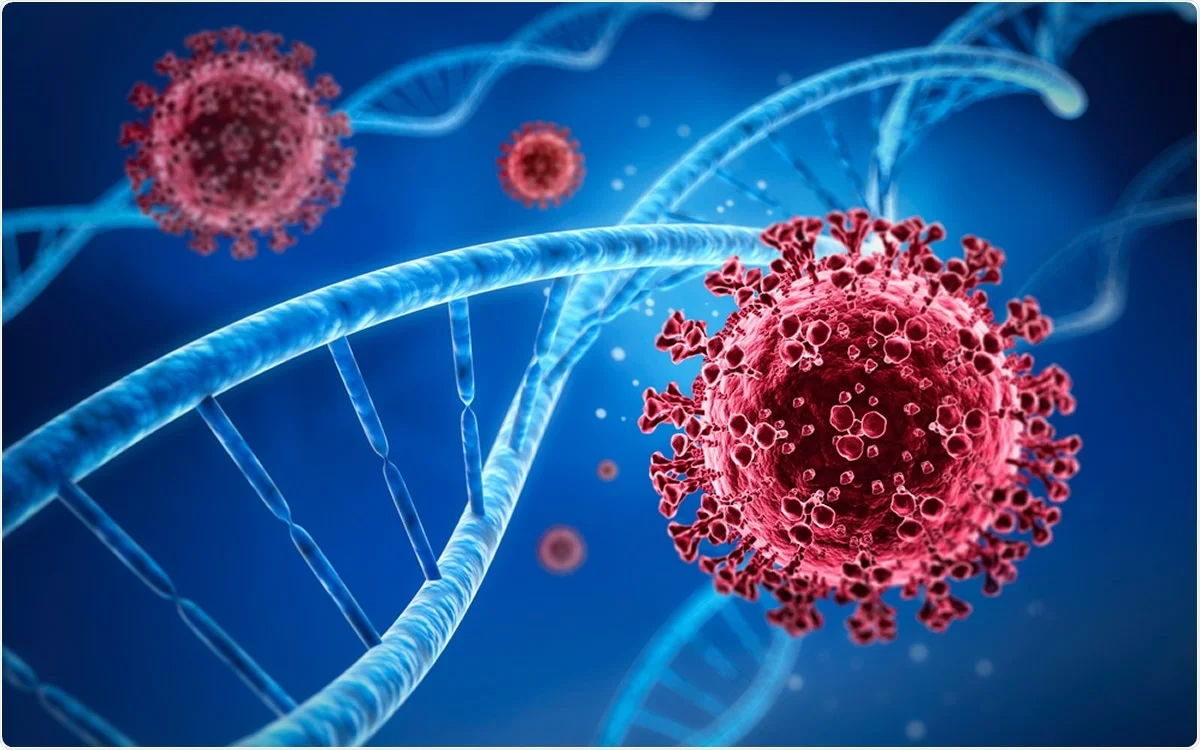

# I. Introduction
Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and pandemic peak trend prediction using Machine Learning methodologies. Outbreak Forecast uses machine learning to combine time series data with additional variables to build forecasts.

Study period covers California and United States from 1/22/2020 to 10/1/2021. Predication period is from 10/1/2021~10/10/2021. 

Study feature is COVID-19 confirmed cases, including following:

• 	Daily new confirmed cases

• 	Total Accumulated confimed cases

Machine Learning Models used in the study include following:
1.	SVM
2.	Polynomial Regression
3.	Bayesian Ridge Polynomial Regression
4.	Time Series- LSTM
5.	Time Series- ARIMA

Coronavirus Case Data is provided by Johns Hopkins University https://github.com/CSSEGISandData/COVID-19

Visualizations mapping from JHU CCSE Dashboard https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

Source code is on my Github https://github.com/JuliePone/Capstone

Author: Julie Pone


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


# Here are the Data Source

In [2]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_CA.csv')

In [3]:
confirmed_df

UID iso2 iso3  code3   FIPS           Admin2 Province_State  \
0   84006001   US  USA    840   6001          Alameda     California   
1   84006003   US  USA    840   6003           Alpine     California   
2   84006005   US  USA    840   6005           Amador     California   
3   84006007   US  USA    840   6007            Butte     California   
4   84006009   US  USA    840   6009        Calaveras     California   
5   84006011   US  USA    840   6011           Colusa     California   
6   84006013   US  USA    840   6013     Contra Costa     California   
7   84006015   US  USA    840   6015        Del Norte     California   
8   84006017   US  USA    840   6017        El Dorado     California   
9   84006019   US  USA    840   6019           Fresno     California   
10  84006021   US  USA    840   6021            Glenn     California   
11  84006023   US  USA    840   6023         Humboldt     California   
12  84006025   US  USA    840   6025         Imperial     California   
13  84006027   US  USA    840   6027             Inyo     California   
14  84006029   US  USA    840   6029             Kern     California   
15  84006031   US  USA    840   6031            Kings     California   
16  84006033   US  USA    840   6033             Lake     California   
17  84006035   US  USA    840   6035           Lassen     California   
18  84006037   US  USA    840   6037      Los Angeles     California   
19  84006039   US  USA    840   6039           Madera     California   
20  84006041   US  USA    840   6041            Marin     California   
21  84006043   US  USA    840   6043         Mariposa     California   
22  84006045   US  USA    840   6045        Mendocino     California   
23  84006047   US  USA    840   6047           Merced     California   
24  84006049   US  USA    840   6049            Modoc     California   
25  84006051   US  USA    840   6051             Mono     California   
26  84006053   US  USA    840   6053         Monterey     California   
27  84006055   US  USA    840   6055             Napa     California   
28  84006057   US  USA    840   6057           Nevada     California   
29  84006059   US  USA    840   6059           Orange     California   
30  84080006   US  USA    840  80006        Out of CA     California   
31  84006061   US  USA    840   6061           Placer     California   
32  84006063   US  USA    840   6063           Plumas     California   
33  84006065   US  USA    840   6065        Riverside     California   
34  84006067   US  USA    840   6067       Sacramento     California   
35  84006069   US  USA    840   6069       San Benito     California   
36  84006071   US  USA    840   6071   San Bernardino     California   
37  84006073   US  USA    840   6073        San Diego     California   
38  84006075   US  USA    840   6075    San Francisco     California   
39  84006077   US  USA    840   6077      San Joaquin     California   
40  84006079   US  USA    840   6079  San Luis Obispo     California   
41  84006081   US  USA    840   6081        San Mateo     California   
42  84006083   US  USA    840   6083    Santa Barbara     California   
43  84006085   US  USA    840   6085      Santa Clara     California   
44  84006087   US  USA    840   6087       Santa Cruz     California   
45  84006089   US  USA    840   6089           Shasta     California   
46  84006091   US  USA    840   6091           Sierra     California   
47  84006093   US  USA    840   6093         Siskiyou     California   
48  84006095   US  USA    840   6095           Solano     California   
49  84006097   US  USA    840   6097           Sonoma     California   
50  84006099   US  USA    840   6099       Stanislaus     California   
51  84006101   US  USA    840   6101           Sutter     California   
52  84006103   US  USA    840   6103           Tehama     California   
53  84006105   US  USA    840   6105          Trinity     California   
54  84006107   US  USA    840   6107           Tu

In [4]:
cols = confirmed_df.keys()

In [5]:
confirmed = confirmed_df.loc[:, cols[11]:cols[-1]]

In [6]:
dates = confirmed.keys()
total_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    total_cases.append(confirmed_sum)


In [7]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average


In [8]:
window = 7

In [9]:
# confirmed cases
total_case_avg= moving_average(total_cases, window)
daily_cases = daily_increase(total_cases)
daily_case_avg = moving_average(daily_cases, window)

# II. Current COVID-19 Pandemic Data Analysis

In [10]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
total_cases = np.array(total_cases).reshape(-1, 1)

In [11]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [12]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

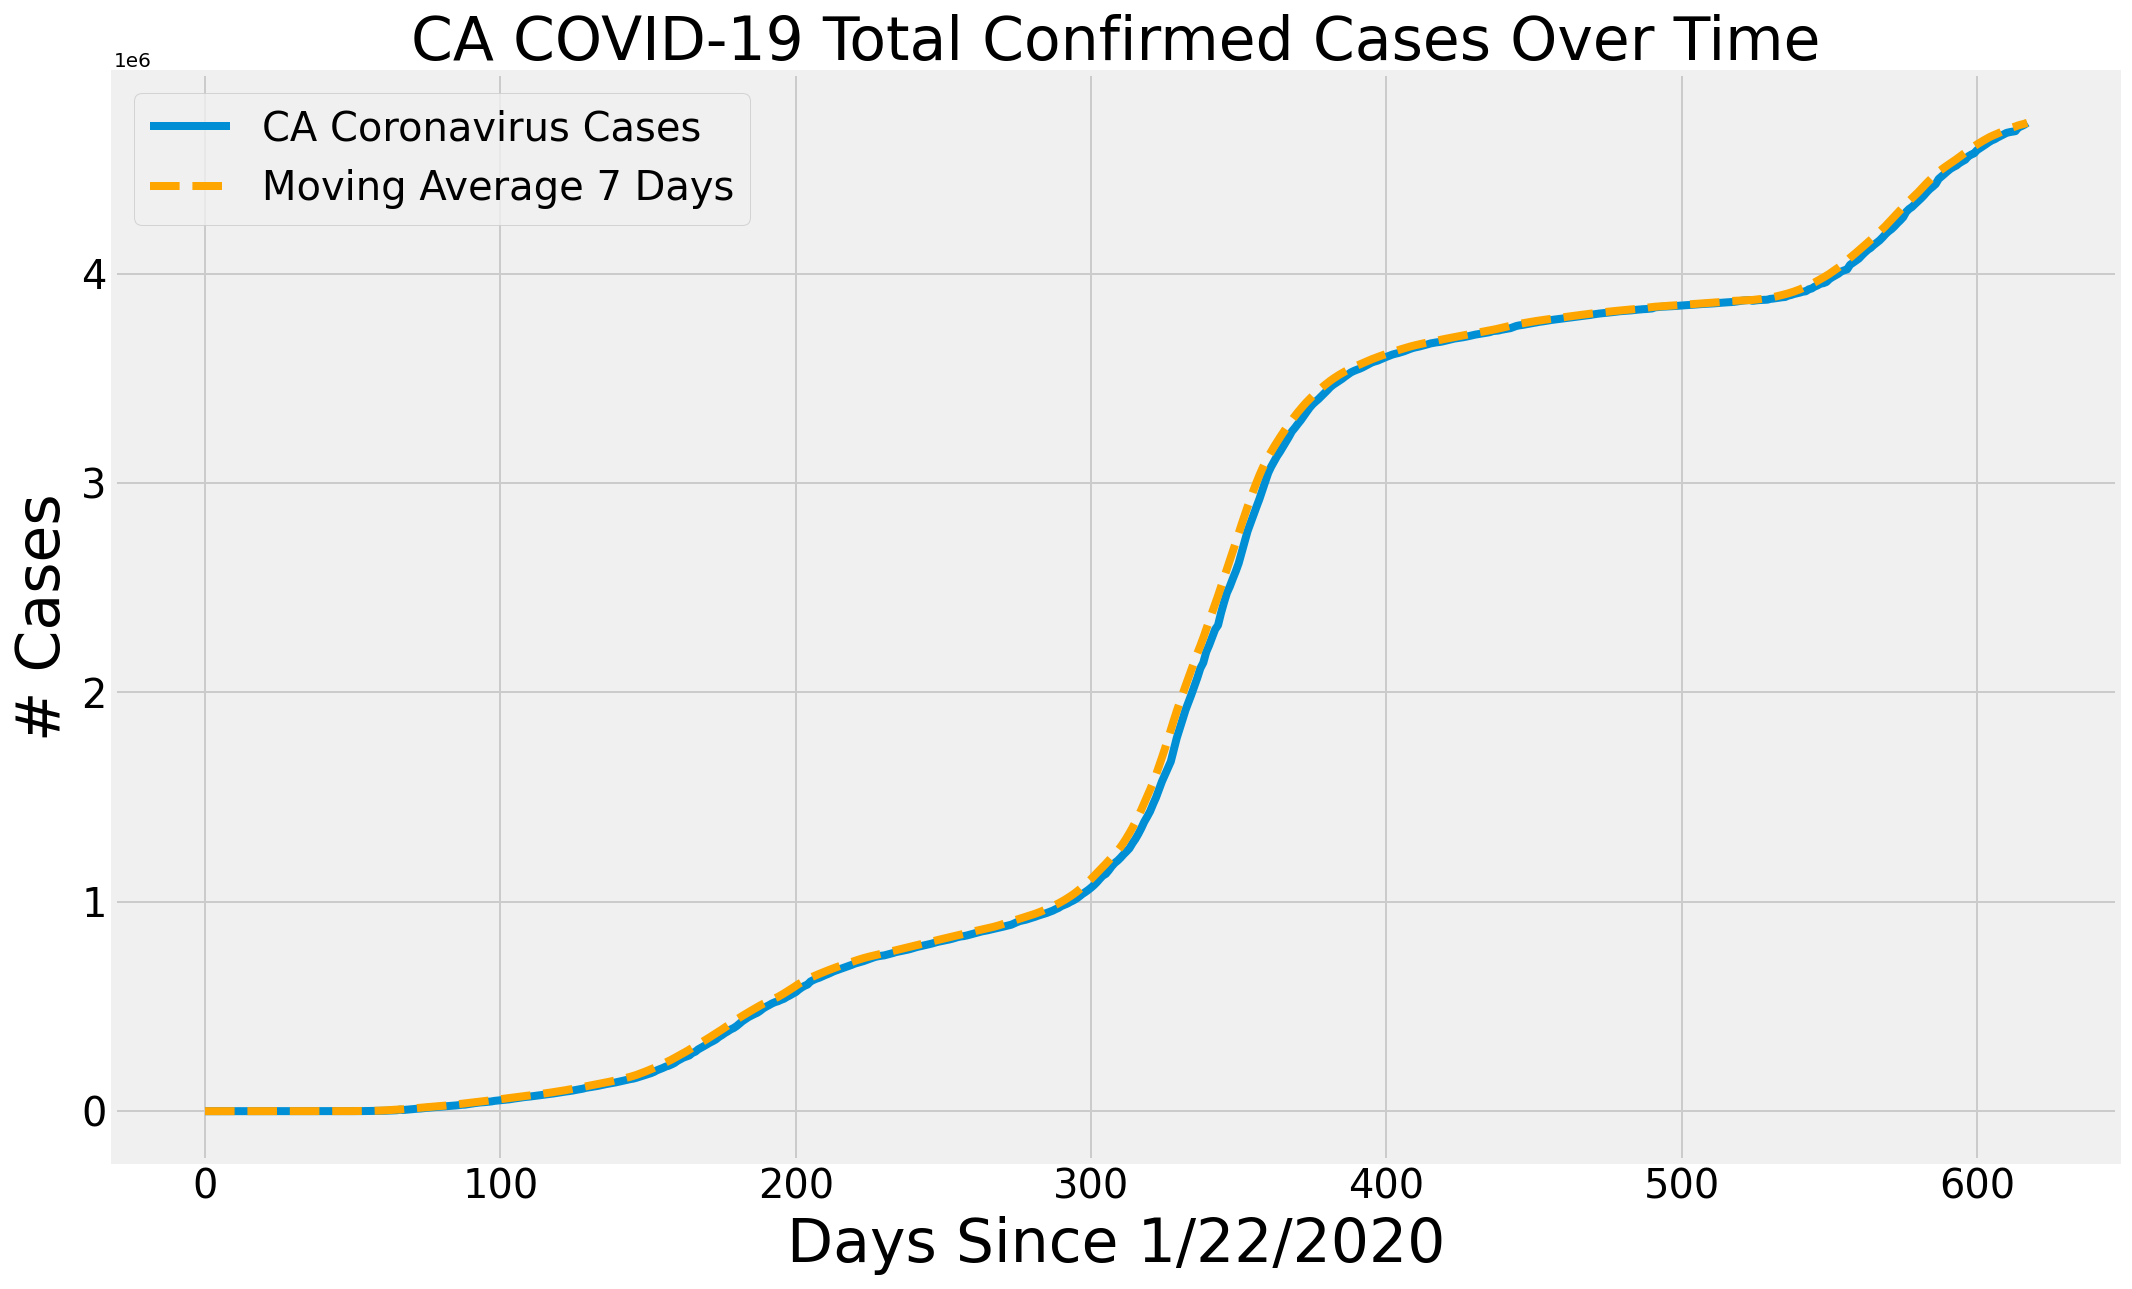

In [13]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_cases)
plt.plot(adjusted_dates, total_case_avg, linestyle='dashed', color='orange')
plt.title('CA COVID-19 Total Confirmed Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# Cases', size=30)
plt.legend(['CA Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


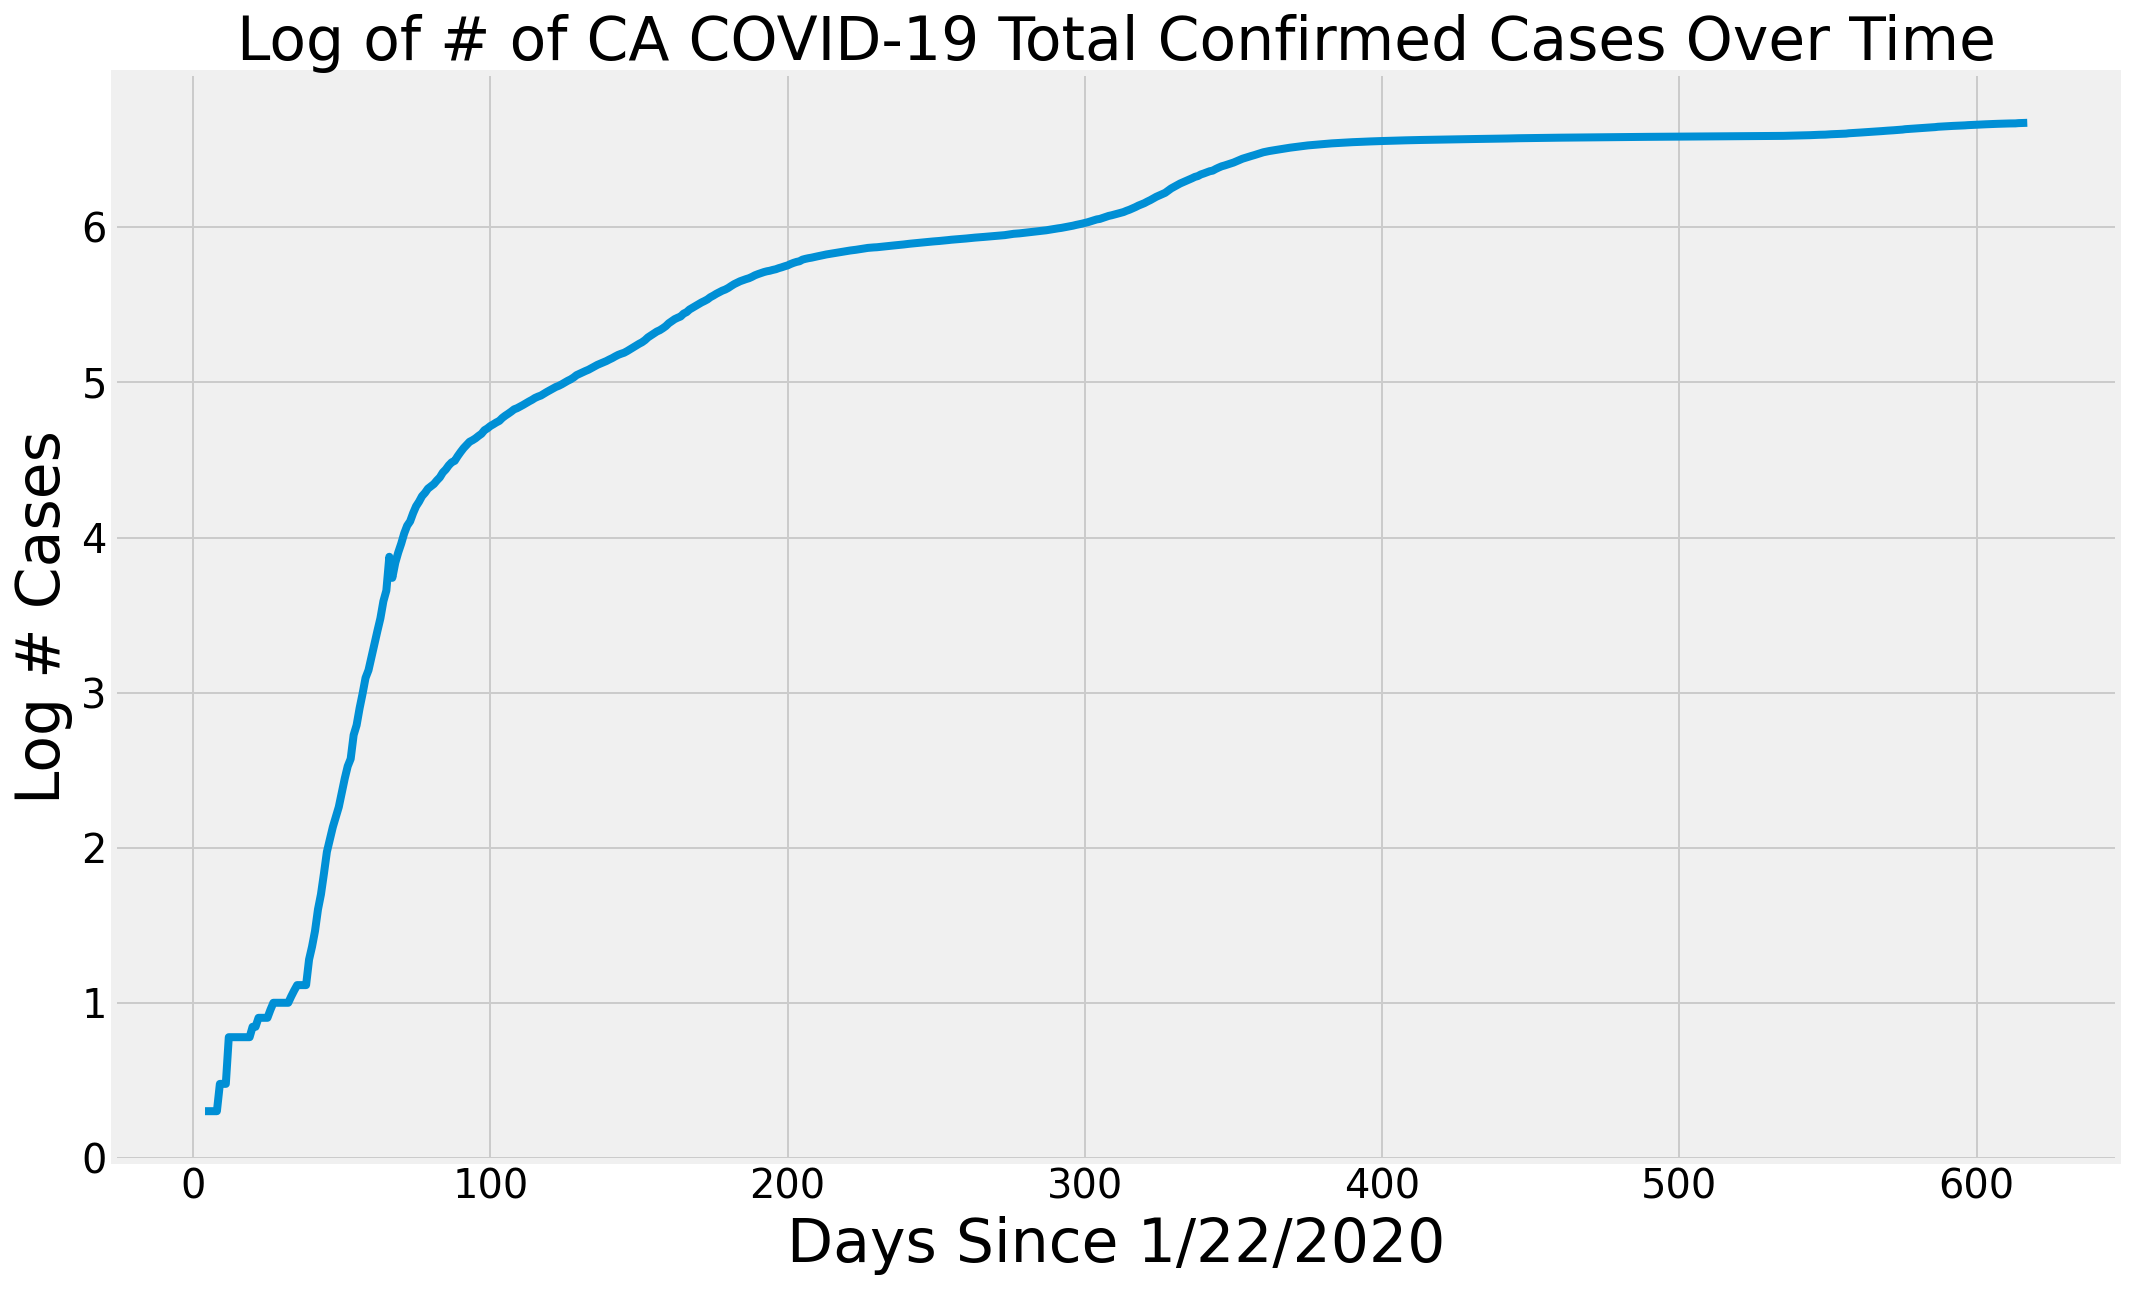

In [14]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_cases))
plt.title('Log of # of CA COVID-19 Total Confirmed Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Log # Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


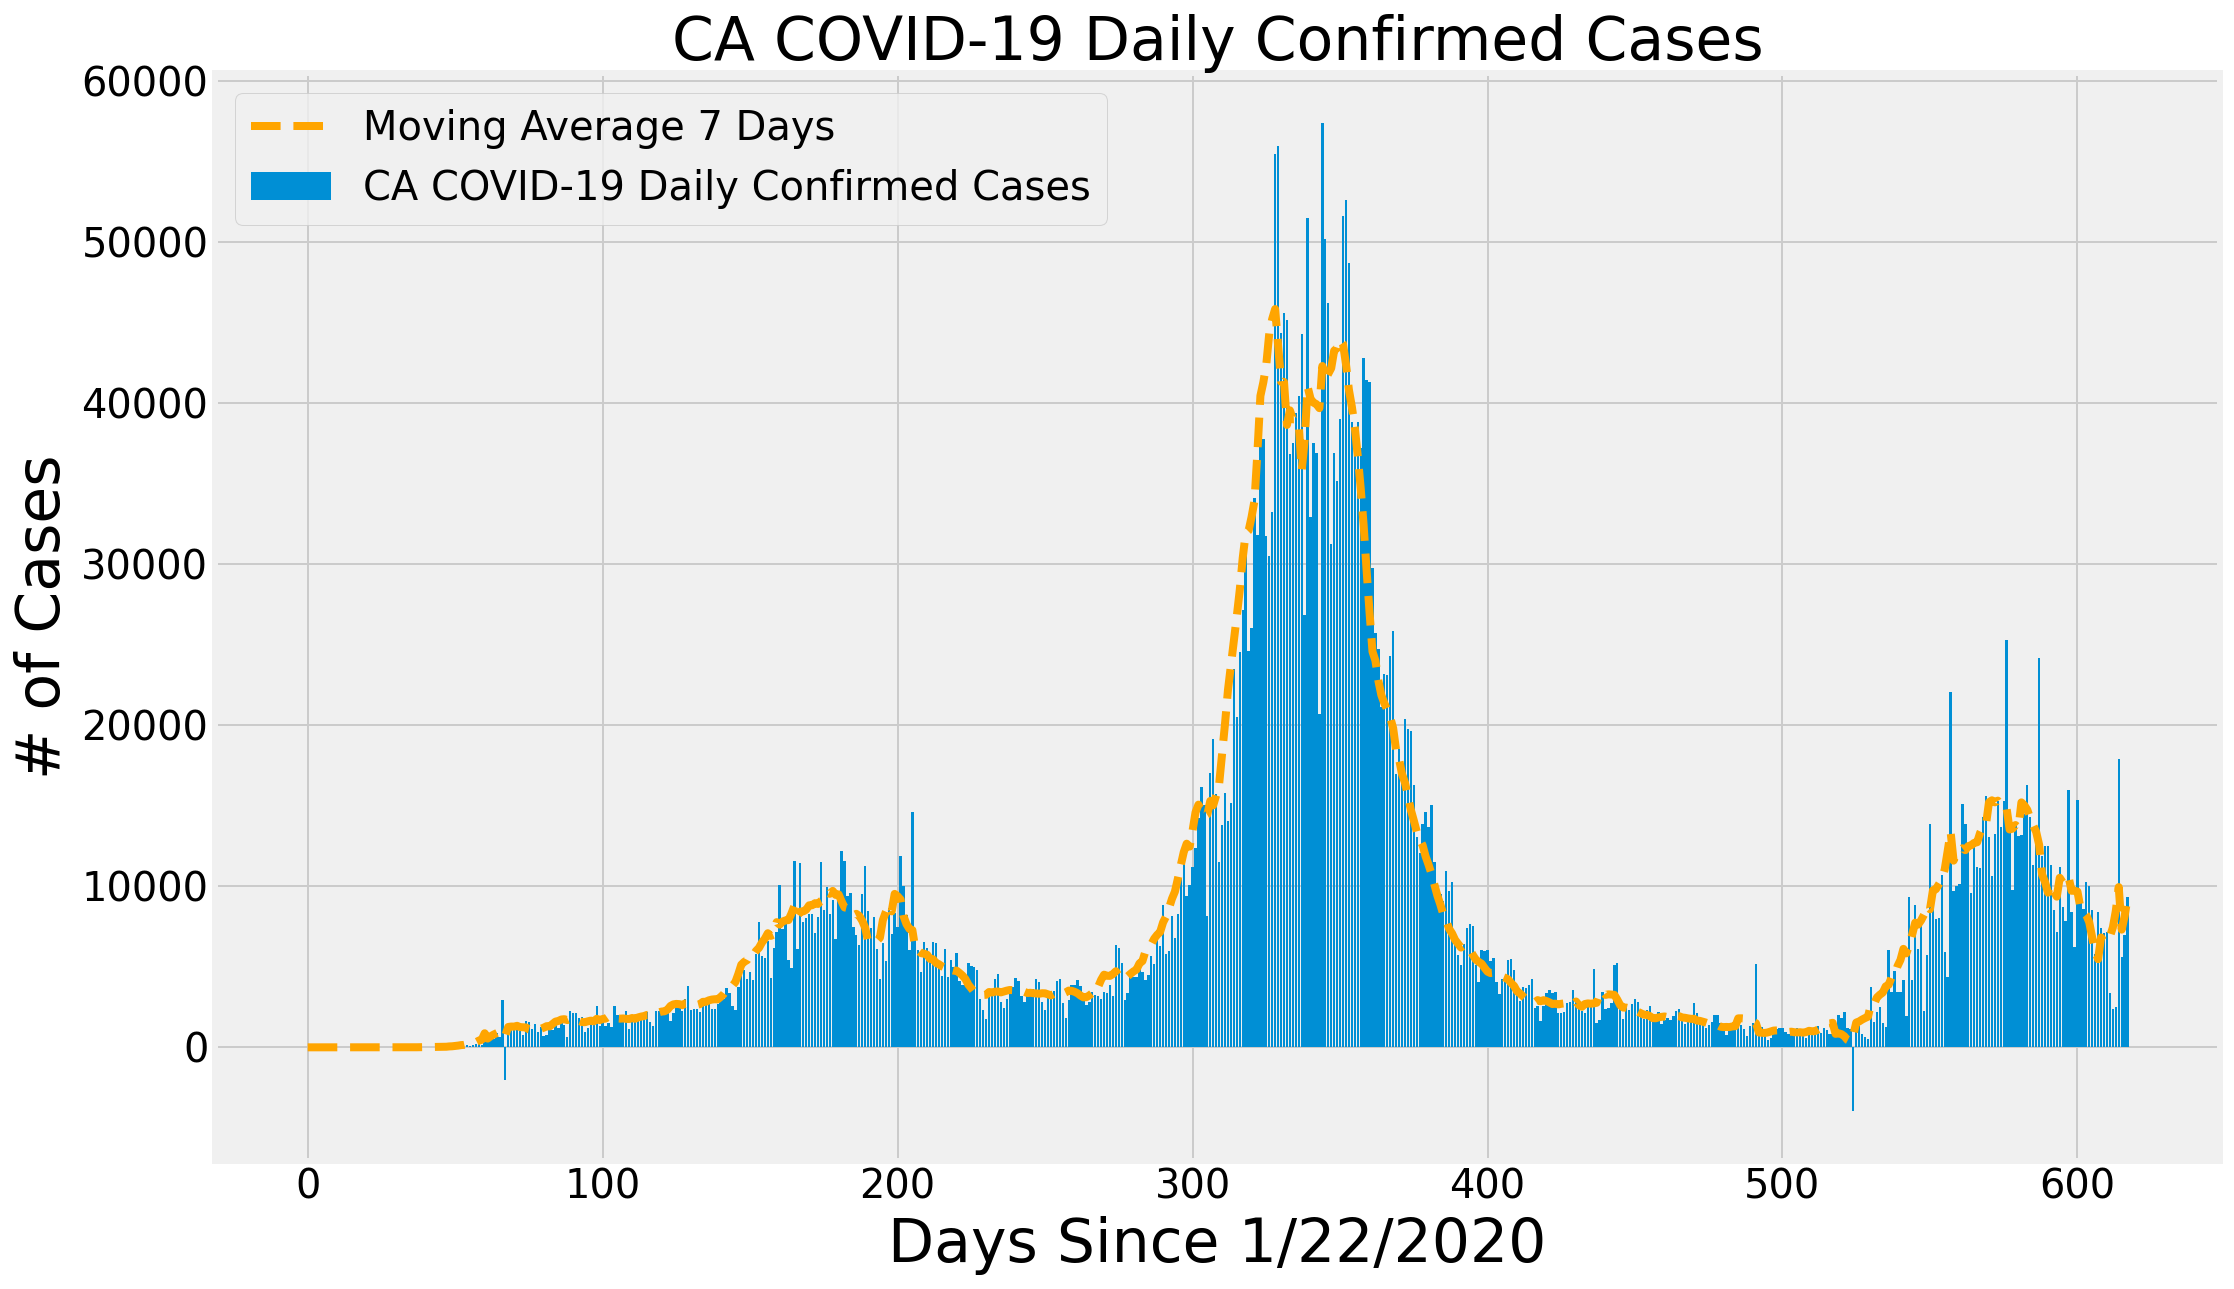

In [15]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, daily_cases)
plt.plot(adjusted_dates, daily_case_avg, color='orange', linestyle='dashed')
plt.title('CA COVID-19 Daily Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'CA COVID-19 Daily Confirmed Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


# III. COVID-19 Pandemic Peak Trend Prediction

# 1. SVM Model

In [16]:
# Decide Training and Test Data Set.
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], total_cases[50:], test_size=0.5, shuffle=False)

In [17]:
#svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 1999475.4449997973
MSE: 6949297933983.454


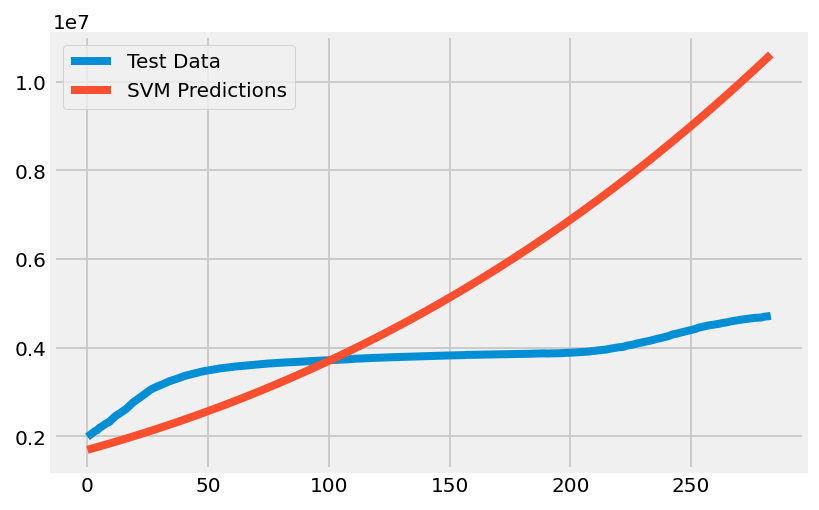

In [18]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [19]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('CA COVID-19 Total Confirmed Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

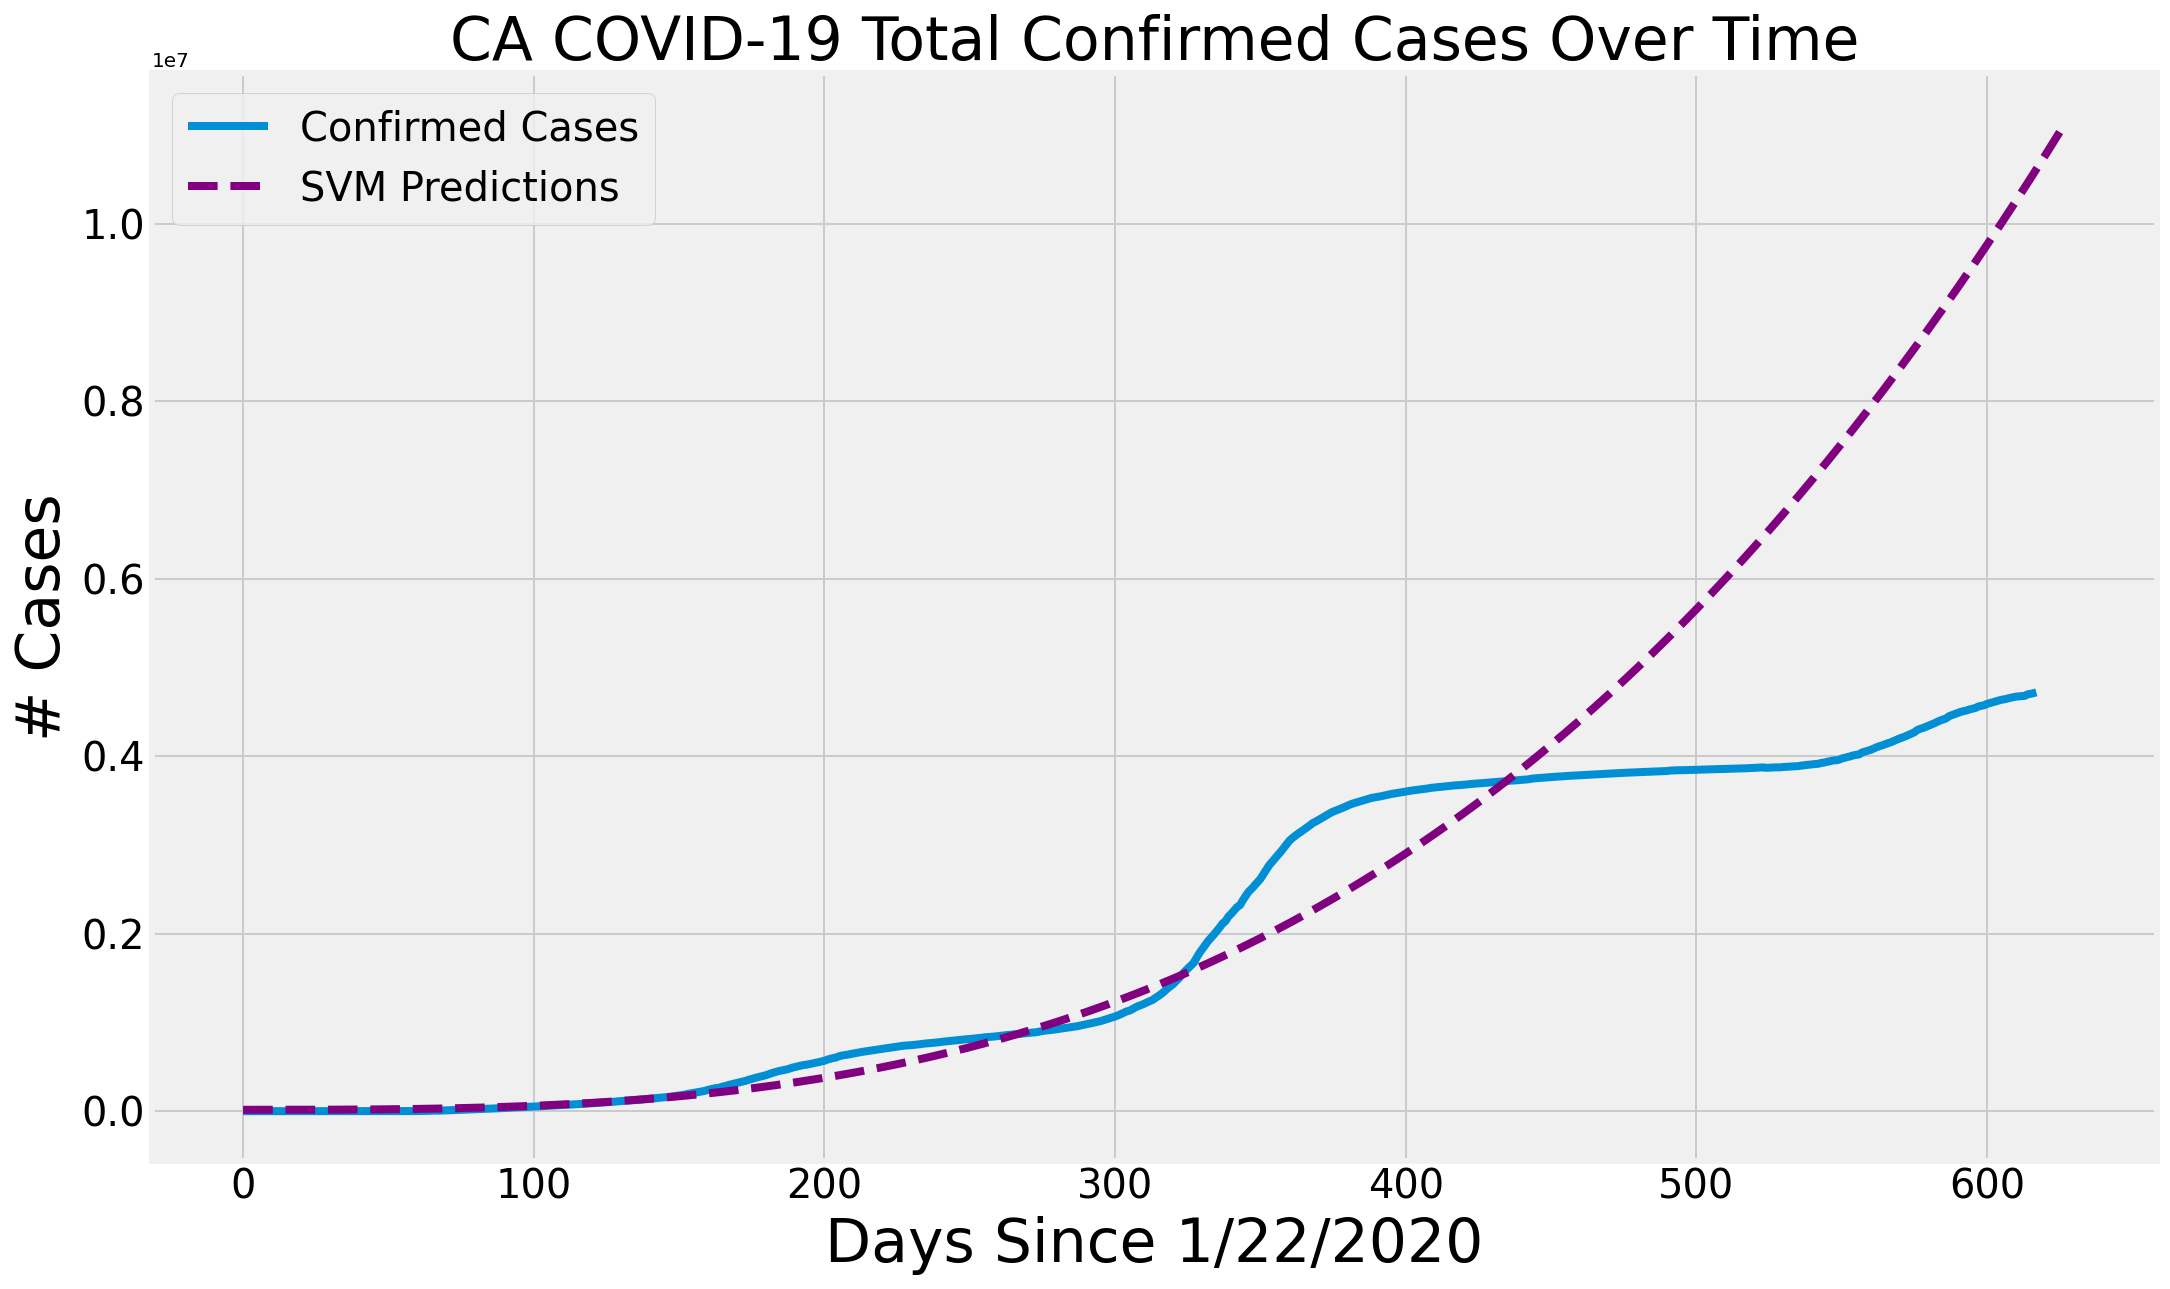

In [20]:
plot_predictions(adjusted_dates, total_cases, svm_pred, 'SVM Predictions', 'purple')

# Generate forecasts

In [21]:
# Future predictions using SVM
SVM_df = pd.DataFrame({'Future Date': future_forcast_dates[-10:], 'SVM Predicted # of CA Total Confirmed Cases': np.round(svm_pred[-10:])})
SVM_df.style.background_gradient(cmap='Reds')

# 2. Polynomial Regression Model

In [22]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [23]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 17436110.692130566
MSE: 636276648054019.1


In [24]:
print(linear_model.coef_)

[[ 1.35569141e+06 -4.17394804e+04  4.14234309e+02 -1.53679868e+00
   2.04071565e-03]]


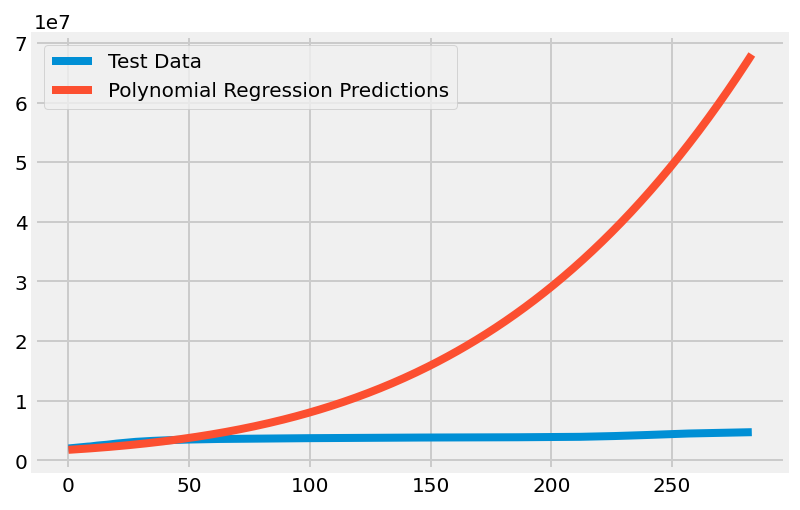

In [25]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

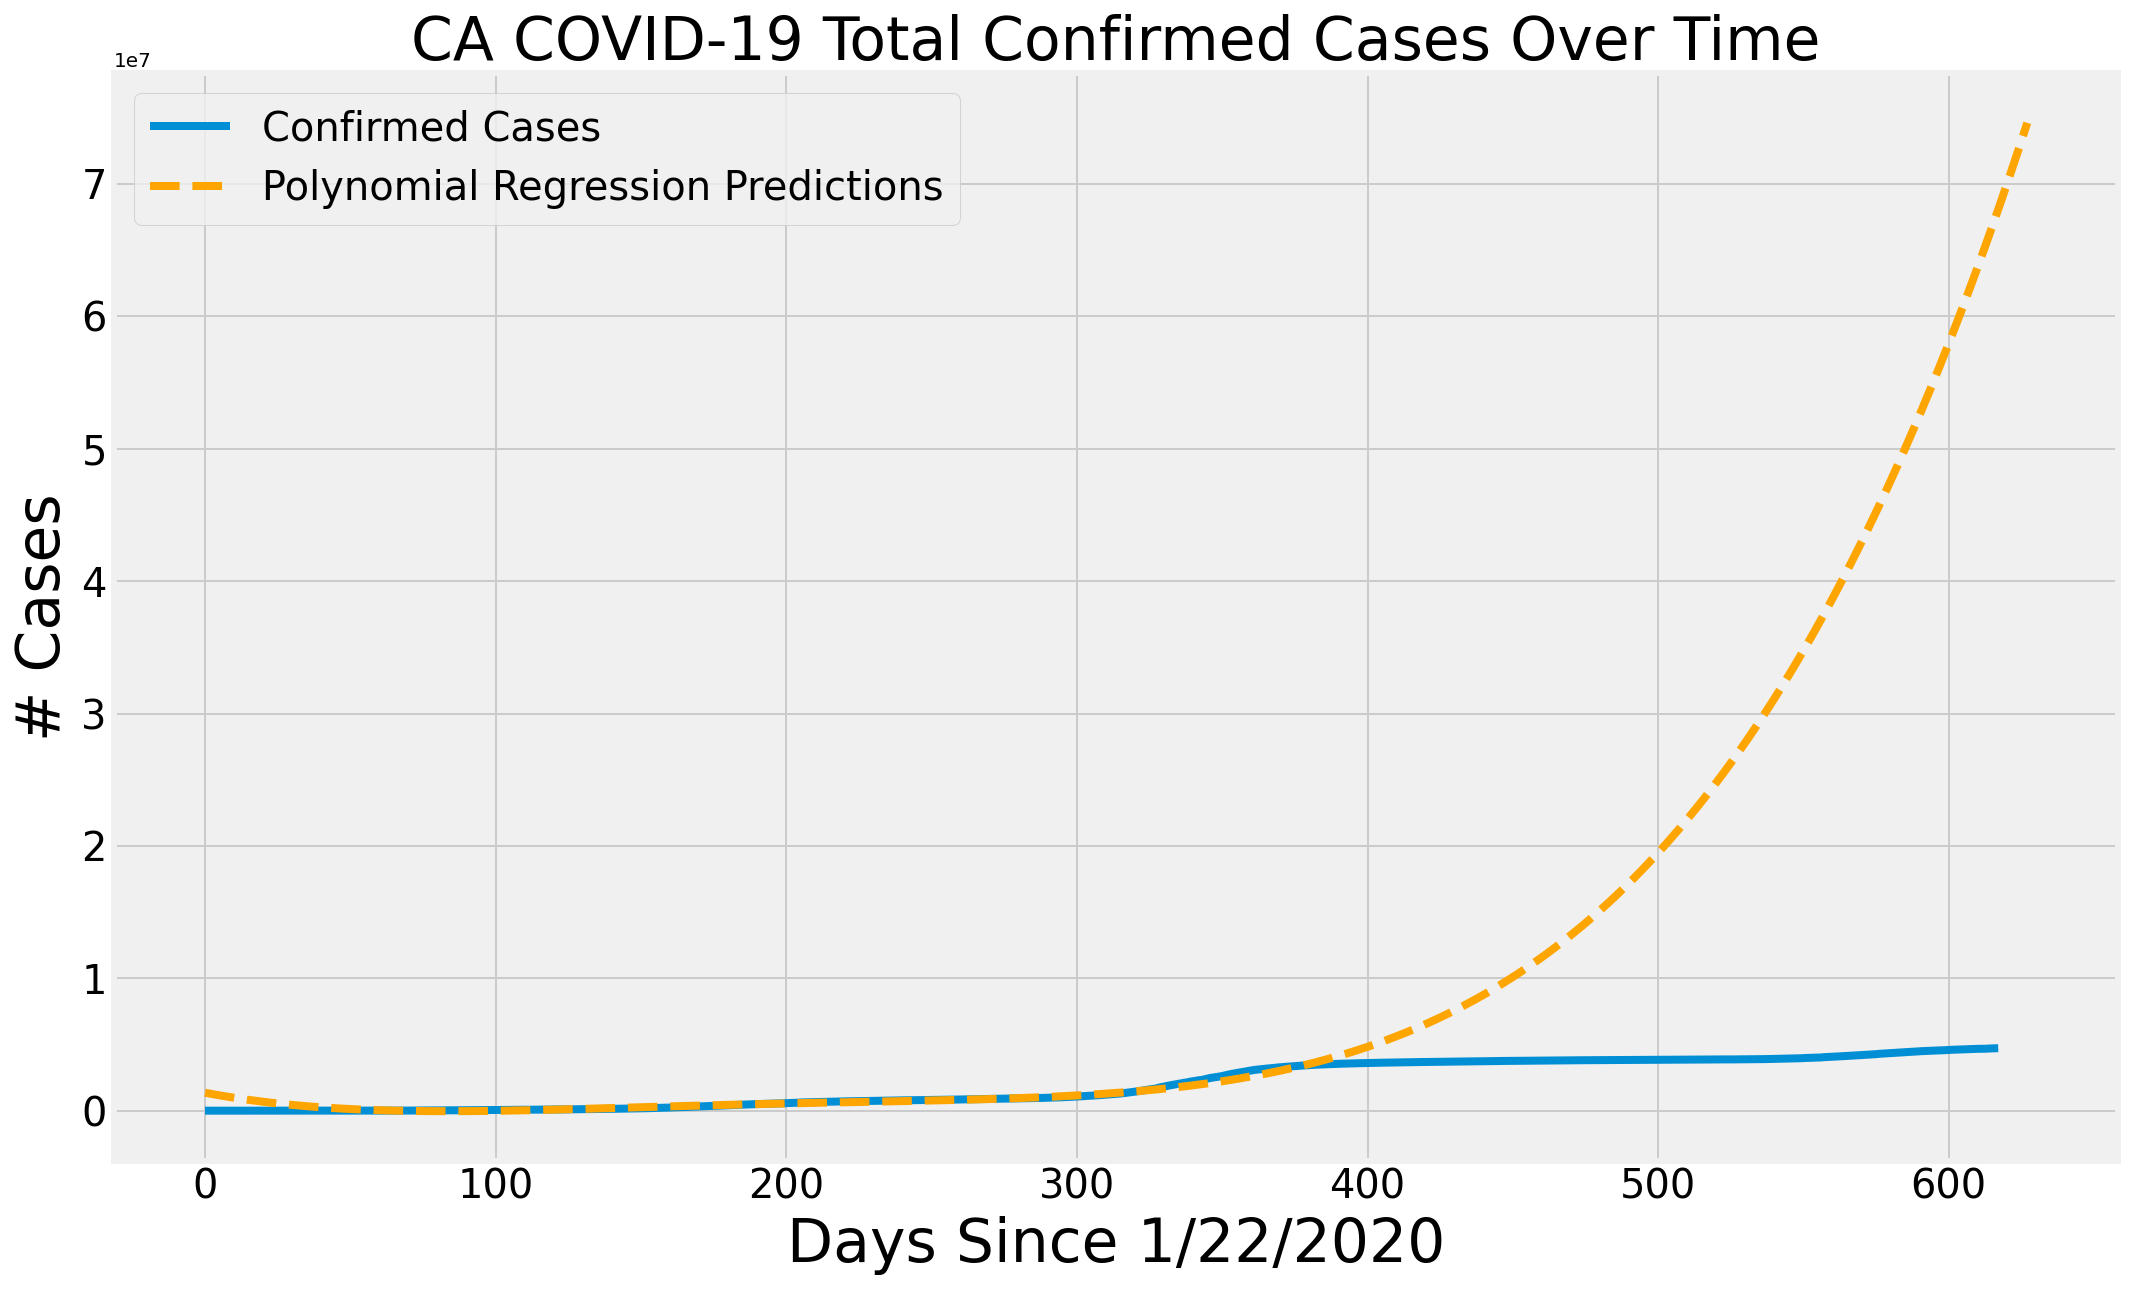

In [26]:
plot_predictions(adjusted_dates, total_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

# Generate forecasts

In [27]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Future Date': future_forcast_dates[-10:], 'Polynomial Predicted # of CA Total Confirmed Cases': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

# 3. Bayesian Ridge Polynomial Regression Model

In [28]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [29]:
bayesian_search.best_params_

{'tol': 1e-06,
 'normalize': True,
 'lambda_2': 1e-07,
 'lambda_1': 0.001,
 'alpha_2': 1e-07,
 'alpha_1': 1e-05}

In [30]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 10009154.3024941
MSE: 220291742643305.34


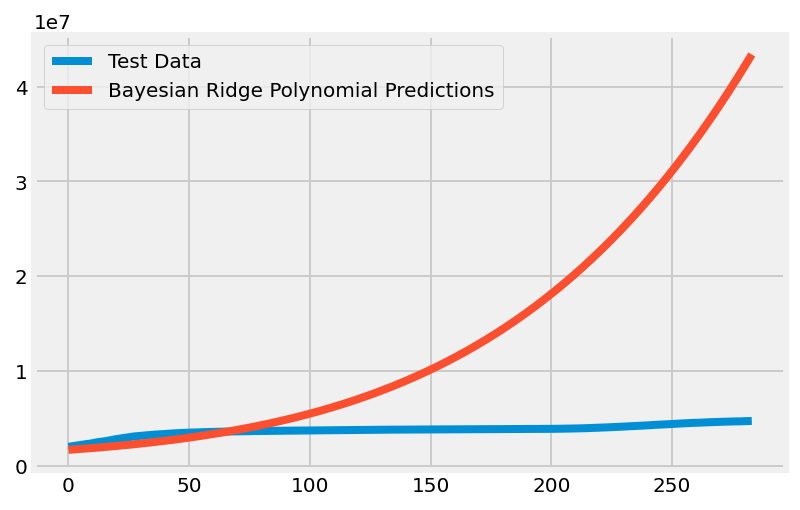

In [31]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

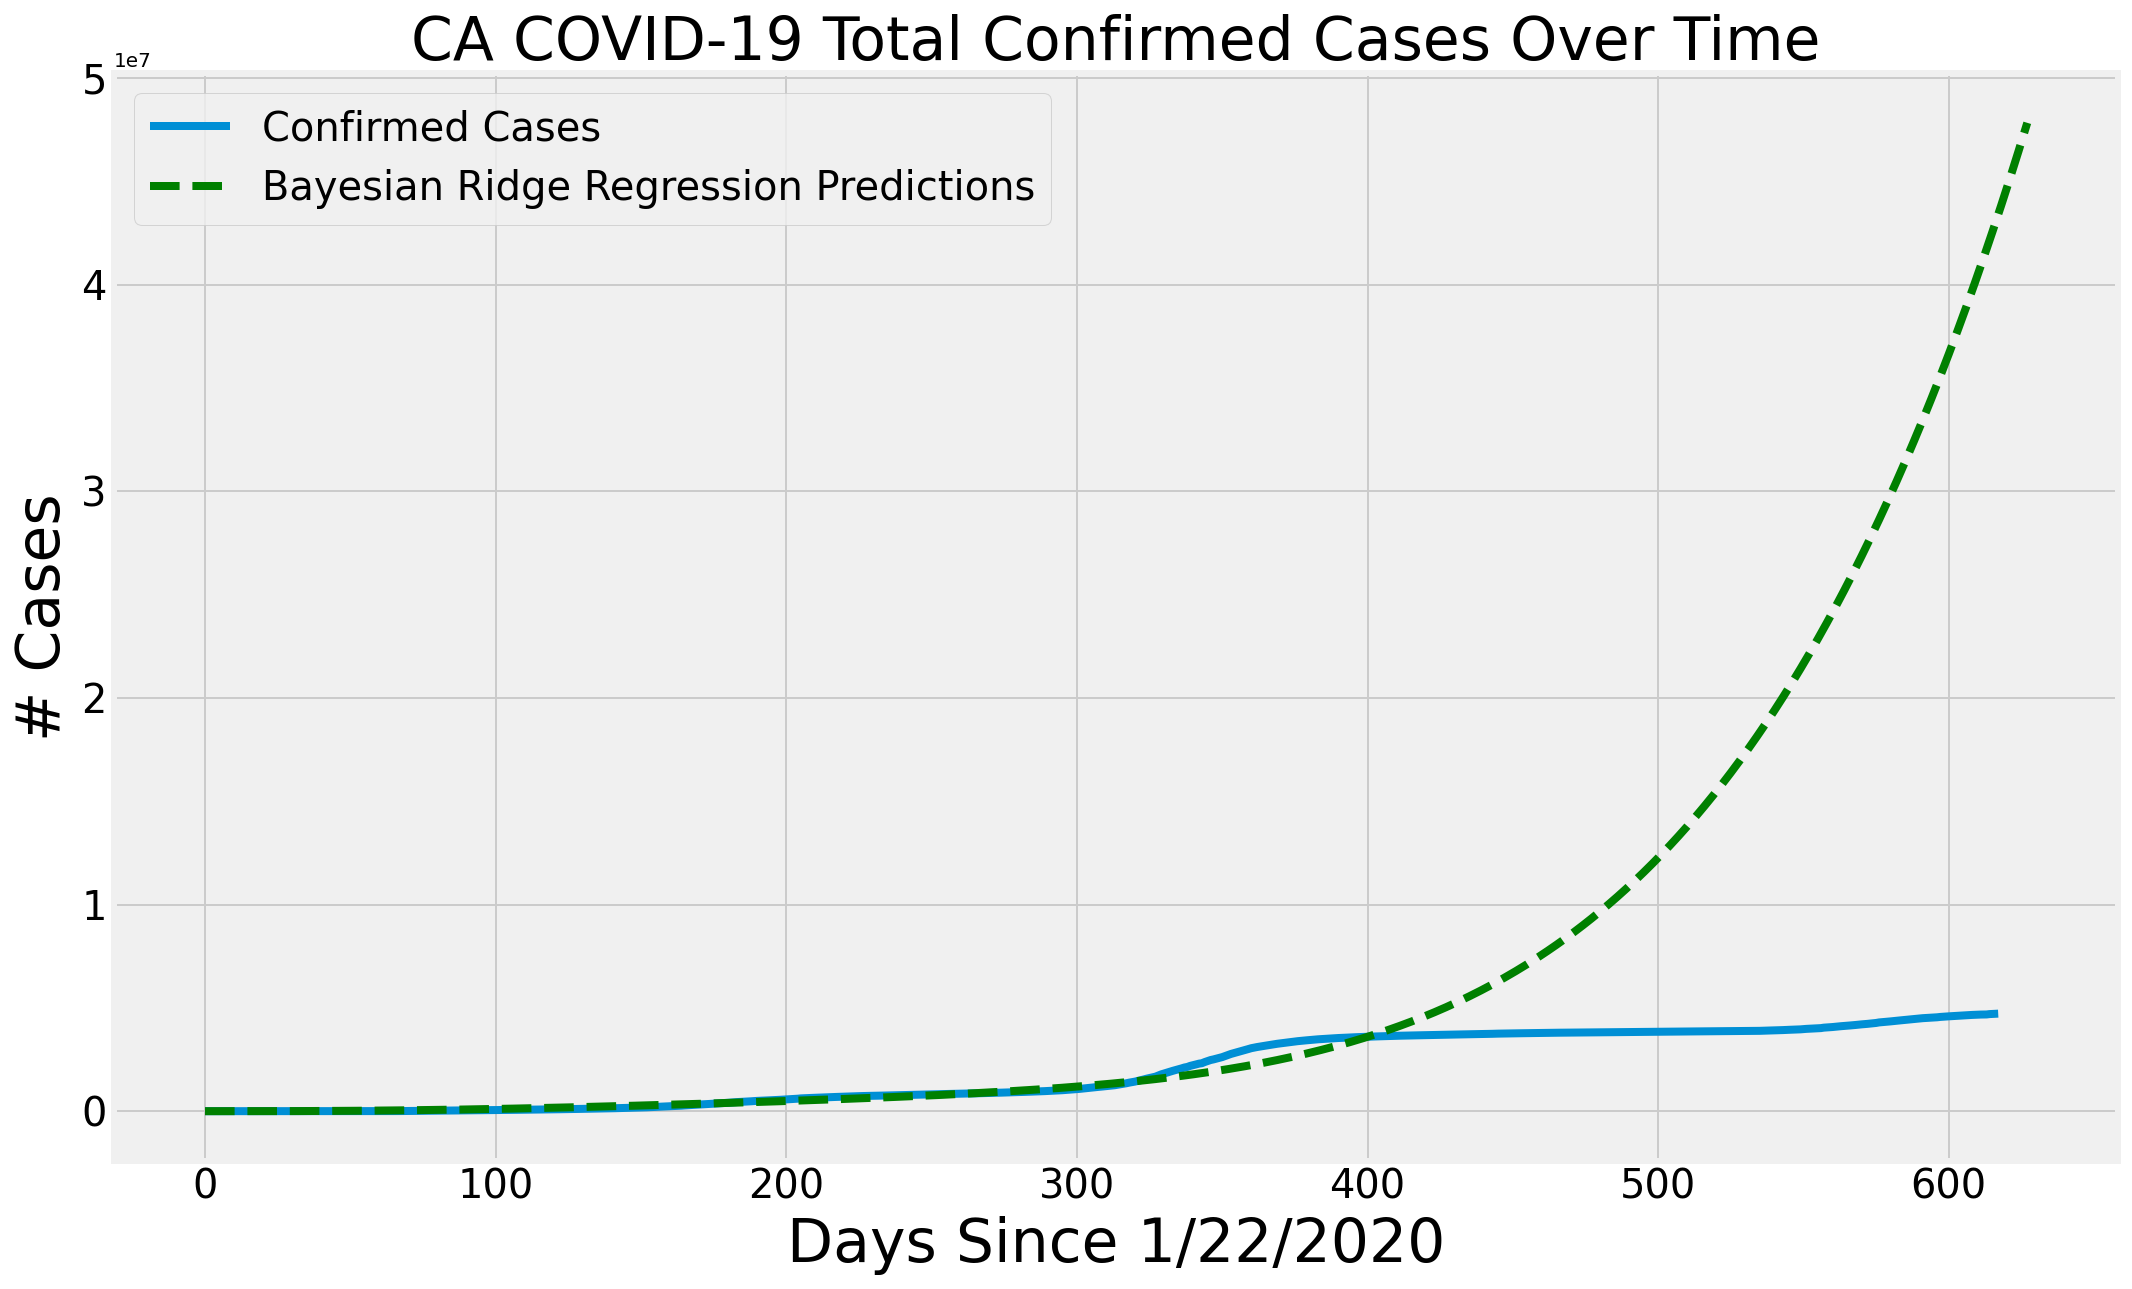

In [32]:
plot_predictions(adjusted_dates, total_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

# Generate forecasts

In [33]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Future Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of CA Total Confirmed Cases': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

# 4. LSTM Model

In [34]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# Let's load the libraries and dependencies for the deep learning model
from sklearn.preprocessing import MinMaxScaler

#%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD

In [36]:
confirmed_df = pd.read_csv("time_series_covid19_confirmed_CA_Transposed.csv")
confirmed_df.isnull().values.any()
confirmed_df = confirmed_df.dropna()

confirmed_df.index = pd.to_datetime(confirmed_df['Date'])
confirmed_df.tail()

Date  Alameda  Alpine  Amador  Butte  Calaveras  Colusa  \
Date                                                                       
2021-09-27  9/27/2021   117387     101    5055  22019       3555    2944   
2021-09-28  9/28/2021   117517     101    5071  22072       3564    2945   
2021-09-29  9/29/2021   117655     101    5103  22149       3580    2951   
2021-09-30  9/30/2021   117811     101    5119  22380       3602    2966   
2021-10-01  10/1/2021   117998     102    5166  22456       3634    2968   

            Contra Costa  Del Norte  El Dorado  ...  Tehama  Trinity  Tulare  \
Date                                            ...                            
2021-09-27         96871       3482      16291  ...    8560      758   74793   
2021-09-28         96973       3484      16317  ...    8582      772   74941   
2021-09-29         97109       3478      16346  ...    8619      780   75149   
2021-09-30         97261       3494      16417  ...    8699      789   75711   
2021-10-01         97417       3495      16470  ...    8743      798   75912   

            Tuolumne  Unassigned  Ventura   Yolo  Yuba      SUM  Daily  
Date                                                                    
2021-09-27      6301         143    98624  19462  9455  4698939  17880  
2021-09-28      6329         165    98710  19490  9472  4704576   5637  
2021-09-29      6373          95    98865  19530  9503  4711550   6974  
2021-09-30      6406         124    99034  19591  9547  4720860   9310  
2021-10-01      6439         116    99135  19644  9566  4729153   8293  

[5 rows x 63 columns]

# (1) Daily Confirmed Cases Prediction- CA


# Build Train-Test Datasets

In [37]:
# Splitting the train and test set considering 'Open' feature from the dataset
train_data, test_data = confirmed_df.iloc[0:int(len(confirmed_df)*0.6), :], confirmed_df.iloc[int(len(confirmed_df)*0.6):, :]
train_series = train_data['Daily']
test_series = test_data['Daily']
train_series.shape, test_series.shape

((371,), (248,))

# Visualize train and test data

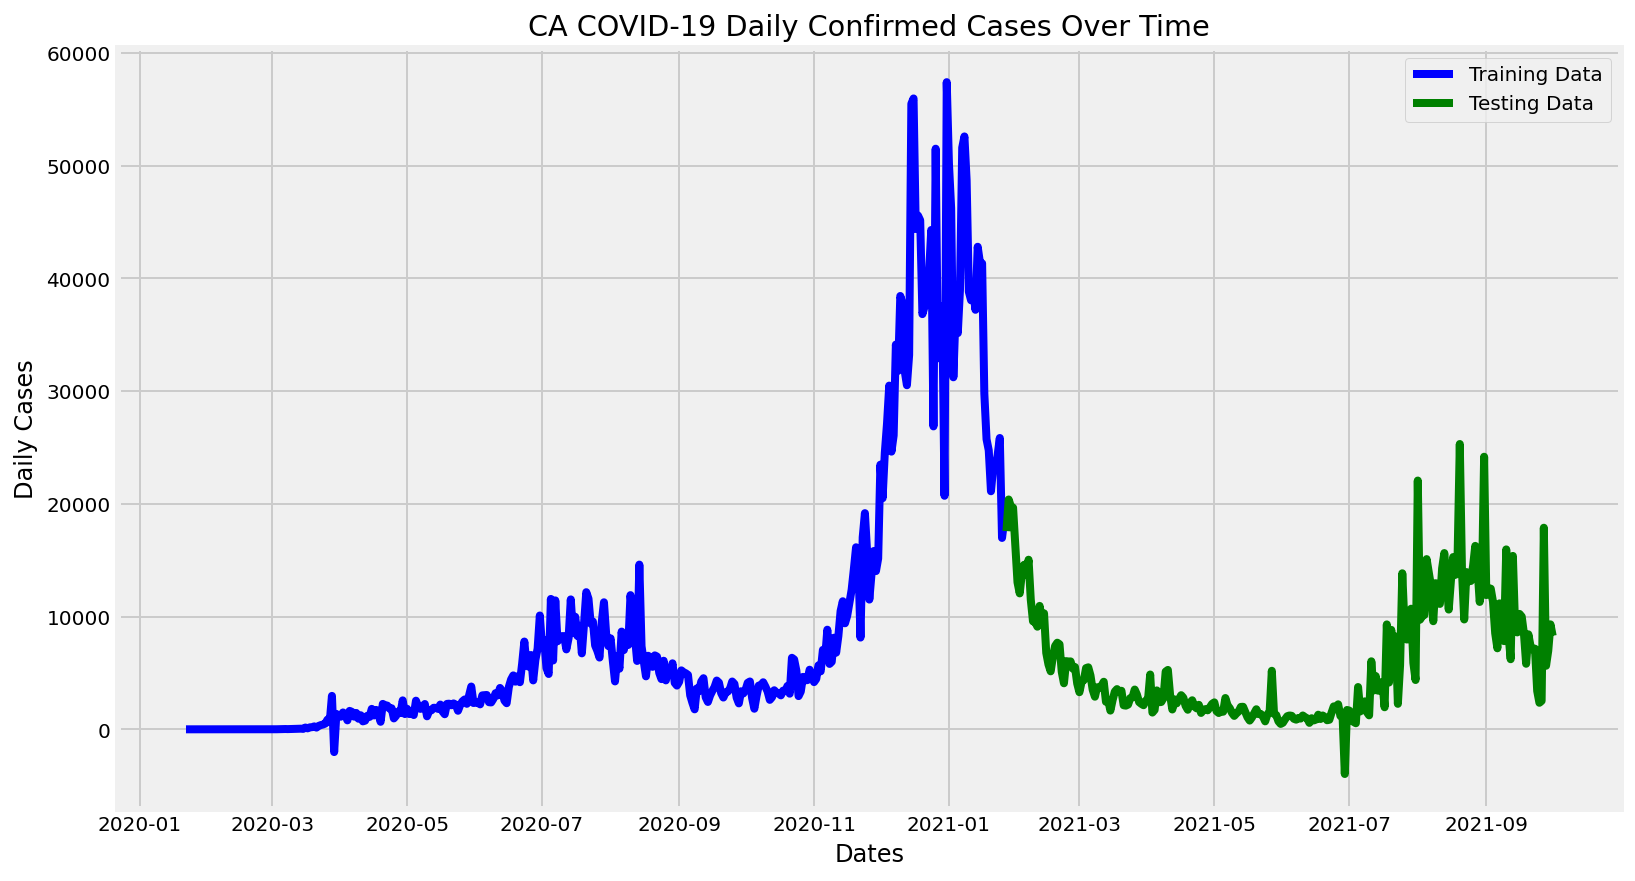

In [38]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Daily Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Daily Cases')
plt.plot(train_data['Daily'], 'blue', label='Training Data')
plt.plot(test_data['Daily'], 'green', label='Testing Data')
plt.legend();

# Scaling

In [39]:
sc = MinMaxScaler(feature_range=(0,1))

training_set_scaled = sc.fit_transform(train_series.values.reshape(-1,1))
training_set_scaled

array([[0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03401154],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03399472],
       [0.03397789],
       [0.03397789],
       [0.03402837],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03399472],
       [0.03397789],
       [0.03399472],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03399472],
       [0.03399472],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03399472],
       [0.03399472],
       [0.03399472],
       [0.03397789],
       [0.03397789],
       [0.03397789],
       [0.03407886],
       [0.0340452 ],
       [0.03407886],
       [0.03416301],
       [0.03414618],
       [0.03428081],
       [0.03441544],
       [0.03429764],
       [0.034

In [40]:
training_set_scaled.shape

(371, 1)

# Train Data Preparation

In [41]:
#1 output and 60 values inputs
# So for each element of training set (output), we have 60 previous training set elements (input)

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((311, 60), (311,))

In [42]:
# Reshaping X_train for efficient modeling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

In [43]:
X_train.shape

(311, 60, 1)

# Build the LSTM based forecasting DL Model architecture

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

In [45]:
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(1))

# Compiling the RNN - optimizer(rmsprop)and loss(mean squared error)
regressor.compile(loss='mse', optimizer='rmsprop')

regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 64)            16896     
_________________________________________________________________
dropout (Dropout)            (None, 60, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [46]:
regressor.fit(X_train,y_train, epochs=10, batch_size=64, validation_split=0.1, shuffle=False)

Epoch 1/10
5/5 [==============================] - 24s 477ms/step - loss: 0.0128 - val_loss: 0.1122
Epoch 2/10
5/5 [==============================] - 1s 160ms/step - loss: 0.0115 - val_loss: 0.2908
Epoch 3/10
5/5 [==============================] - 1s 167ms/step - loss: 0.0101 - val_loss: 0.2091
Epoch 4/10
5/5 [==============================] - 1s 163ms/step - loss: 0.0046 - val_loss: 0.3657
Epoch 5/10
5/5 [==============================] - 1s 158ms/step - loss: 0.0041 - val_loss: 0.1195
Epoch 6/10
5/5 [==============================] - 1s 163ms/step - loss: 0.0023 - val_loss: 0.0913
Epoch 7/10
5/5 [==============================] - 1s 161ms/step - loss: 0.0022 - val_loss: 0.1655
Epoch 8/10
5/5 [==============================] - 1s 142ms/step - loss: 0.0031 - val_loss: 0.0887
Epoch 9/10
5/5 [==============================] - 1s 142ms/step - loss: 0.0022 - val_loss: 0.3084
Epoch 10/10
5/5 [==============================] - 1s 159ms/step - loss: 0.0038 - val_loss: 0.0355


# Test Data Forecasting

# Get the last 60 records from train_series

In [47]:
train_last60 = train_series[-60:]
print(train_last60.shape)
assert train_last60.shape == (60,), ("Oops! There is a data dimension mismatch error. Hint: Slice the last 60 records from train_series")

(60,)


In [48]:
test_series.shape

(248,)

In [49]:
print(test_series)

Date
2021-01-27    17583
2021-01-28    20385
2021-01-29    19768
2021-01-30    19660
2021-01-31    16319
              ...  
2021-09-27    17880
2021-09-28     5637
2021-09-29     6974
2021-09-30     9310
2021-10-01     8293
Name: Daily, Length: 248, dtype: int64


# Combine both train_last60 and test_series together

In [50]:
new_test_series =  pd.concat([train_last60, test_series], axis=0)
print(new_test_series.shape)
#assert new_test_series.shape == (664,), ("Oops! There is a data dimension mismatch error. Hint: Use pandas concat with the right axis parameter")

(308,)


# Scale the test dataset using the trained MinMaxScaler transformer - sc

In [51]:
test_set_scaled = sc.transform(new_test_series.values.reshape(-1, 1))

# Prepare Test dataset Windows of 60 days each

In [52]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,len(test_set_scaled)):
    X_test.append(test_set_scaled[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

(248, 60, 1)

# Model Prediction and Reverse Transform

In [53]:
predicted_confirmed_cases = regressor.predict(X_test)
predicted_confirmed_cases_revtrans = sc.inverse_transform(predicted_confirmed_cases).ravel()
predicted_confirmed_cases_revtrans_series = pd.Series(predicted_confirmed_cases_revtrans)
predicted_confirmed_cases_revtrans_series.index = test_series.index
predicted_confirmed_cases_revtrans_series.shape, test_series.shape

((248,), (248,))

# Model Evaluation

In [54]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

In [55]:
error = mean_squared_error(test_series, predicted_confirmed_cases_revtrans_series)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_series, predicted_confirmed_cases_revtrans_series)
print('Symmetric Mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 9085782.804
Symmetric Mean absolute percentage error: 72.126


# Visualizing the results from model predictions

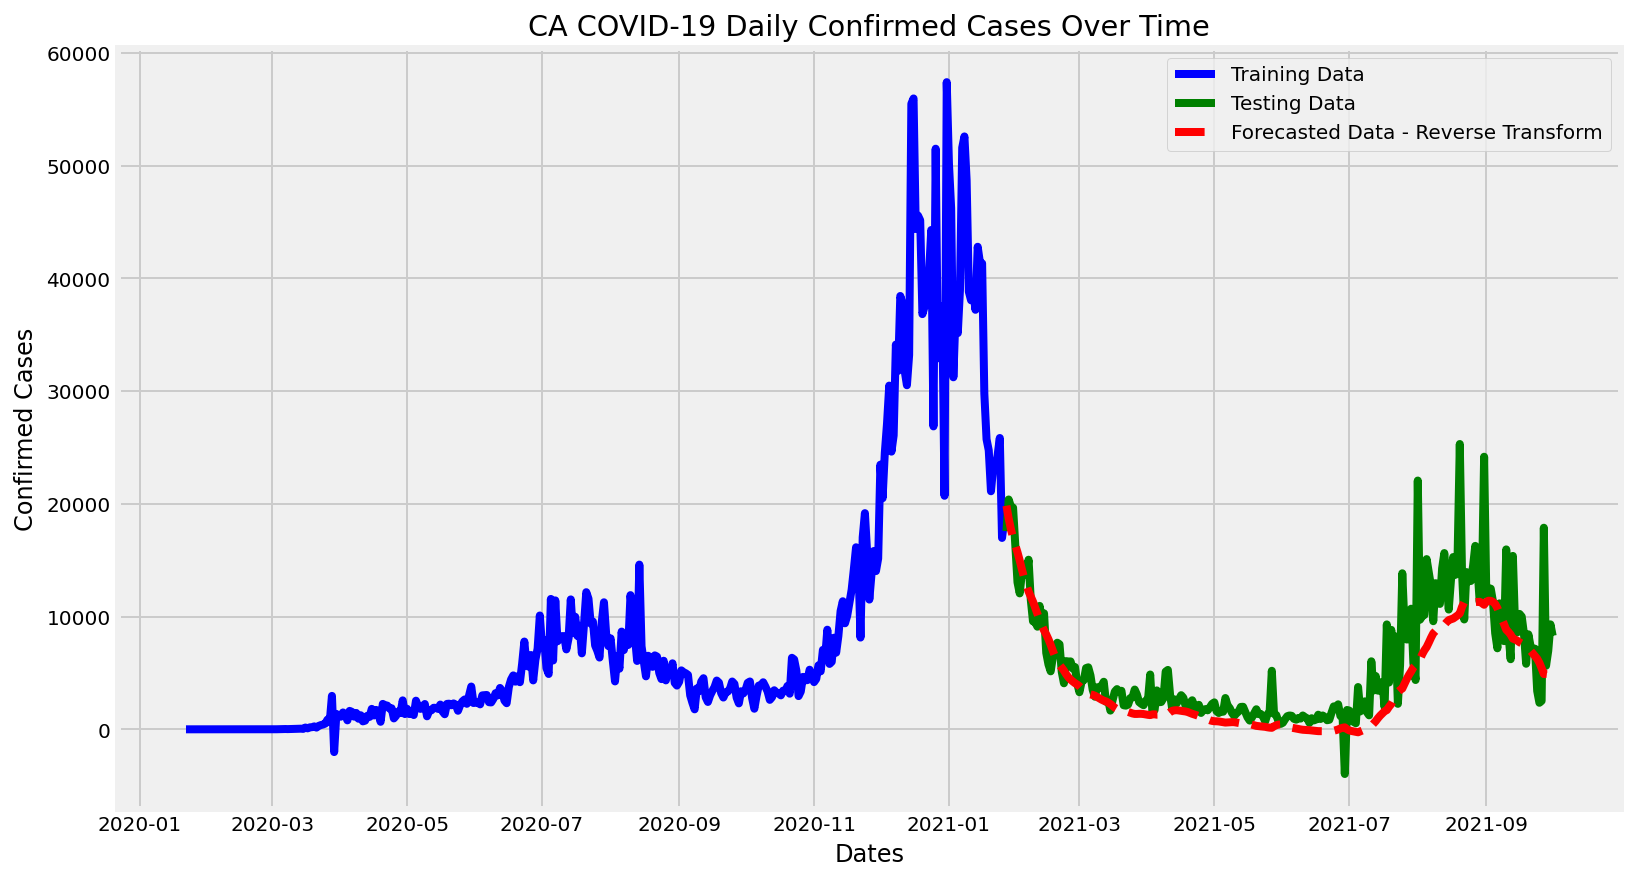

In [56]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Daily Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(train_series, color='blue', label='Training Data')
plt.plot(test_series, color='green', label='Testing Data')
plt.plot(predicted_confirmed_cases_revtrans_series, color='red', linestyle='--', label='Forecasted Data - Reverse Transform')
plt.legend();

# Visualize only test and forecast data

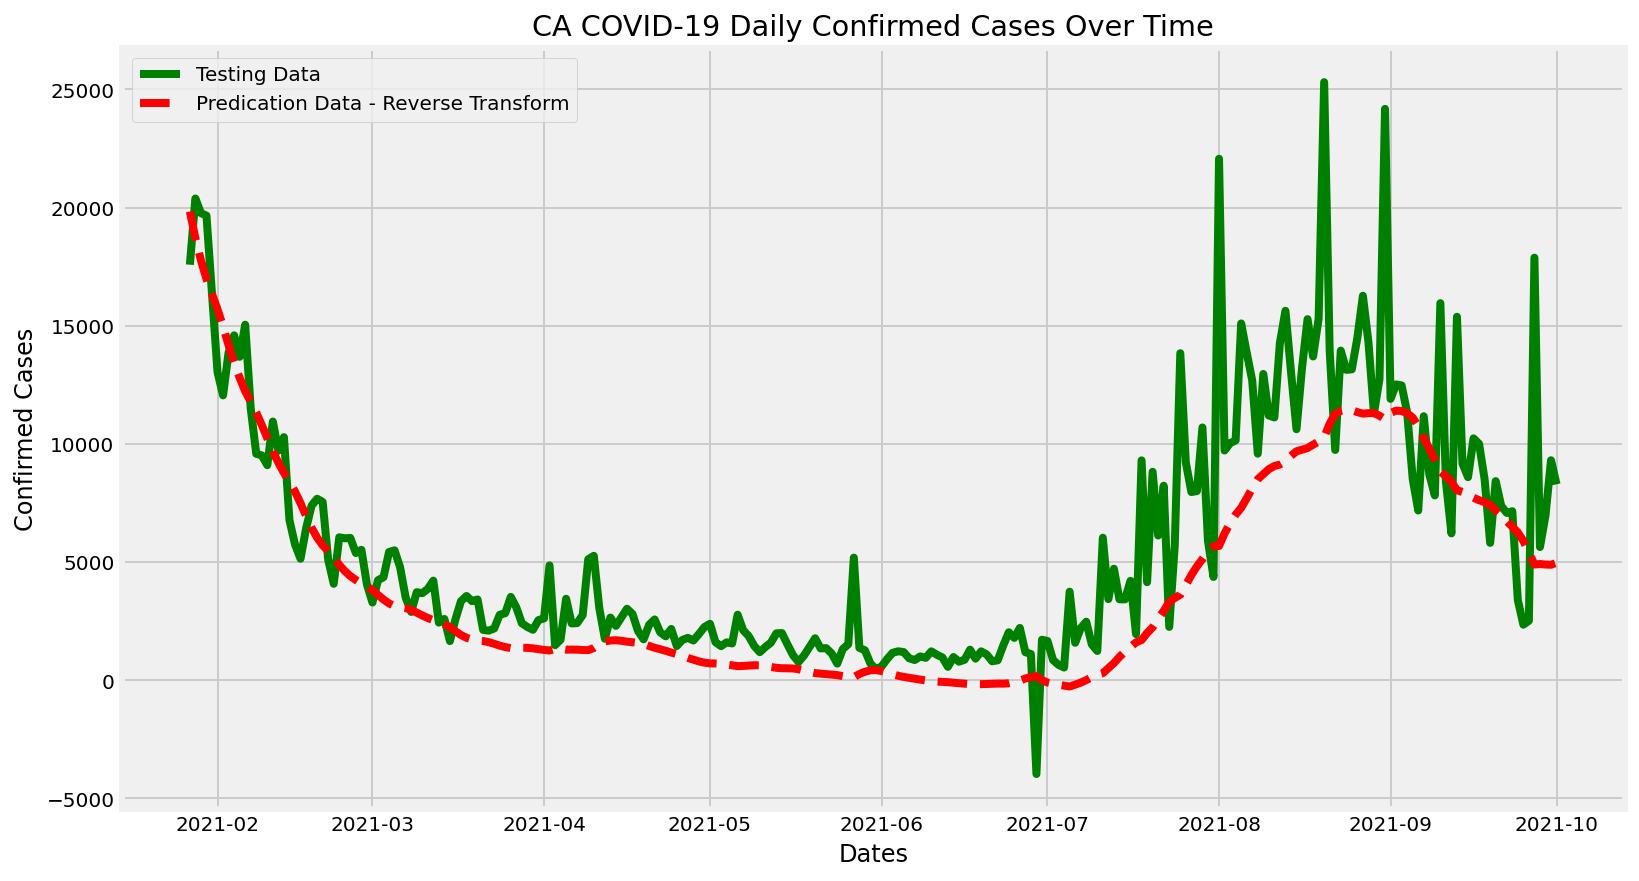

In [57]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Daily Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(test_series, color='green', label='Testing Data')
plt.plot(predicted_confirmed_cases_revtrans_series, color='red', linestyle='--', label='Predication Data - Reverse Transform')
plt.legend();

# Generate forecasts

In [58]:
# Future predictions using LSTM 
LSTM_df = pd.DataFrame({'Future Date': future_forcast_dates[-10:], 'LSTM Predicted # of CA Daily Confirmed Cases': np.round(predicted_confirmed_cases_revtrans_series[-10:])})
LSTM_df.style.background_gradient(cmap='Reds')

In [59]:
LSTM_df.reset_index(drop=True)

Future Date  LSTM Predicted # of CA Daily Confirmed Cases
0  10/01/2021                                        6736.0
1  10/02/2021                                        6493.0
2  10/03/2021                                        6257.0
3  10/04/2021                                        5897.0
4  10/05/2021                                        5425.0
5  10/06/2021                                        4898.0
6  10/07/2021                                        4920.0
7  10/08/2021                                        4898.0
8  10/09/2021                                        4889.0
9  10/10/2021                                        4973.0

# (2) Total Confirmed Cases Prediction- CA

# Build Train-Test Datasets

In [60]:
# Splitting the train and test set considering 'Open' feature from the dataset
train_data, test_data = confirmed_df.iloc[0:int(len(confirmed_df)*0.6), :], confirmed_df.iloc[int(len(confirmed_df)*0.6):, :]
train_series = train_data['SUM']
test_series = test_data['SUM']
train_series.shape, test_series.shape

((371,), (248,))

# Visualize train and test data

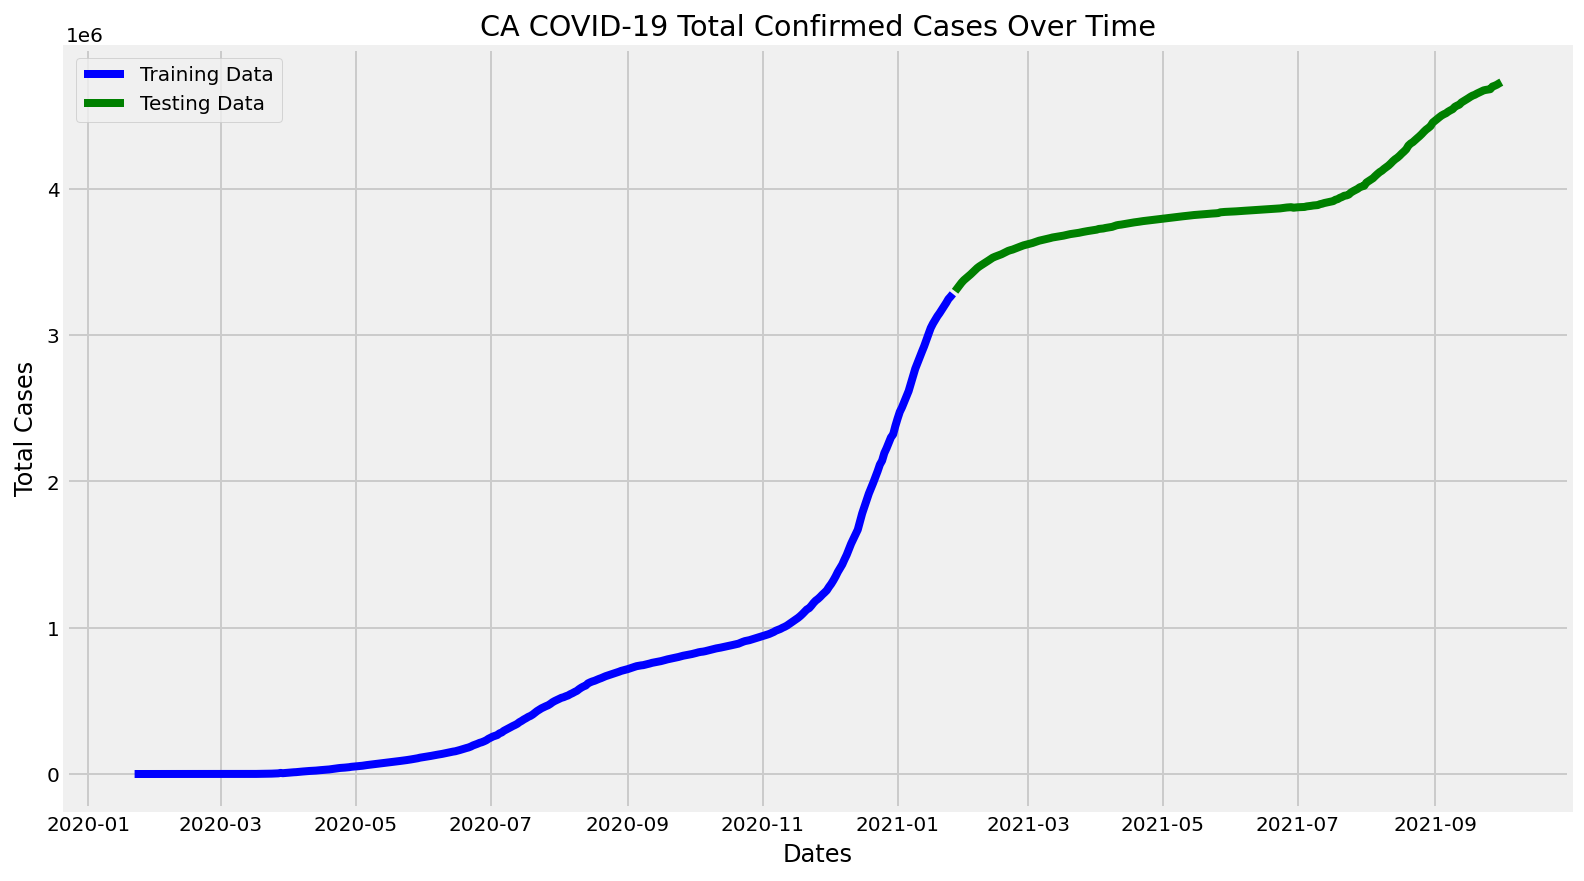

In [61]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Total Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Total Cases')
plt.plot(train_data['SUM'], 'blue', label='Training Data')
plt.plot(test_data['SUM'], 'green', label='Testing Data')
plt.legend();

# Scaling

In [62]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_series.values.reshape(-1,1))
training_set_scaled

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [6.09356300e-07],
       [6.09356300e-07],
       [6.09356300e-07],
       [6.09356300e-07],
       [6.09356300e-07],
       [9.14034451e-07],
       [9.14034451e-07],
       [9.14034451e-07],
       [1.82806890e-06],
       [1.82806890e-06],
       [1.82806890e-06],
       [1.82806890e-06],
       [1.82806890e-06],
       [1.82806890e-06],
       [1.82806890e-06],
       [1.82806890e-06],
       [2.13274705e-06],
       [2.13274705e-06],
       [2.43742520e-06],
       [2.43742520e-06],
       [2.43742520e-06],
       [2.43742520e-06],
       [2.74210335e-06],
       [3.04678150e-06],
       [3.04678150e-06],
       [3.04678150e-06],
       [3.04678150e-06],
       [3.04678150e-06],
       [3.04678150e-06],
       [3.35145965e-06],
       [3.65613780e-06],
       [3.96081595e-06],
       [3.96081595e-06],
       [3.96081595e-06],
       [3.96081595e-06],
       [5.78888485e-06],


In [63]:
training_set_scaled.shape

(371, 1)

# Train Data Preparation

In [64]:
#1 output and 60 values inputs
# So for each element of training set (output), we have 60 previous training set elements (input)

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((311, 60), (311,))

In [65]:
# Reshaping X_train for efficient modeling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

In [66]:
X_train.shape

(311, 60, 1)

# Build the LSTM based forecasting DL Model architecture

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

In [68]:
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(1))

# Compiling the RNN - optimizer(rmsprop)and loss(mean squared error)
regressor.compile(loss='mse', optimizer='rmsprop')

regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 64)            16896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [69]:
regressor.fit(X_train,y_train, epochs=6, batch_size=64, validation_split=0.1, shuffle=False)

Epoch 1/6
5/5 [==============================] - 6s 484ms/step - loss: 0.0160 - val_loss: 0.0146
Epoch 2/6
5/5 [==============================] - 1s 140ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 3/6
5/5 [==============================] - 1s 146ms/step - loss: 0.0017 - val_loss: 1.6660e-04
Epoch 4/6
5/5 [==============================] - 1s 141ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 5/6
5/5 [==============================] - 1s 142ms/step - loss: 7.1654e-04 - val_loss: 0.0106
Epoch 6/6
5/5 [==============================] - 1s 147ms/step - loss: 8.9588e-04 - val_loss: 0.0414


# Test Data Forecasting¶

# Get the last 60 records from train_series¶

In [70]:
train_last60 = train_series[-60:]
print(train_last60.shape)
assert train_last60.shape == (60,), ("Oops! There is a data dimension mismatch error. Hint: Slice the last 60 records from train_series")

(60,)


In [71]:
test_series.shape

(248,)

In [72]:
print(test_series)

Date
2021-01-27    3299735
2021-01-28    3320120
2021-01-29    3339888
2021-01-30    3359548
2021-01-31    3375867
               ...   
2021-09-27    4698939
2021-09-28    4704576
2021-09-29    4711550
2021-09-30    4720860
2021-10-01    4729153
Name: SUM, Length: 248, dtype: int64


# Combine both train_last60 and test_series together

In [73]:
new_test_series =  pd.concat([train_last60, test_series], axis=0)
print(new_test_series.shape)
#assert new_test_series.shape == (664,), ("Oops! There is a data dimension mismatch error. Hint: Use pandas concat with the right axis parameter")

(308,)


# Scale the test dataset using the trained MinMaxScaler transformer - sc

In [74]:
test_set_scaled = sc.transform(new_test_series.values.reshape(-1, 1))

# Prepare Test dataset Windows of 60 days each

In [75]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,len(test_set_scaled)):
    X_test.append(test_set_scaled[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

(248, 60, 1)

# Model Prediction and Reverse Transform

In [76]:
predicted_confirmed_cases = regressor.predict(X_test)
predicted_confirmed_cases_revtrans = sc.inverse_transform(predicted_confirmed_cases).ravel()
predicted_confirmed_cases_revtrans_series = pd.Series(predicted_confirmed_cases_revtrans)
predicted_confirmed_cases_revtrans_series.index = test_series.index
predicted_confirmed_cases_revtrans_series.shape, test_series.shape

((248,), (248,))

# Model Evaluation

In [77]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

In [78]:
error = mean_squared_error(test_series, predicted_confirmed_cases_revtrans_series)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_series, predicted_confirmed_cases_revtrans_series)
print('Symmetric Mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 1231428310924.511
Symmetric Mean absolute percentage error: 24.913


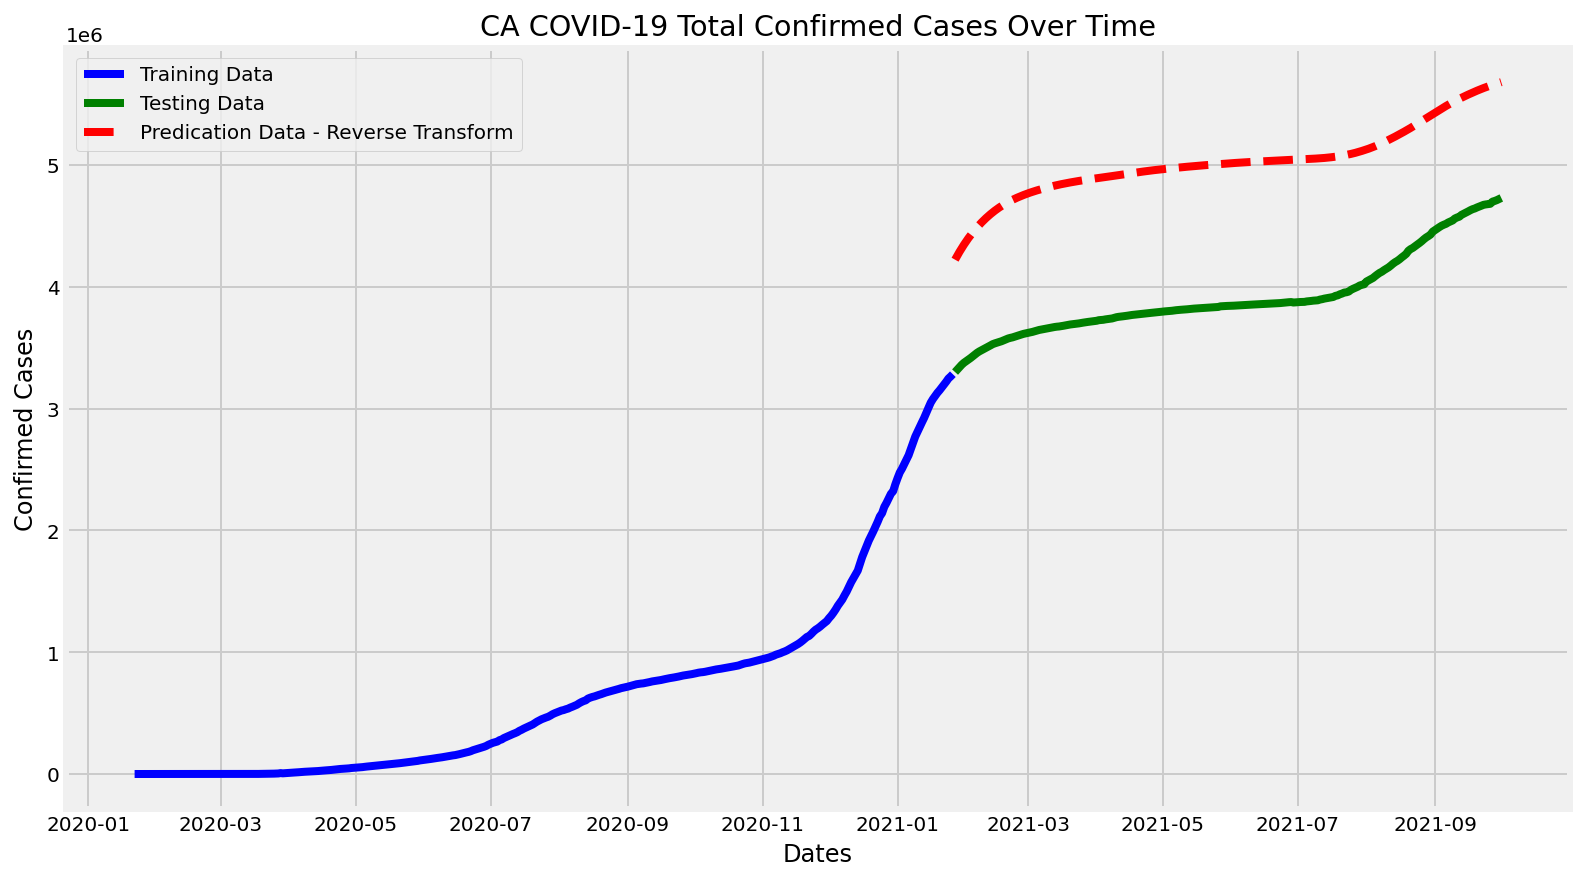

In [79]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Total Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(train_series, color='blue', label='Training Data')
plt.plot(test_series, color='green', label='Testing Data')
plt.plot(predicted_confirmed_cases_revtrans_series, color='red', linestyle='--', label='Predication Data - Reverse Transform')
plt.legend();

# Visualize only test and forecast data

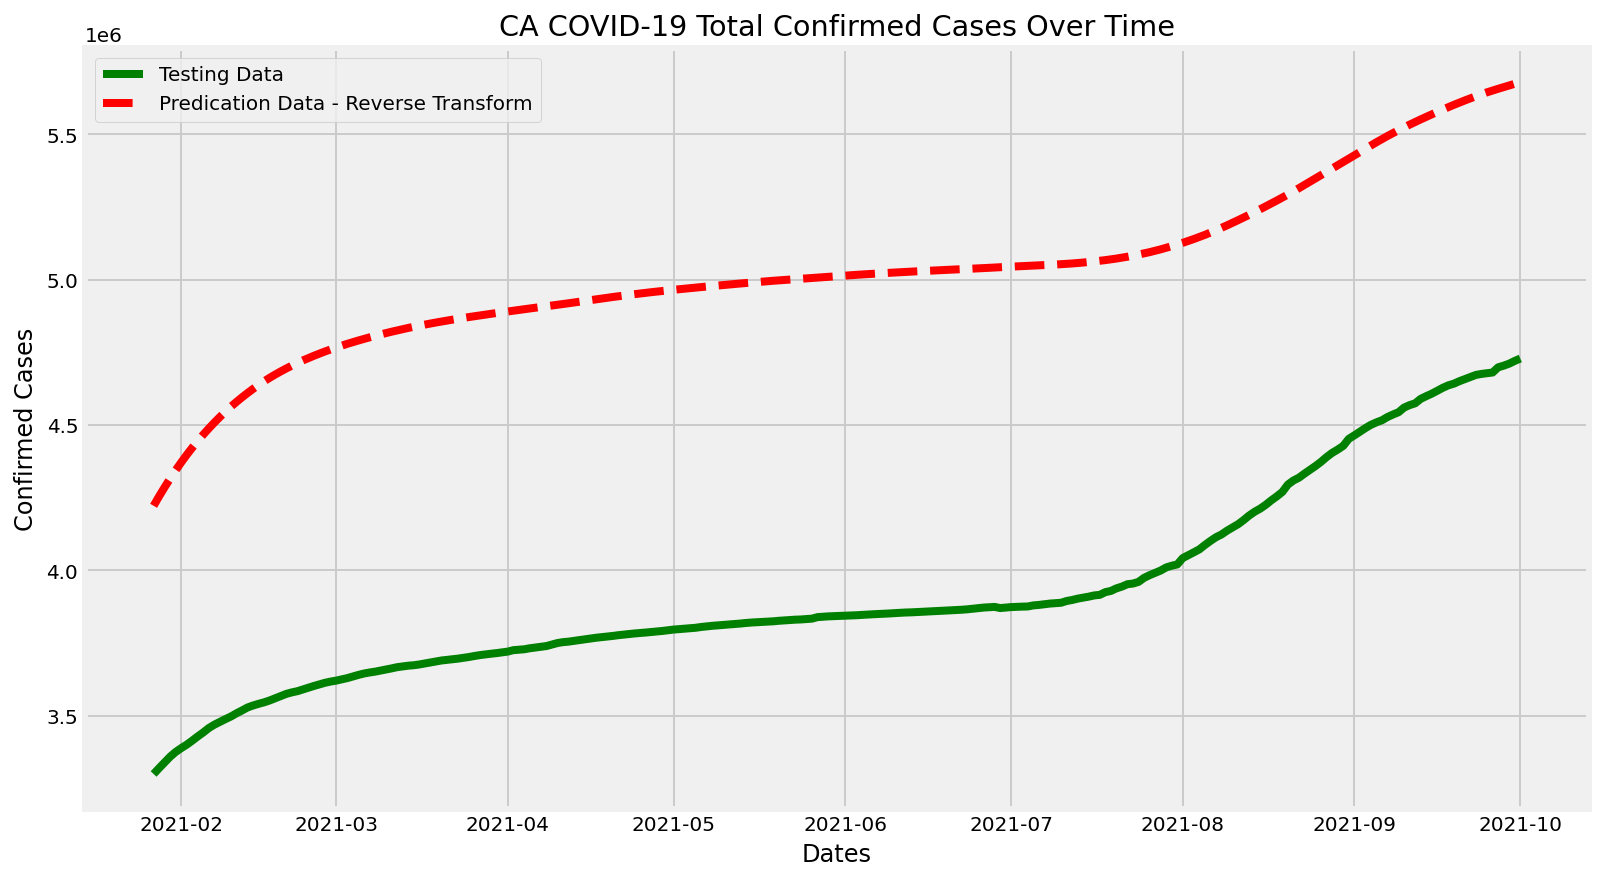

In [80]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Total Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(test_series, color='green', label='Testing Data')
plt.plot(predicted_confirmed_cases_revtrans_series, color='red', linestyle='--', label='Predication Data - Reverse Transform')
plt.legend();

# Generate forecasts

In [81]:
# Future predictions using LSTM 
LSTM_df = pd.DataFrame({'Future Date': future_forcast_dates[-10:], 'LSTM Predicted # of CA Total Confirmed Cases': np.round(predicted_confirmed_cases_revtrans_series[-10:])})
LSTM_df.style.background_gradient(cmap='Reds')

In [82]:
LSTM_df.reset_index(drop=True)

Future Date  LSTM Predicted # of CA Total Confirmed Cases
0  10/01/2021                                     5624450.0
1  10/02/2021                                     5631546.0
2  10/03/2021                                     5638432.0
3  10/04/2021                                     5645014.0
4  10/05/2021                                     5651232.0
5  10/06/2021                                     5657058.0
6  10/07/2021                                     5662902.0
7  10/08/2021                                     5668641.0
8  10/09/2021                                     5674290.0
9  10/10/2021                                     5679918.0

# 5. ARIMA Model

In [83]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# Let's load the libraries and dependencies for the deep learning model
from sklearn.preprocessing import MinMaxScaler

#%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD

# (1) Daily Confirmed Cases Prediction- CA

In [85]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_CA_Transposed.csv')
confirmed_df = confirmed_df.dropna()
confirmed_df.tail()

Date  Alameda  Alpine  Amador  Butte  Calaveras  Colusa  \
614  9/27/2021   117387     101    5055  22019       3555    2944   
615  9/28/2021   117517     101    5071  22072       3564    2945   
616  9/29/2021   117655     101    5103  22149       3580    2951   
617  9/30/2021   117811     101    5119  22380       3602    2966   
618  10/1/2021   117998     102    5166  22456       3634    2968   

     Contra Costa  Del Norte  El Dorado  ...  Tehama  Trinity  Tulare  \
614         96871       3482      16291  ...    8560      758   74793   
615         96973       3484      16317  ...    8582      772   74941   
616         97109       3478      16346  ...    8619      780   75149   
617         97261       3494      16417  ...    8699      789   75711   
618         97417       3495      16470  ...    8743      798   75912   

     Tuolumne  Unassigned  Ventura   Yolo  Yuba      SUM  Daily  
614      6301         143    98624  19462  9455  4698939  17880  
615      6329         165    98710  19490  9472  4704576   5637  
616      6373          95    98865  19530  9503  4711550   6974  
617      6406         124    99034  19591  9547  4720860   9310  
618      6439         116    99135  19644  9566  4729153   8293  

[5 rows x 63 columns]

In [86]:
confirmed_df.index = pd.to_datetime(confirmed_df['Date'])
confirmed_df.tail()

Date  Alameda  Alpine  Amador  Butte  Calaveras  Colusa  \
Date                                                                       
2021-09-27  9/27/2021   117387     101    5055  22019       3555    2944   
2021-09-28  9/28/2021   117517     101    5071  22072       3564    2945   
2021-09-29  9/29/2021   117655     101    5103  22149       3580    2951   
2021-09-30  9/30/2021   117811     101    5119  22380       3602    2966   
2021-10-01  10/1/2021   117998     102    5166  22456       3634    2968   

            Contra Costa  Del Norte  El Dorado  ...  Tehama  Trinity  Tulare  \
Date                                            ...                            
2021-09-27         96871       3482      16291  ...    8560      758   74793   
2021-09-28         96973       3484      16317  ...    8582      772   74941   
2021-09-29         97109       3478      16346  ...    8619      780   75149   
2021-09-30         97261       3494      16417  ...    8699      789   75711   
2021-10-01         97417       3495      16470  ...    8743      798   75912   

            Tuolumne  Unassigned  Ventura   Yolo  Yuba      SUM  Daily  
Date                                                                    
2021-09-27      6301         143    98624  19462  9455  4698939  17880  
2021-09-28      6329         165    98710  19490  9472  4704576   5637  
2021-09-29      6373          95    98865  19530  9503  4711550   6974  
2021-09-30      6406         124    99034  19591  9547  4720860   9310  
2021-10-01      6439         116    99135  19644  9566  4729153   8293  

[5 rows x 63 columns]

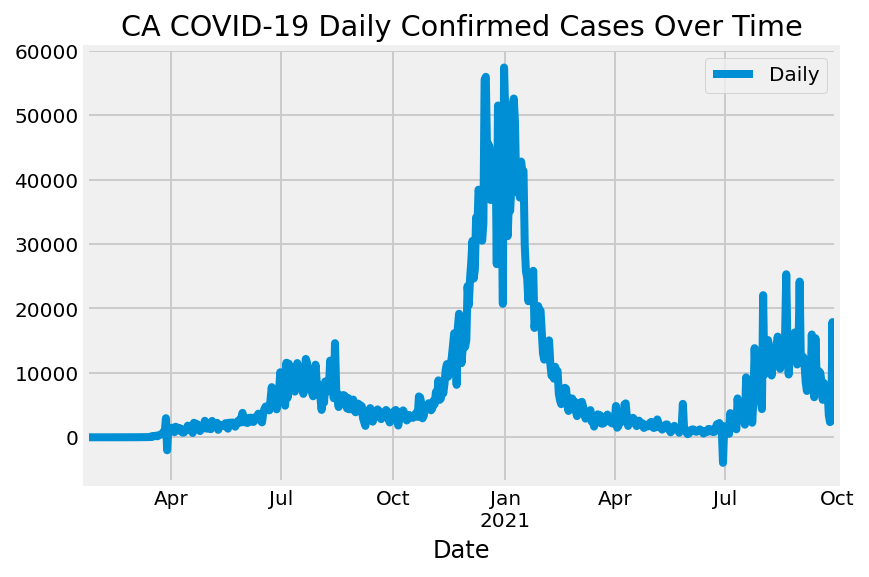

In [87]:
dr = confirmed_df[['Daily']]
dr.plot()
plt.title('CA COVID-19 Daily Confirmed Cases Over Time');

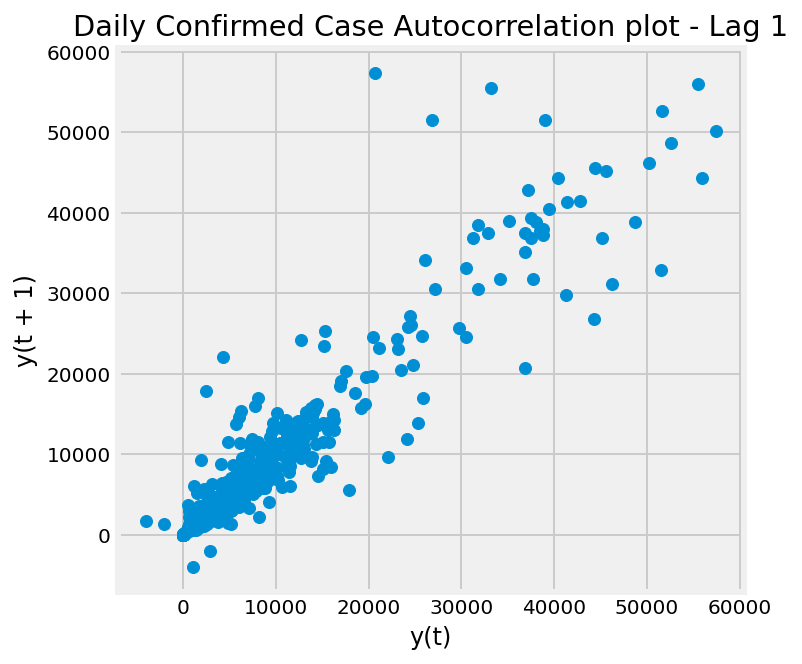

In [88]:
from pandas.plotting import lag_plot

plt.figure(figsize=(5,5))
lag_plot(confirmed_df['Daily'], lag=1)
plt.title('Daily Confirmed Case Autocorrelation plot - Lag 1');


# Build Train-Test Datasets

In [89]:
train_data, test_data = confirmed_df.iloc[0:int(len(confirmed_df)*0.58), :], confirmed_df.iloc[int(len(confirmed_df)*0.58):, :]

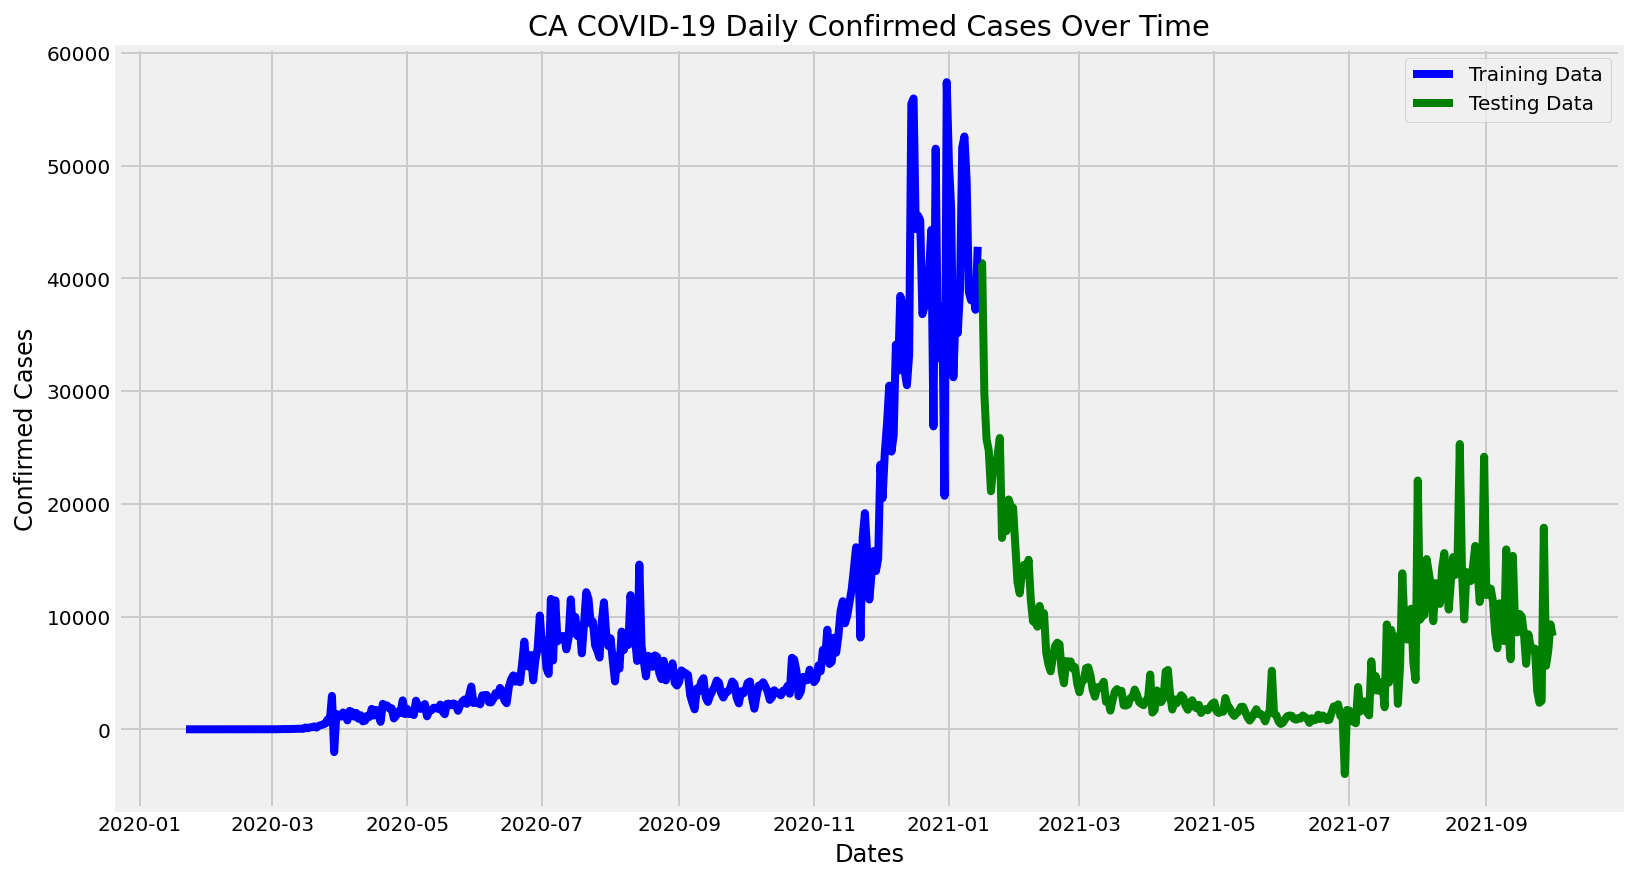

In [90]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Daily Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(train_data['Daily'], 'blue', label='Training Data')
plt.plot(test_data['Daily'], 'green', label='Testing Data')
plt.legend();

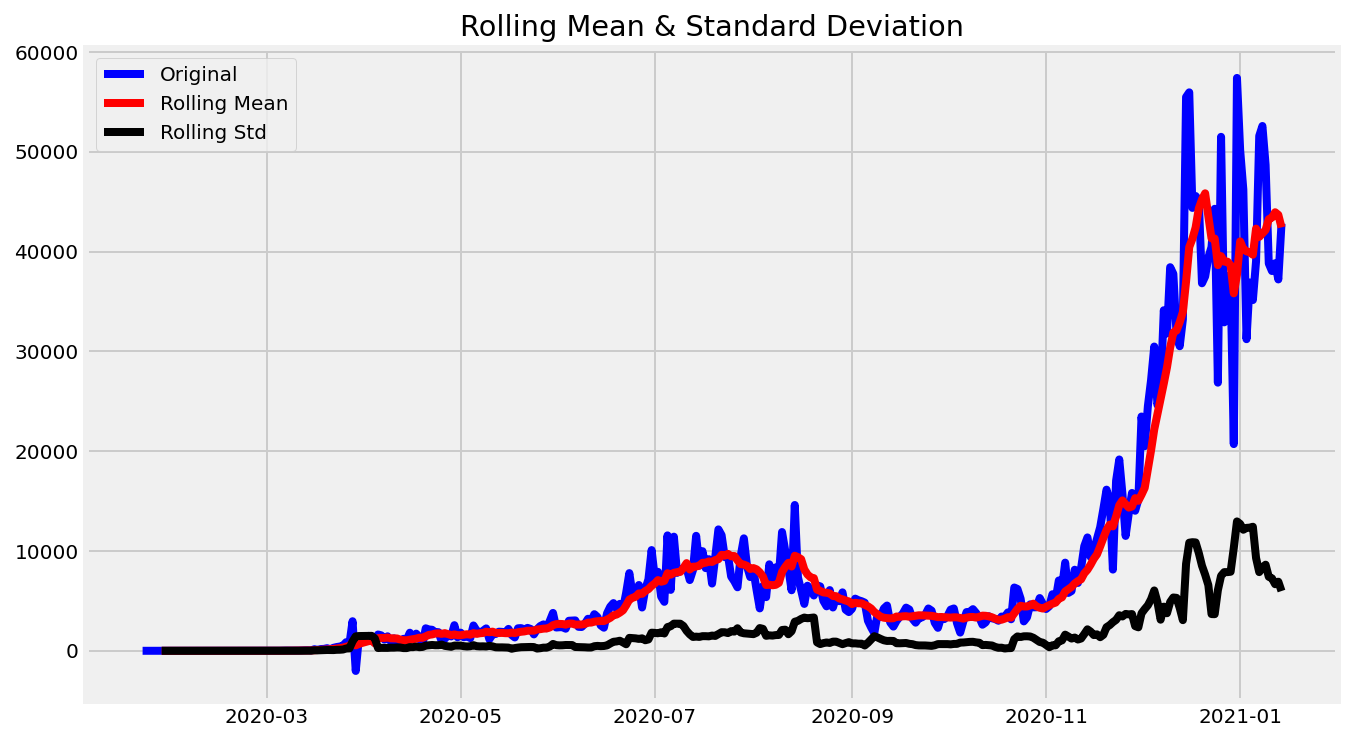

In [91]:
window = 7
train_series = train_data['Daily']

#Determing rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

In [92]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(train_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -0.253729
p-value                          0.931807
#Lags Used                      17.000000
Number of Observations Used    341.000000
Critical Value (1%)             -3.449673
Critical Value (5%)             -2.870053
Critical Value (10%)            -2.571306
dtype: float64

# Apply a first order differencing on the training data

In [93]:
train_diff = train_series.diff()
train_diff = train_diff.dropna(inplace = False)

In [94]:
train_diff

Date
2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       2.0
2020-01-27      -2.0
               ...  
2021-01-10   -9883.0
2021-01-11    -757.0
2021-01-12     783.0
2021-01-13   -1625.0
2021-01-14    5591.0
Name: Daily, Length: 358, dtype: float64

# Visualize Rolling statistics for differenced train data

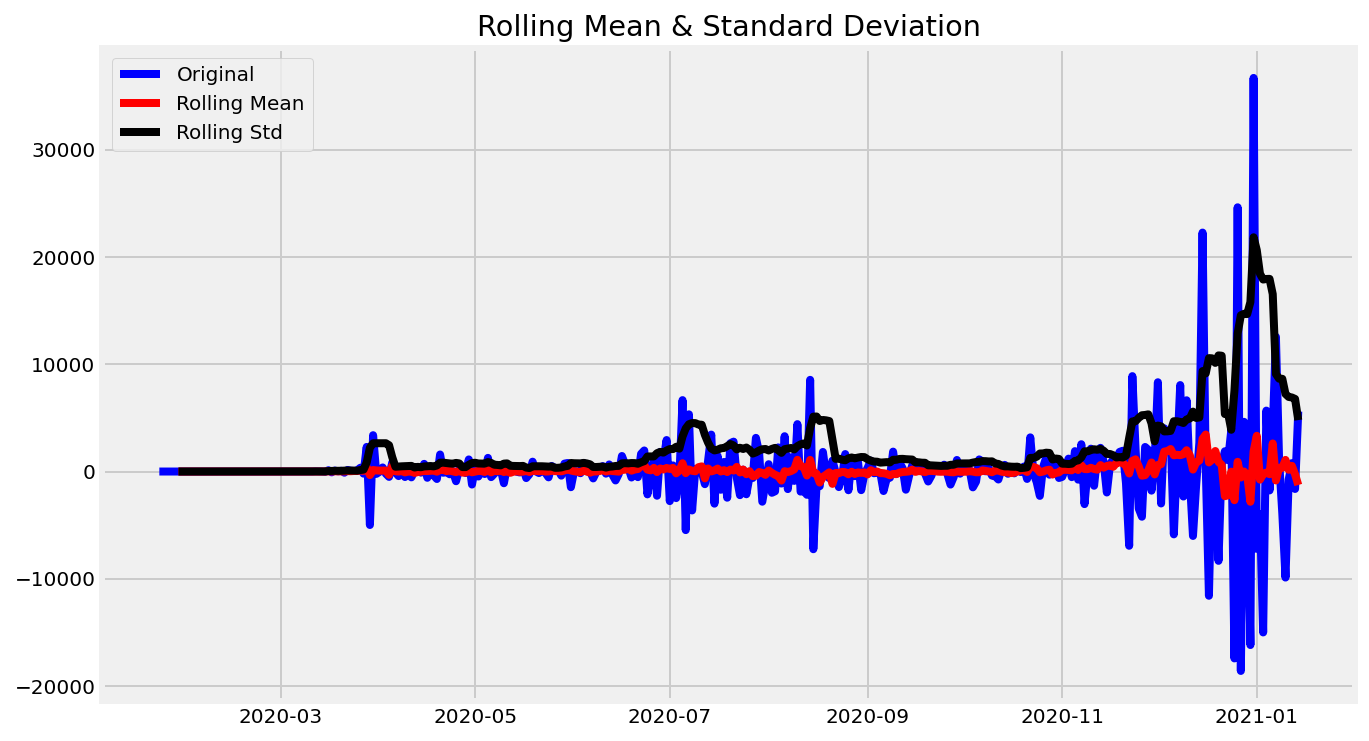

In [95]:
#Determing rolling statistics
rolmean = train_diff.rolling(window).mean()
rolstd = train_diff.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_diff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

# Compute AD-Fuller Stats for differenced train data

In [96]:
dftest = adfuller(train_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -2.846683
p-value                          0.051909
#Lags Used                      17.000000
Number of Observations Used    340.000000
Critical Value (1%)             -3.449730
Critical Value (5%)             -2.870079
Critical Value (10%)            -2.571319
dtype: float64

# Plot ACF and PACF on the original train series

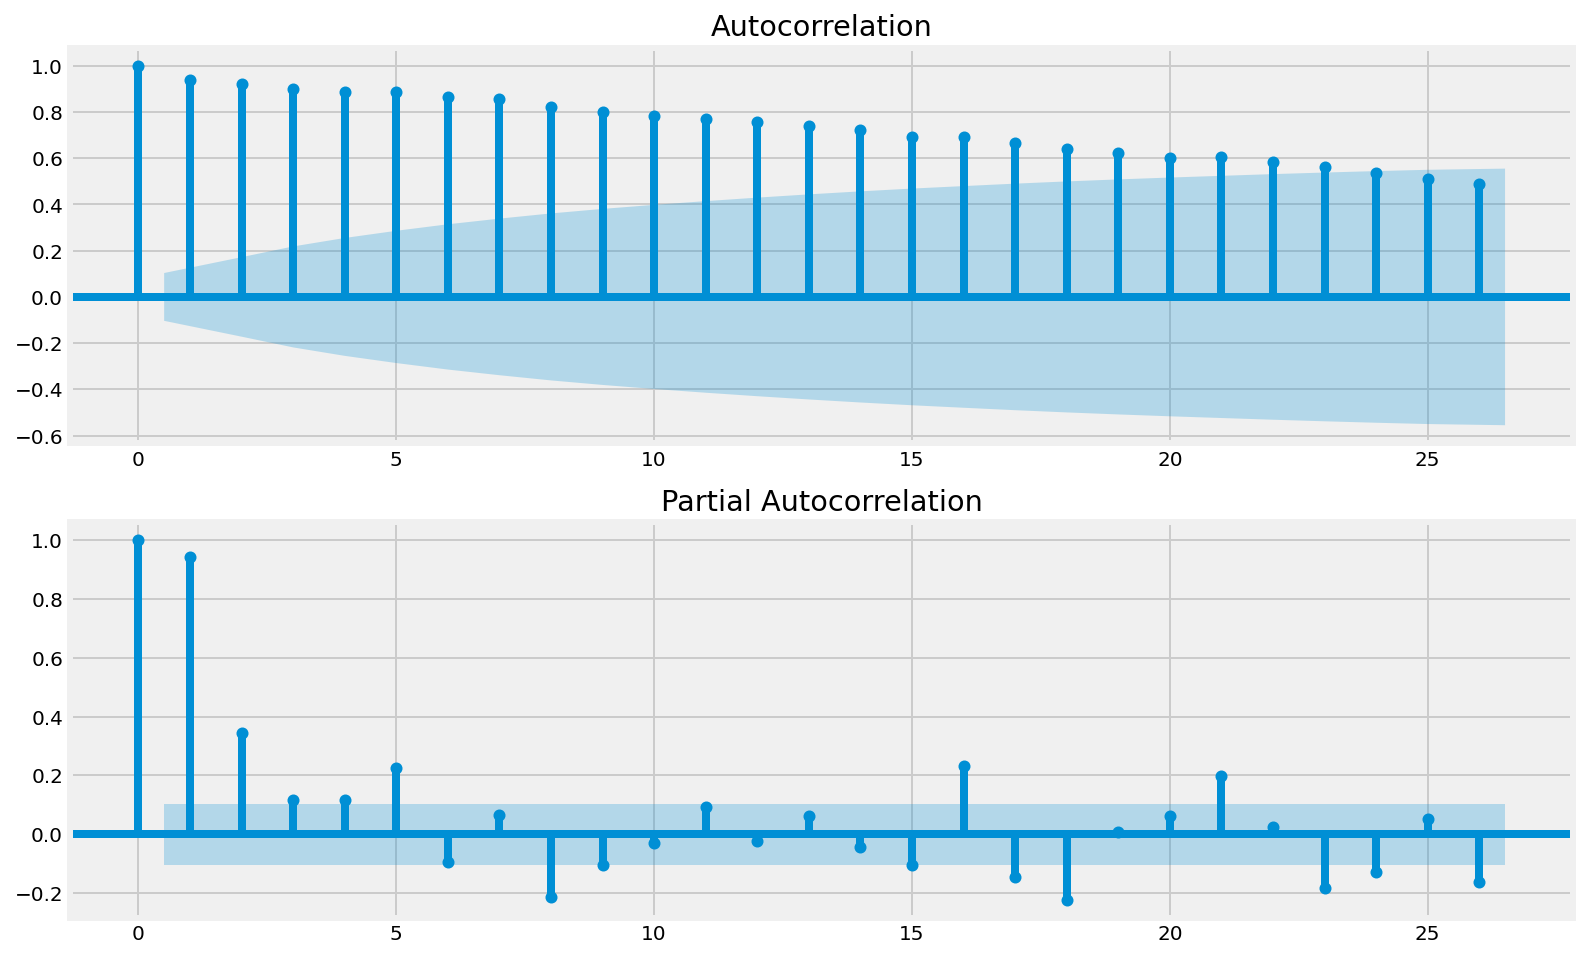

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_series, ax=ax[0]); # 
plot_pacf(train_series, ax=ax[1]);

# Plot ACF and PACF on the differenced train series

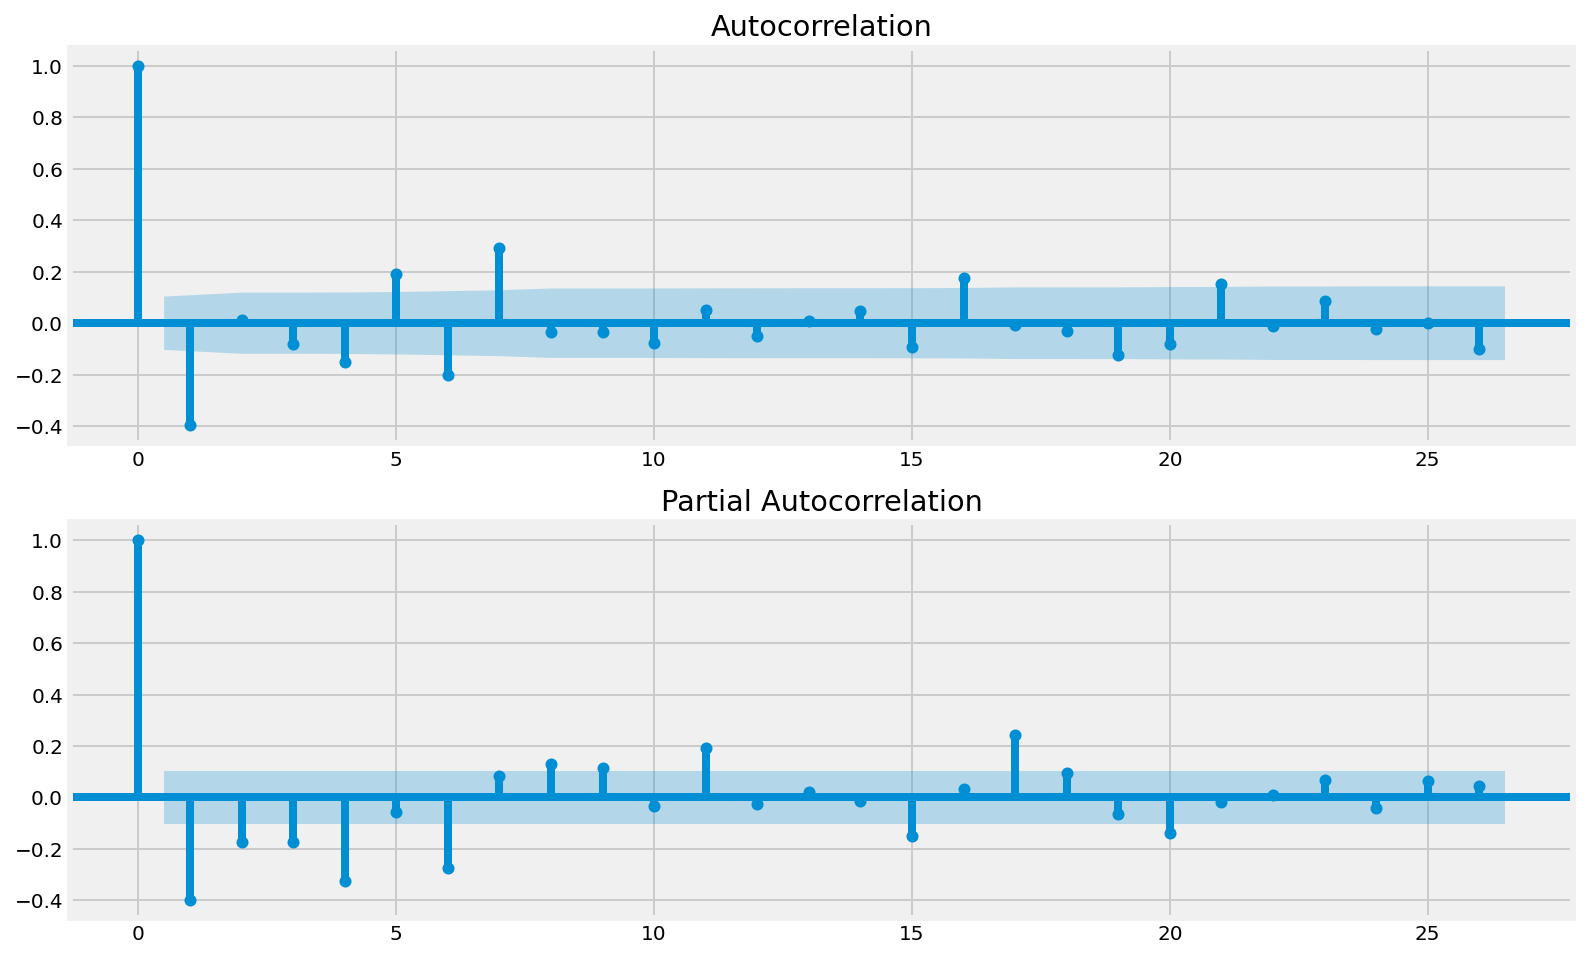

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_diff, ax=ax[0]); # 
plot_pacf(train_diff, ax=ax[1]);

# Evaluation of ARIMA Model

In [99]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Difference the Test Series

In [100]:
test_series = test_data['Daily']
test_diff = test_series.diff()
test_diff = test_diff.dropna(inplace = False)
test_diff

Date
2021-01-16      -93.0
2021-01-17   -11541.0
2021-01-18    -4058.0
2021-01-19     -984.0
2021-01-20    -3630.0
               ...   
2021-09-27    15360.0
2021-09-28   -12243.0
2021-09-29     1337.0
2021-09-30     2336.0
2021-10-01    -1017.0
Name: Daily, Length: 259, dtype: float64

# Train and Forecast using ARIMA Model by filling in the necessary blocks

In [101]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [102]:
%%time 

history = [x for x in train_diff]

predictions = list()
for t in range(len(test_diff)):

    model = ARIMA(history, order=(5,1,0))  # initialize the model with history and right order of parameters
    model_fit = model.fit(disp=0)  # fit the model
   
    output = model_fit.forecast()  # use forecast on the fitted model
    yhat = output[0][0]
    predictions.append(yhat)

    obs = test_diff[t]
    history.append(obs)

    if t % 100 == 0:
      print('Test Series Point: {}\tPredicted={}, Expected={}'.format(t, yhat, obs))

Test Series Point: 0	Predicted=-6227.3828455312105, Expected=-93.0
Test Series Point: 100	Predicted=232.95532335878443, Expected=255.0
Test Series Point: 200	Predicted=-369.73649256451176, Expected=118.0
CPU times: user 1min 21s, sys: 17.2 s, total: 1min 38s
Wall time: 1min 8s


# Reverse Transform the forecasted values

In [103]:
reverse_test_diff = np.r_[test_series.iloc[0], test_diff].cumsum()
reverse_predictions = np.r_[test_series.iloc[0], predictions].cumsum()
reverse_test_diff.shape, reverse_predictions.shape

((260,), (260,))

# Evaluate model performance

In [104]:
error = mean_squared_error(reverse_test_diff, reverse_predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(reverse_test_diff, reverse_predictions)
print('Symmetric Mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 15605234.812
Symmetric Mean absolute percentage error: 111.515


In [105]:
reverse_test_diff_series = pd.Series(reverse_test_diff)
reverse_test_diff_series.index = test_series.index

reverse_predictions_series = pd.Series(reverse_predictions)
reverse_predictions_series.index = test_series.index

# Visualize the forecast results

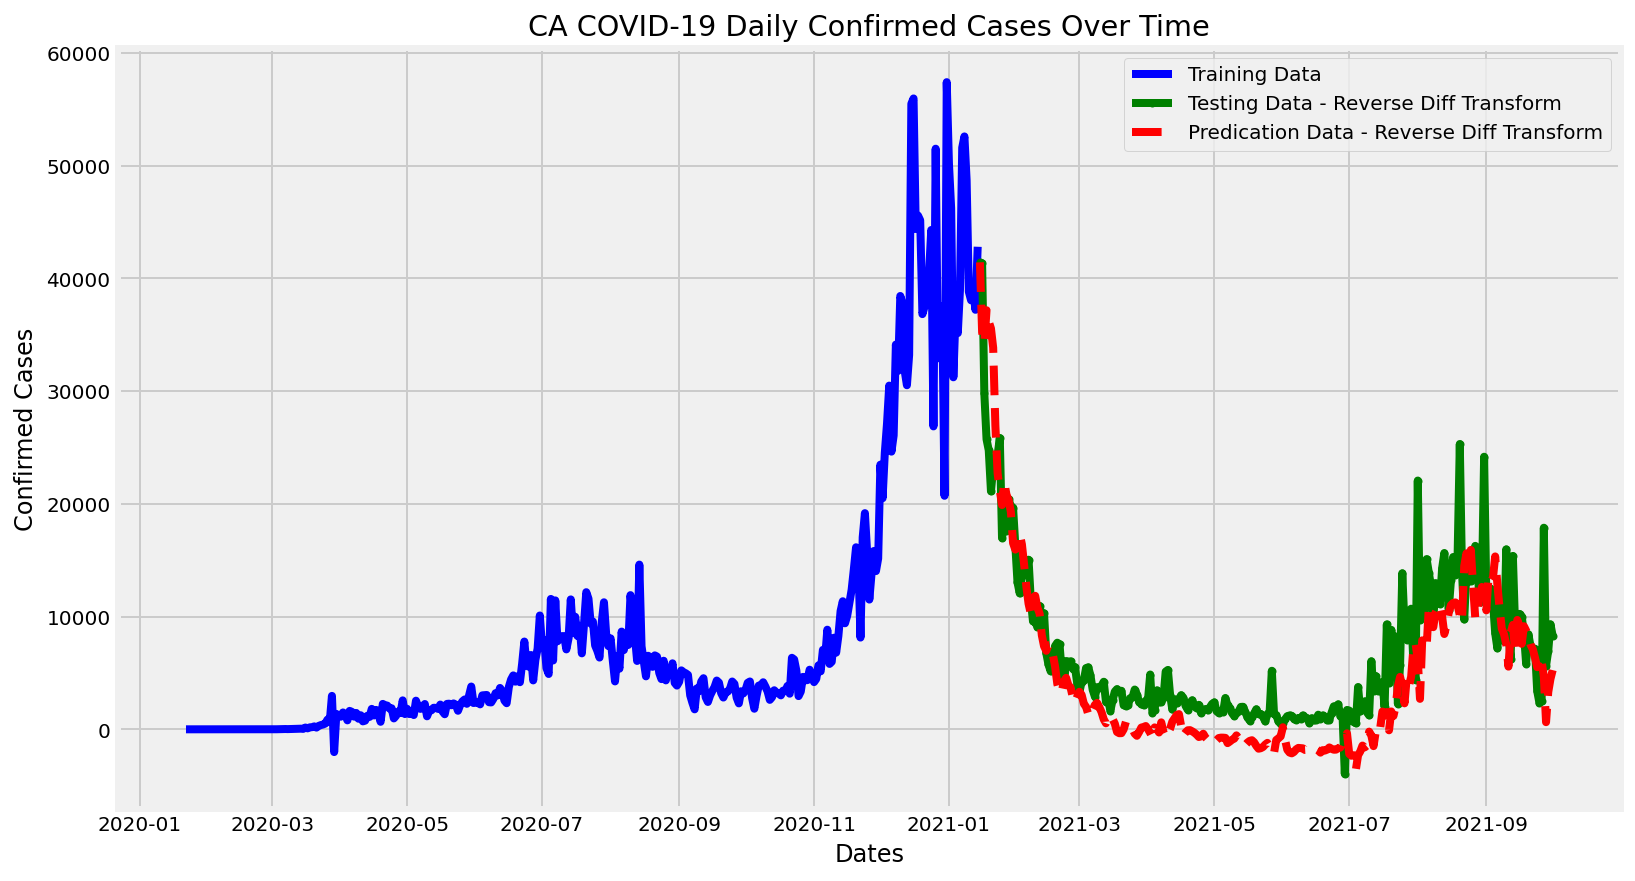

In [106]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Daily Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(train_series, color='blue', label='Training Data')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Data - Reverse Diff Transform')
plt.plot(reverse_predictions_series, color='red', linestyle='--', label='Predication Data - Reverse Diff Transform')
plt.legend();

# Visualize only test and forecast prices

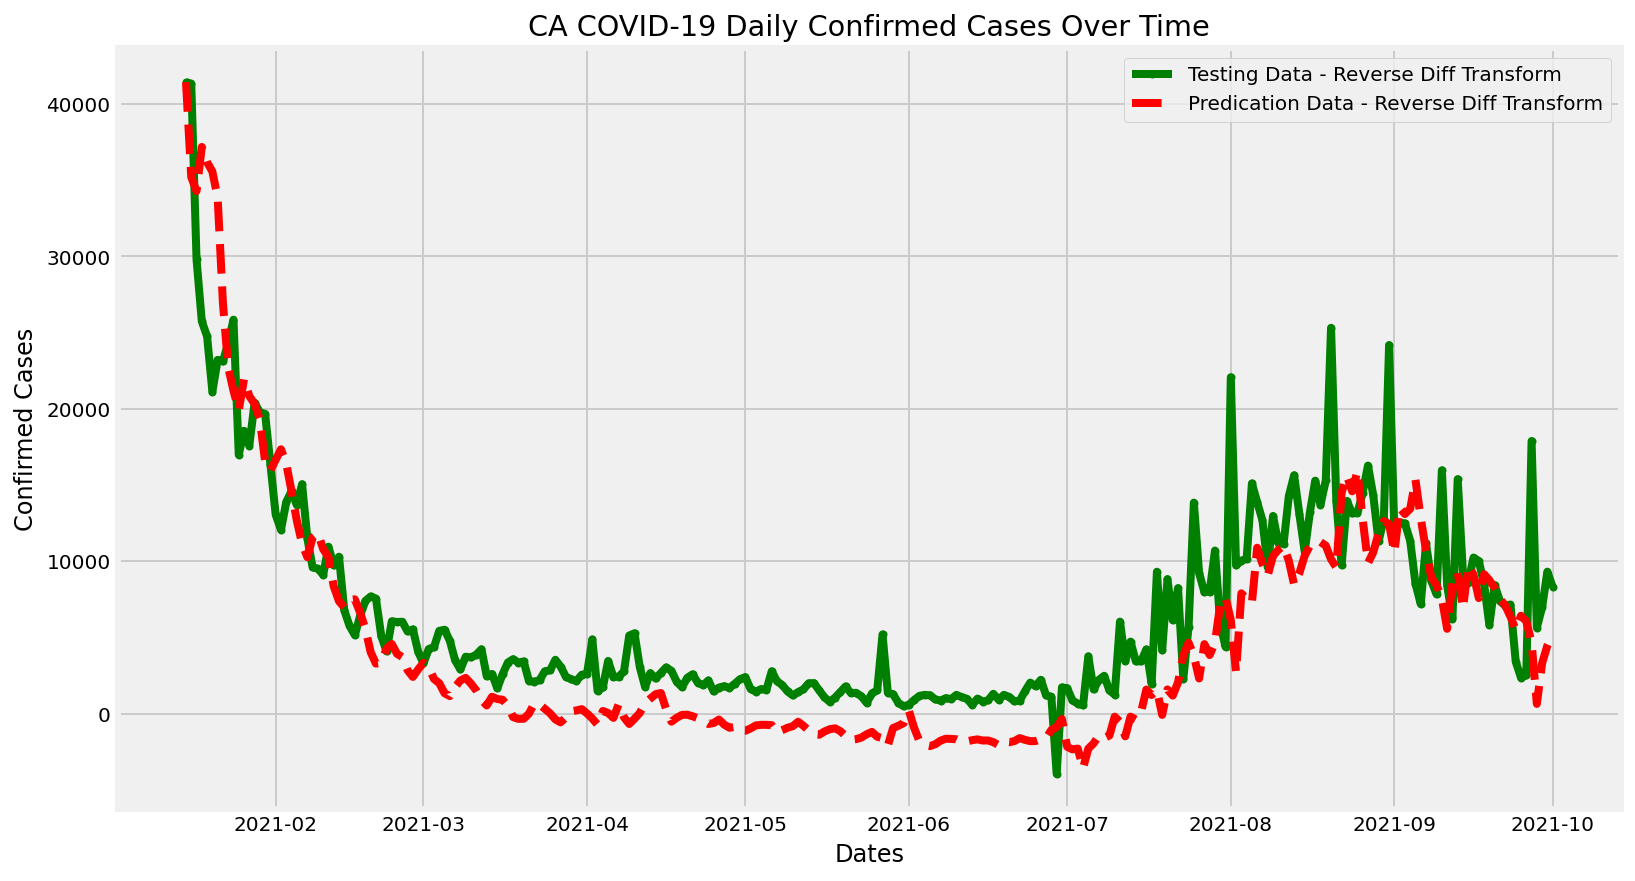

In [107]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Daily Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Data - Reverse Diff Transform')
plt.plot(reverse_predictions_series, color='red', linestyle='--', label='Predication Data - Reverse Diff Transform')
plt.legend();

# Generate forecasts

In [108]:
# Future predictions using ARIMA 
ARIMA_df = pd.DataFrame({'Future Date': future_forcast_dates[-10:], 'ARIMA Predicted # of CA Total Confirmed Cases': np.round(reverse_predictions_series[-10:])})
ARIMA_df.style.background_gradient(cmap='Reds')

In [109]:
ARIMA_df.reset_index(drop=True)


Future Date  ARIMA Predicted # of CA Total Confirmed Cases
0  10/01/2021                                         7105.0
1  10/02/2021                                         6360.0
2  10/03/2021                                         5509.0
3  10/04/2021                                         6417.0
4  10/05/2021                                         6055.0
5  10/06/2021                                         4669.0
6  10/07/2021                                          634.0
7  10/08/2021                                         3306.0
8  10/09/2021                                         4467.0
9  10/10/2021                                         5251.0

# (2) Total Confirmed Cases Prediction- CA

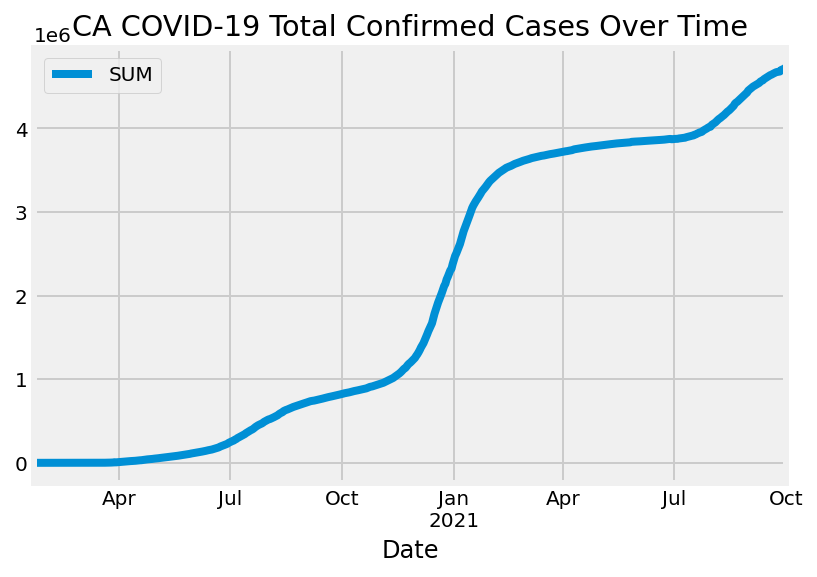

In [110]:
dr = confirmed_df[['SUM']]
dr.plot()
plt.title('CA COVID-19 Total Confirmed Cases Over Time');

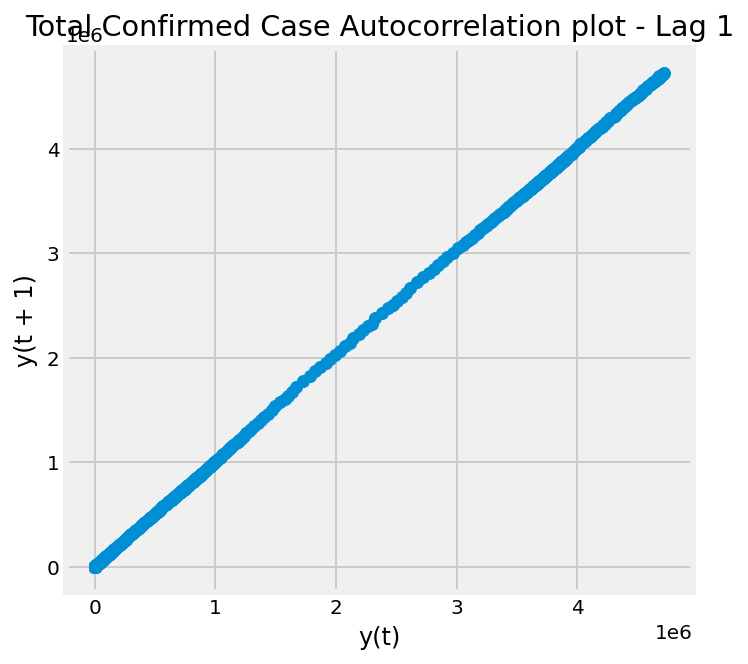

In [111]:
from pandas.plotting import lag_plot

plt.figure(figsize=(5,5))
lag_plot(confirmed_df['SUM'], lag=1)
plt.title('Total Confirmed Case Autocorrelation plot - Lag 1');


# Build Train-Test Datasets

In [112]:
train_data, test_data = confirmed_df.iloc[0:int(len(confirmed_df)*0.6), :], confirmed_df.iloc[int(len(confirmed_df)*0.6):, :]

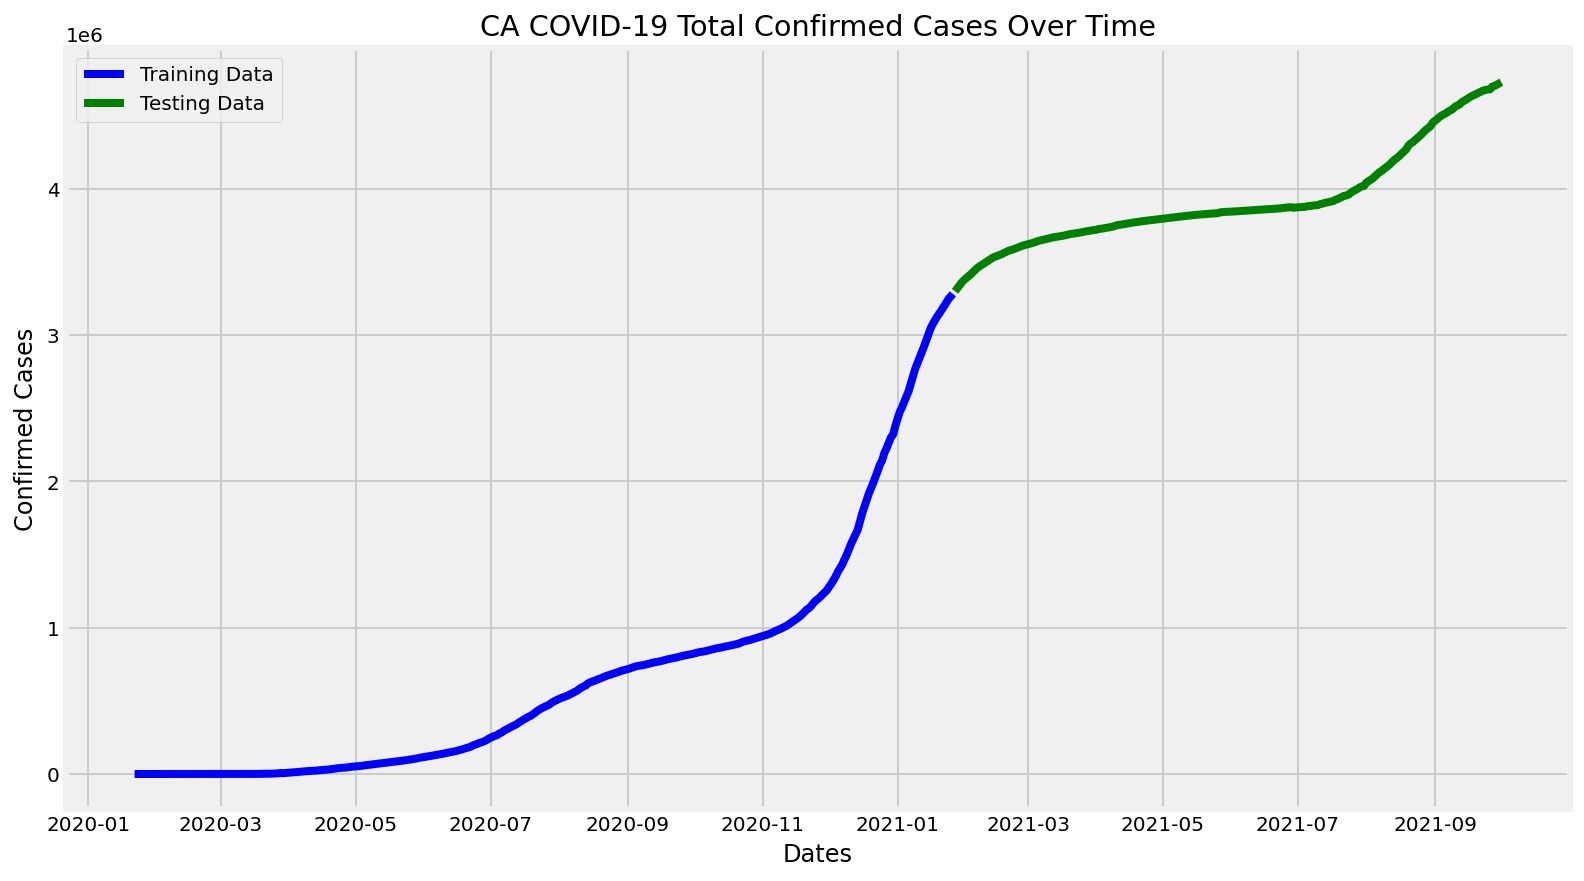

In [113]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Total Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(train_data['SUM'], 'blue', label='Training Data')
plt.plot(test_data['SUM'], 'green', label='Testing Data')
plt.legend();

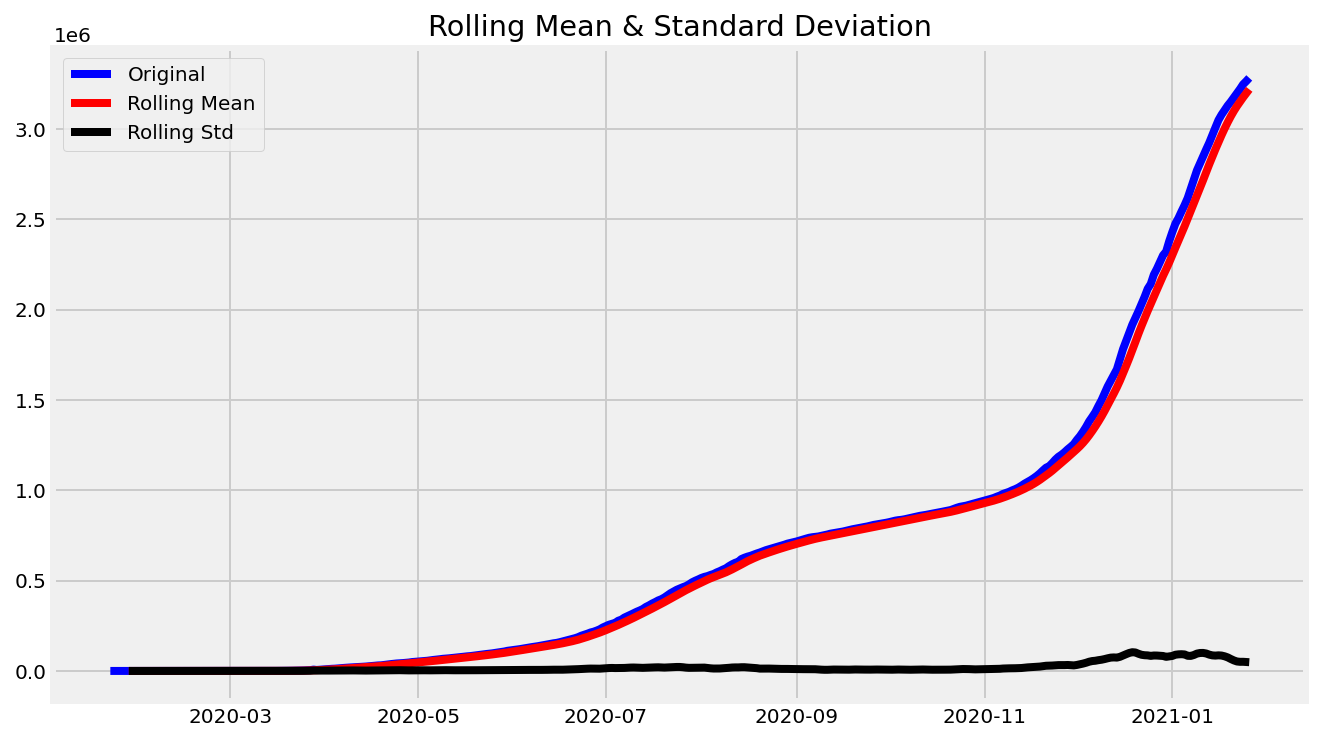

In [114]:
window = 7
train_series = train_data['SUM']

#Determing rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

In [115]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(train_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                   0.013798
p-value                          0.959658
#Lags Used                      16.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64

# Apply a first order differencing on the training data

In [116]:
train_diff = train_series.diff()
train_diff = train_diff.dropna(inplace = False)

In [117]:
train_diff

Date
2020-01-23        0.0
2020-01-24        0.0
2020-01-25        0.0
2020-01-26        2.0
2020-01-27        0.0
               ...   
2021-01-22    23097.0
2021-01-23    24307.0
2021-01-24    25840.0
2021-01-25    16975.0
2021-01-26    18549.0
Name: SUM, Length: 370, dtype: float64

# Visualize Rolling statistics for differenced train data

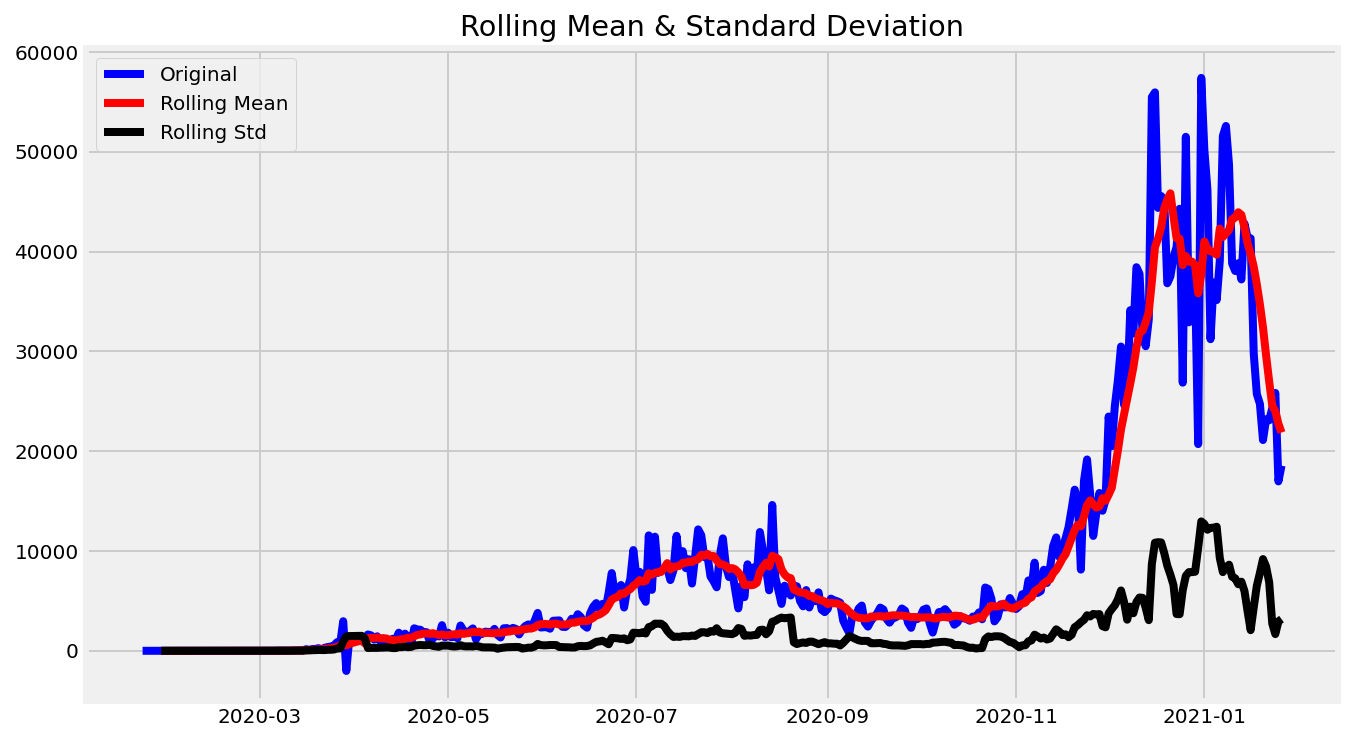

In [118]:
#Determing rolling statistics
rolmean = train_diff.rolling(window).mean()
rolstd = train_diff.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_diff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

# Compute AD-Fuller Stats for differenced train data

In [119]:
dftest = adfuller(train_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -1.922641
p-value                          0.321486
#Lags Used                      17.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

# Plot ACF and PACF on the original train series

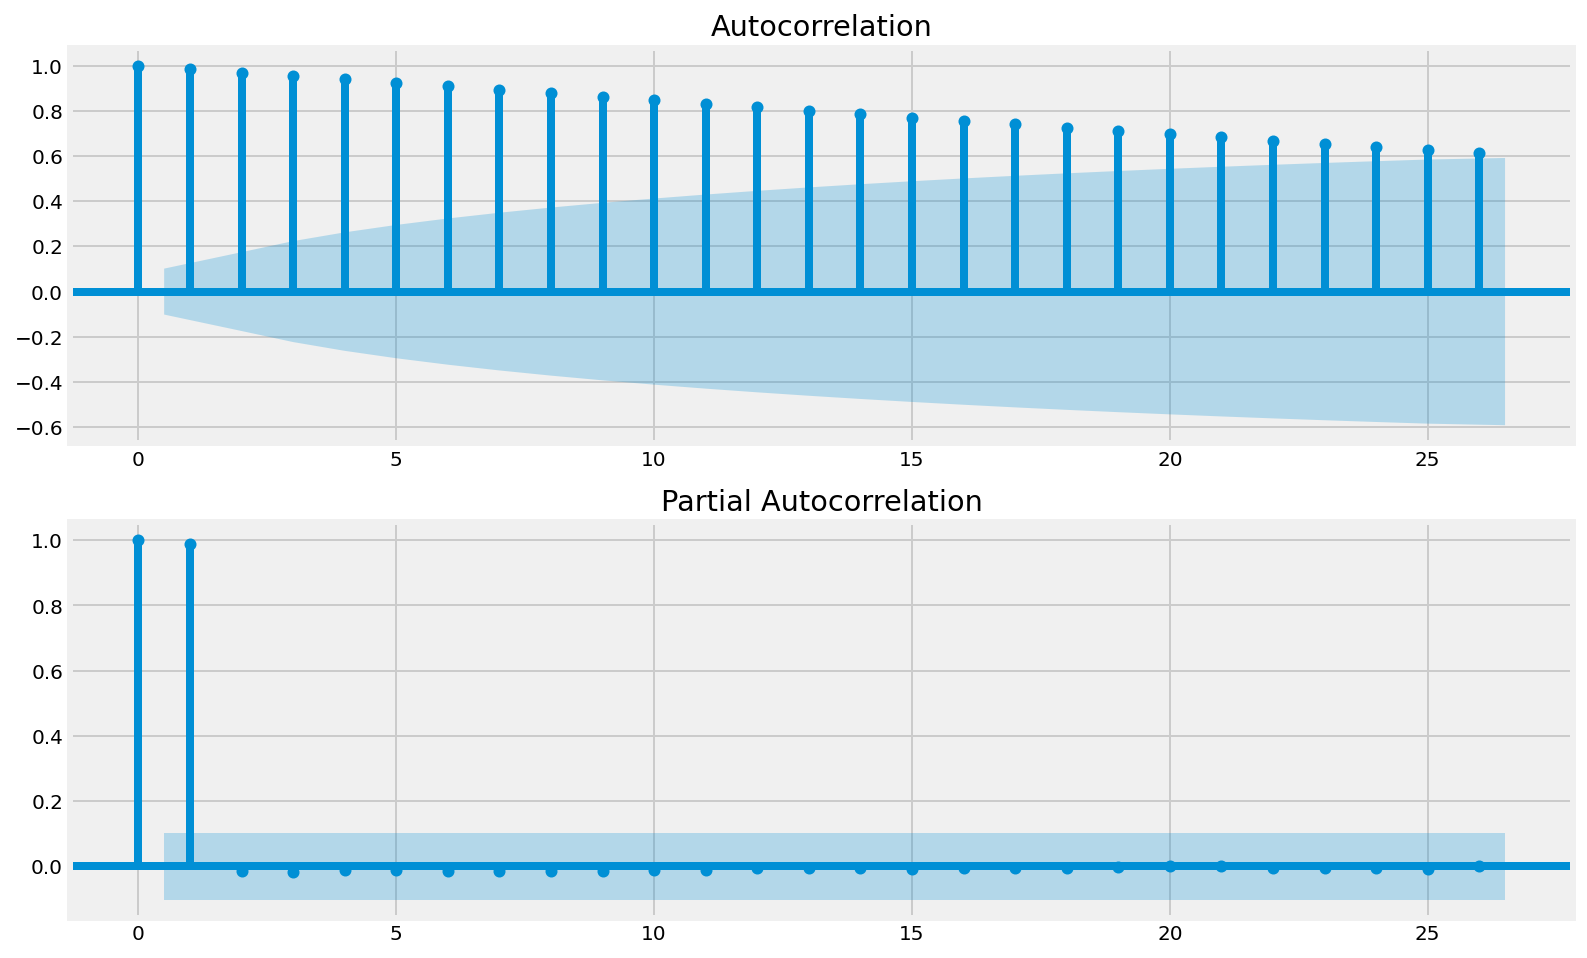

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_series, ax=ax[0]); # 
plot_pacf(train_series, ax=ax[1]);

# Plot ACF and PACF on the differenced train series

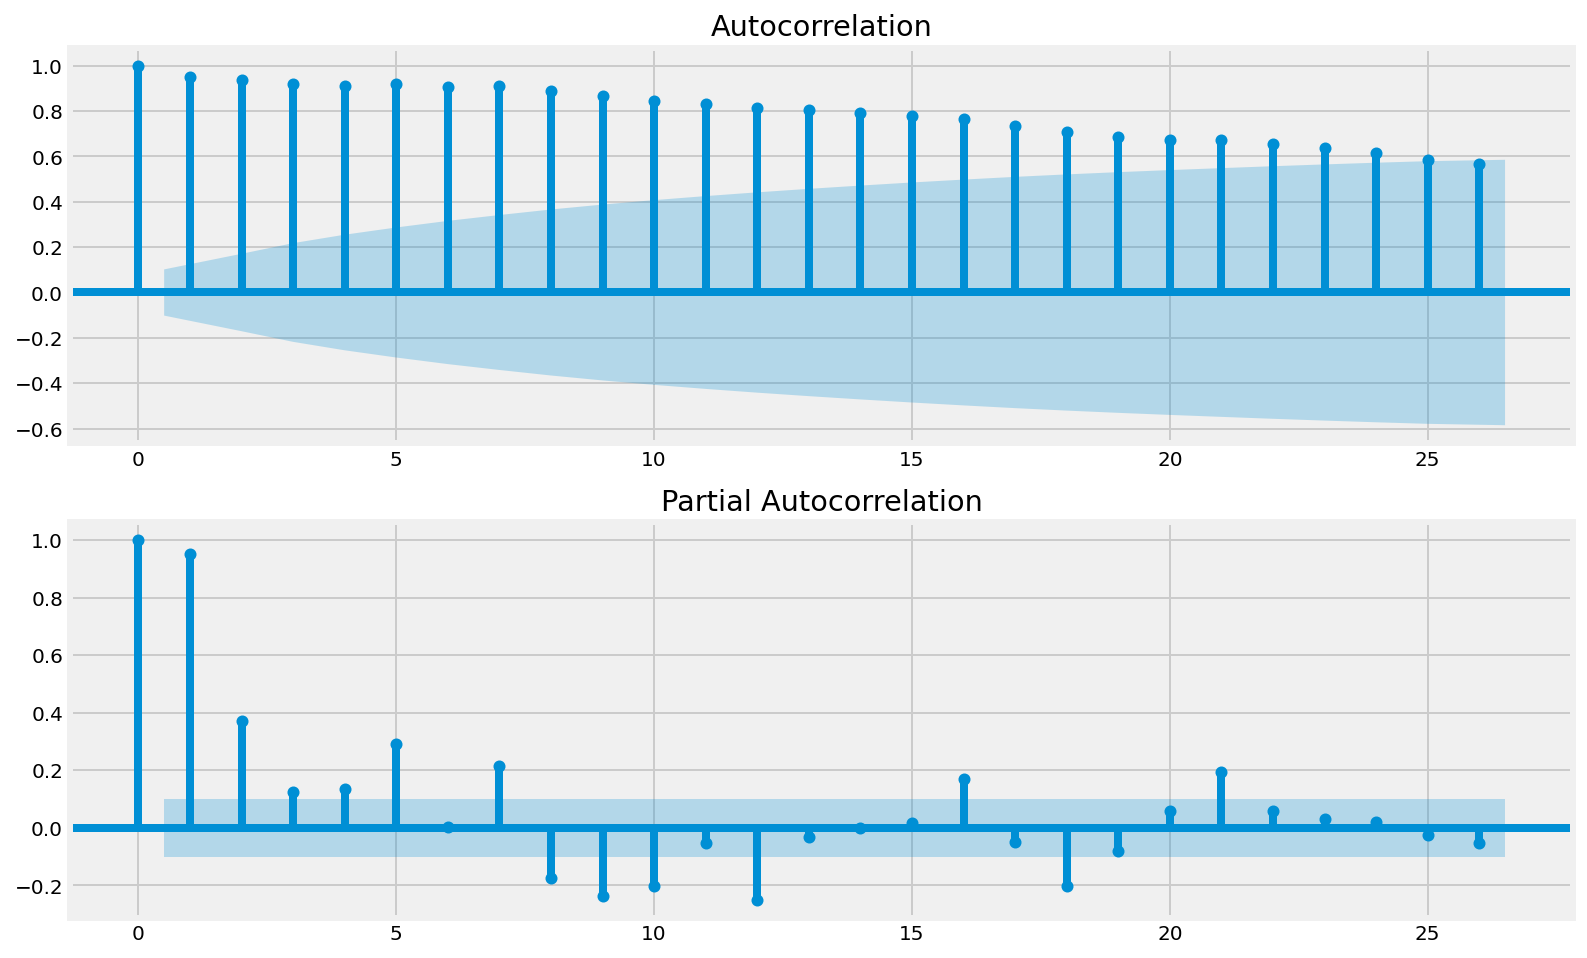

In [121]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_diff, ax=ax[0]); # 
plot_pacf(train_diff, ax=ax[1]);

# Evaluation of ARIMA Model

In [122]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Difference the Test Series

In [123]:
test_series = test_data['SUM']
test_diff = test_series.diff()
test_diff = test_diff.dropna(inplace = False)
test_diff

Date
2021-01-28    20385.0
2021-01-29    19768.0
2021-01-30    19660.0
2021-01-31    16319.0
2021-02-01    13040.0
               ...   
2021-09-27    17880.0
2021-09-28     5637.0
2021-09-29     6974.0
2021-09-30     9310.0
2021-10-01     8293.0
Name: SUM, Length: 247, dtype: float64

# Train and Forecast using ARIMA Model by filling in the necessary blocks

In [124]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [125]:
%%time 

history = [x for x in train_diff]

predictions = list()
for t in range(len(test_diff)):

    model = ARIMA(history, order=(5,1,0))  # initialize the model with history and right order of parameters
    model_fit = model.fit(disp=0)  # fit the model
   
    output = model_fit.forecast()  # use forecast on the fitted model
    yhat = output[0][0]
    predictions.append(yhat)

    obs = test_diff[t]
    history.append(obs)

    if t % 100 == 0:
      print('Test Series Point: {}\tPredicted={}, Expected={}'.format(t, yhat, obs))

Test Series Point: 0	Predicted=19497.520385188764, Expected=20385.0
Test Series Point: 100	Predicted=2099.302655519938, Expected=1870.0
Test Series Point: 200	Predicted=11516.84551872886, Expected=13221.0
CPU times: user 1min 2s, sys: 16 s, total: 1min 18s
Wall time: 49.7 s


# Reverse Transform the forecasted values

In [126]:
reverse_test_diff = np.r_[test_series.iloc[0], test_diff].cumsum()
reverse_predictions = np.r_[test_series.iloc[0], predictions].cumsum()
reverse_test_diff.shape, reverse_predictions.shape

((248,), (248,))

# Evaluate model performance

In [127]:
error = mean_squared_error(reverse_test_diff, reverse_predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(reverse_test_diff, reverse_predictions)
print('Symmetric Mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 1497668655.109
Symmetric Mean absolute percentage error: 0.947


In [128]:
reverse_test_diff_series = pd.Series(reverse_test_diff)
reverse_test_diff_series.index = test_series.index

reverse_predictions_series = pd.Series(reverse_predictions)
reverse_predictions_series.index = test_series.index

# Visualize the forecast results

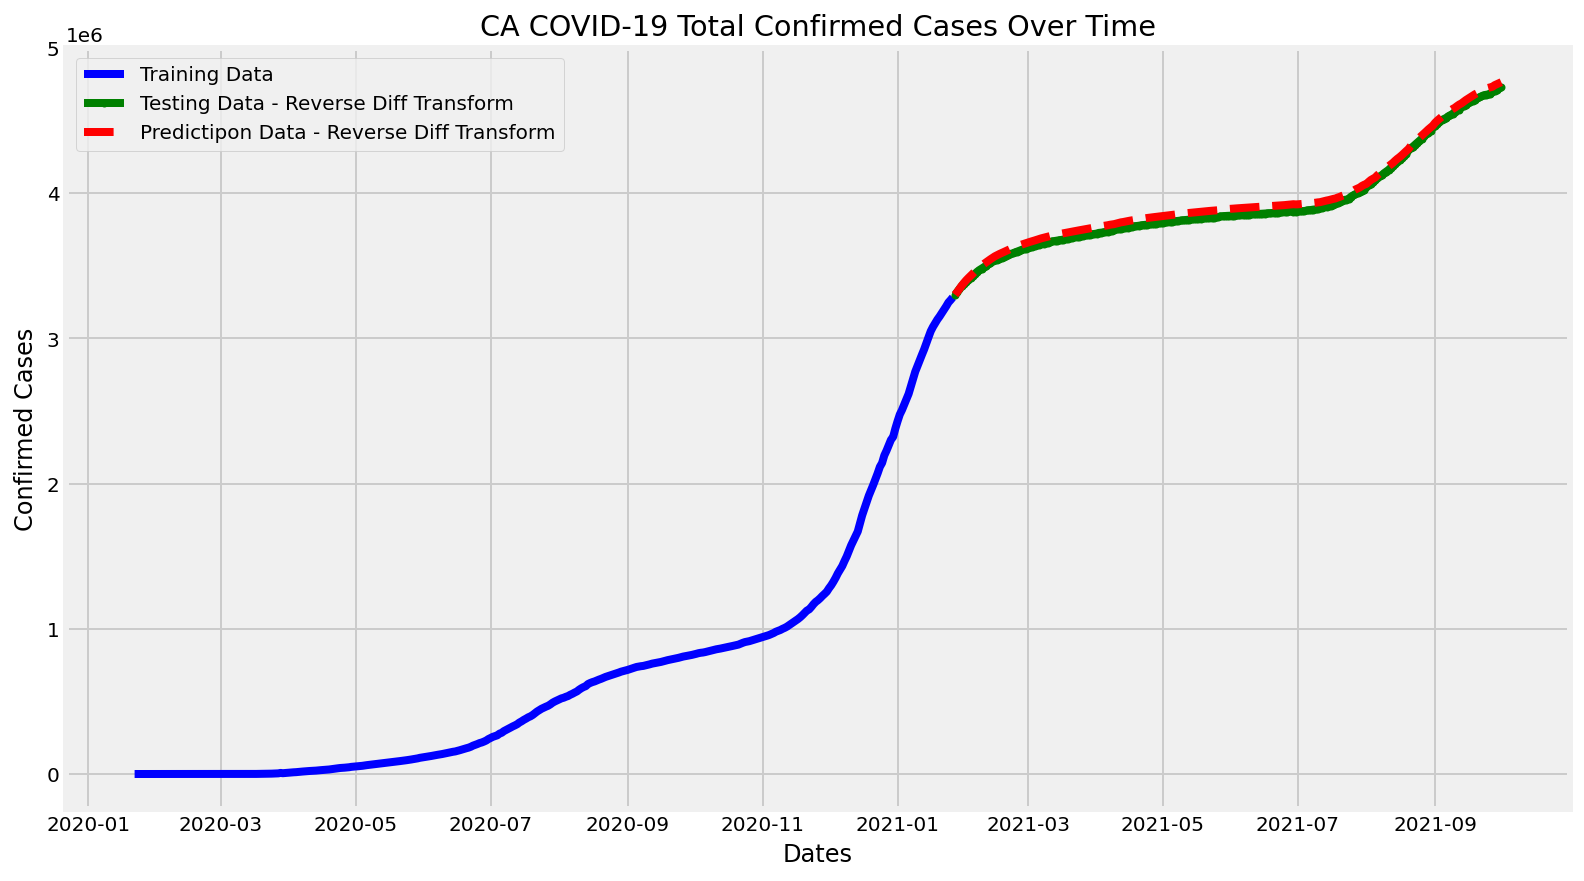

In [129]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Total Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(train_series, color='blue', label='Training Data')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Data - Reverse Diff Transform')
plt.plot(reverse_predictions_series, color='red', linestyle='--', label='Predictipon Data - Reverse Diff Transform')
plt.legend();

# Visualize only test and forecast prices

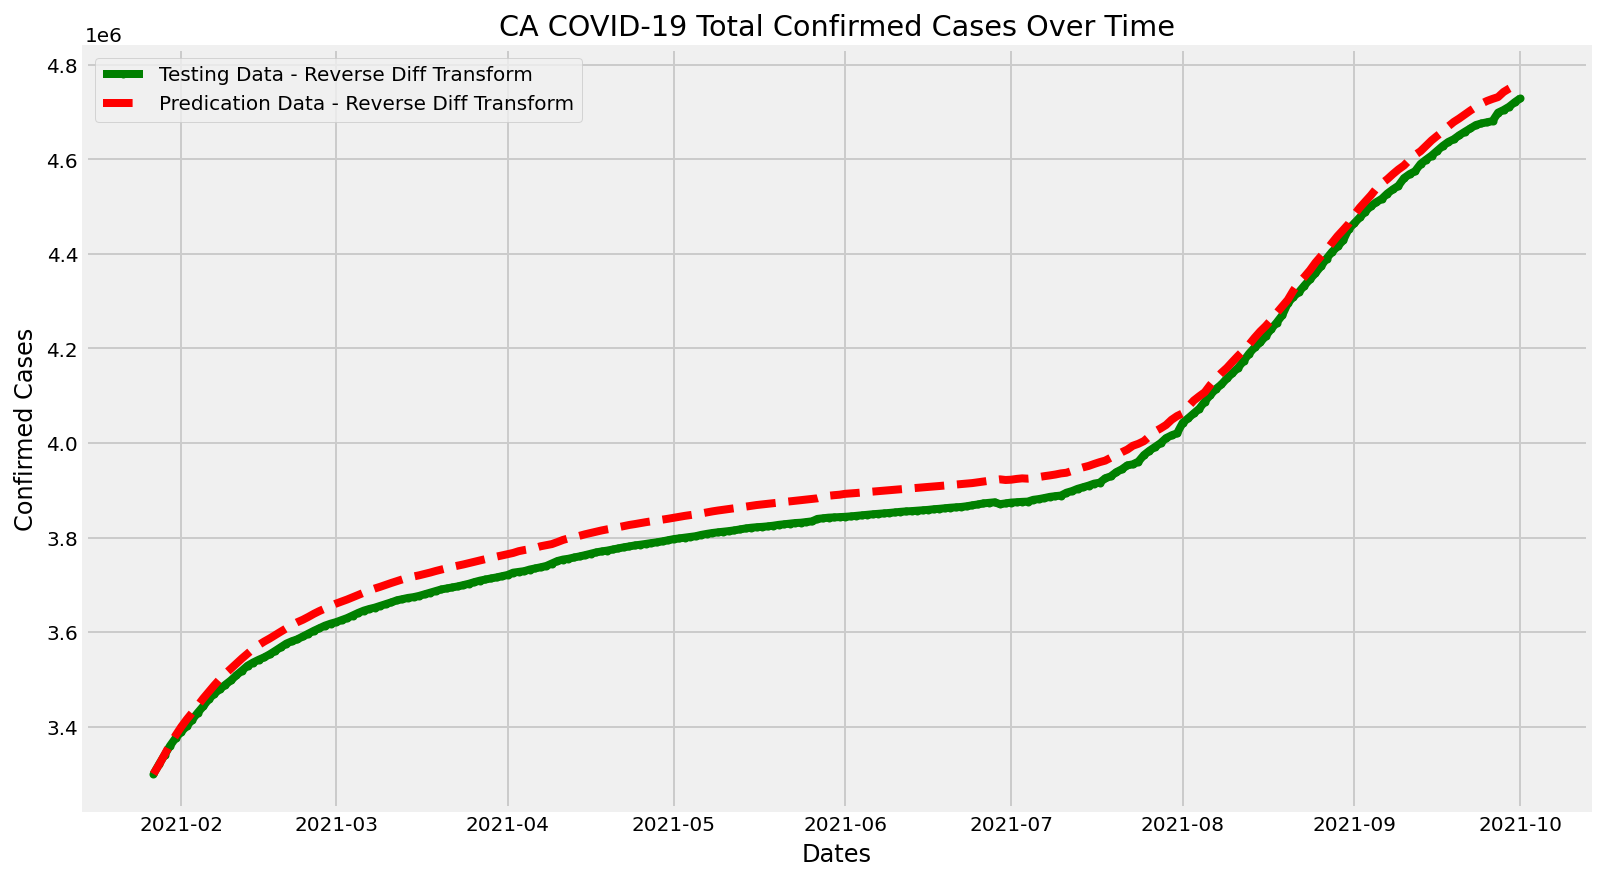

In [130]:
plt.figure(figsize=(12,7))
plt.title('CA COVID-19 Total Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Data - Reverse Diff Transform')
plt.plot(reverse_predictions_series, color='red', linestyle='--', label='Predication Data - Reverse Diff Transform')
plt.legend();

# Generate forecasts

In [131]:
# Future predictions using ARIMA 
ARIMA_df = pd.DataFrame({'Future Date': future_forcast_dates[-10:], 'ARIMA Predicted # of CA Total Confirmed Cases': np.round(reverse_predictions_series[-10:])})
ARIMA_df.style.background_gradient(cmap='Reds')

In [132]:
ARIMA_df.reset_index(drop=True)

Future Date  ARIMA Predicted # of CA Total Confirmed Cases
0  10/01/2021                                      4703384.0
1  10/02/2021                                      4711035.0
2  10/03/2021                                      4718075.0
3  10/04/2021                                      4723708.0
4  10/05/2021                                      4728085.0
5  10/06/2021                                      4731924.0
6  10/07/2021                                      4742704.0
7  10/08/2021                                      4749862.0
8  10/09/2021                                      4756256.0
9  10/10/2021                                      4763509.0

# (3) Daily Confirmed Cases Prediction- US

In [133]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_US_Transposed.csv')
confirmed_df = confirmed_df.dropna()
confirmed_df

Date  Autauga  Baldwin  Barbour  Bibb  Blount  Bullock  Butler  \
0    1/22/2020        0        0        0     0       0        0       0   
1    1/23/2020        0        0        0     0       0        0       0   
2    1/24/2020        0        0        0     0       0        0       0   
3    1/25/2020        0        0        0     0       0        0       0   
4    1/26/2020        0        0        0     0       0        0       0   
..         ...      ...      ...      ...   ...     ...      ...     ...   
614  9/27/2021     9691    36278     3474  4102    9735     1495    3184   
615  9/28/2021     9703    36352     3481  4112    9774     1498    3188   
616  9/29/2021     9715    36409     3483  4126    9797     1502    3196   
617  9/30/2021     9744    36447     3490  4131    9818     1503    3203   
618  10/1/2021     9761    36491     3495  4146    9842     1507    3208   

     Calhoun  Chambers  ...  Sheridan.4  Sublette  Sweetwater  Teton.2  Uinta  \
0          0         0  ...           0         0           0        0      0   
1          0         0  ...           0         0           0        0      0   
2          0         0  ...           0         0           0        0      0   
3          0         0  ...           0         0           0        0      0   
4          0         0  ...           0         0           0        0      0   
..       ...       ...  ...         ...       ...         ...      ...    ...   
614    21297      5425  ...        4535      1148        6831     4899   3473   
615    21409      5444  ...        4568      1166        6841     4915   3484   
616    21515      5455  ...        4595      1180        6881     4926   3496   
617    21573      5467  ...        4621      1188        6907     4941   3520   
618    21599      5479  ...        4661      1205        6959     4943   3550   

     Unassigned.51  Washakie  Weston       SUM   Daily  
0                0         0       0         1       0  
1                0         0       0         1       0  
2                0         0       0         2       1  
3                0         0       0         2       0  
4                0         0       0         5       3  
..             ...       ...     ...       ...     ...  
614              0      1283     891  43116877  185016  
615              0      1310     894  43226482  109605  
616              0      1335     900  43349749  123267  
617              0      1368     904  43460343  110594  
618              0      1398     910  43618627  158284  

[619 rows x 3345 columns]

In [134]:
confirmed_df.index = pd.to_datetime(confirmed_df['Date'])
confirmed_df.tail()

Date  Autauga  Baldwin  Barbour  Bibb  Blount  Bullock  \
Date                                                                      
2021-09-27  9/27/2021     9691    36278     3474  4102    9735     1495   
2021-09-28  9/28/2021     9703    36352     3481  4112    9774     1498   
2021-09-29  9/29/2021     9715    36409     3483  4126    9797     1502   
2021-09-30  9/30/2021     9744    36447     3490  4131    9818     1503   
2021-10-01  10/1/2021     9761    36491     3495  4146    9842     1507   

            Butler  Calhoun  Chambers  ...  Sheridan.4  Sublette  Sweetwater  \
Date                                   ...                                     
2021-09-27    3184    21297      5425  ...        4535      1148        6831   
2021-09-28    3188    21409      5444  ...        4568      1166        6841   
2021-09-29    3196    21515      5455  ...        4595      1180        6881   
2021-09-30    3203    21573      5467  ...        4621      1188        6907   
2021-10-01    3208    21599      5479  ...        4661      1205        6959   

            Teton.2  Uinta  Unassigned.51  Washakie  Weston       SUM   Daily  
Date                                                                           
2021-09-27     4899   3473              0      1283     891  43116877  185016  
2021-09-28     4915   3484              0      1310     894  43226482  109605  
2021-09-29     4926   3496              0      1335     900  43349749  123267  
2021-09-30     4941   3520              0      1368     904  43460343  110594  
2021-10-01     4943   3550              0      1398     910  43618627  158284  

[5 rows x 3345 columns]

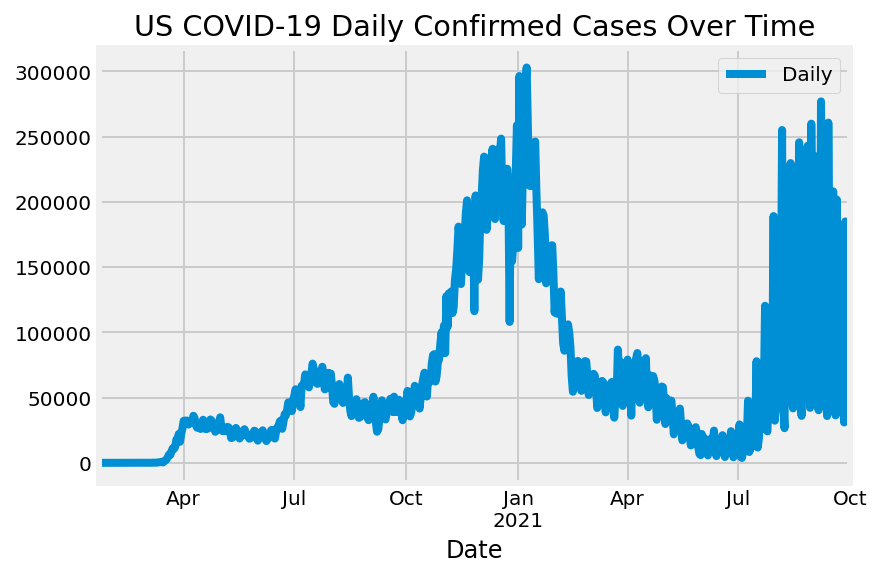

In [135]:
dr = confirmed_df[['Daily']]
dr.plot()
plt.title('US COVID-19 Daily Confirmed Cases Over Time');

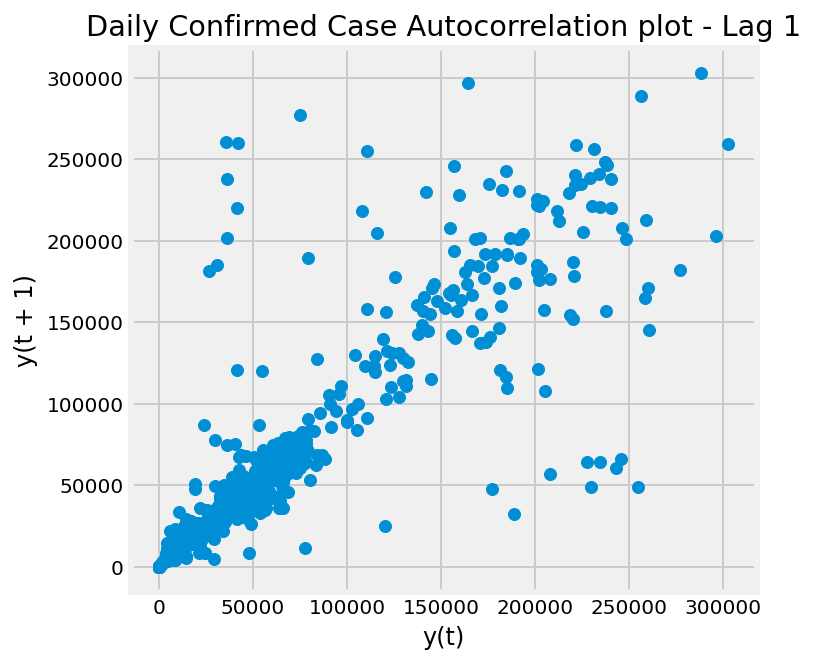

In [136]:
from pandas.plotting import lag_plot

plt.figure(figsize=(5,5))
lag_plot(confirmed_df['Daily'], lag=1)
plt.title('Daily Confirmed Case Autocorrelation plot - Lag 1');


# Build Train-Test Datasets

In [137]:
train_data, test_data = confirmed_df.iloc[0:int(len(confirmed_df)*0.6), :], confirmed_df.iloc[int(len(confirmed_df)*0.6):, :]

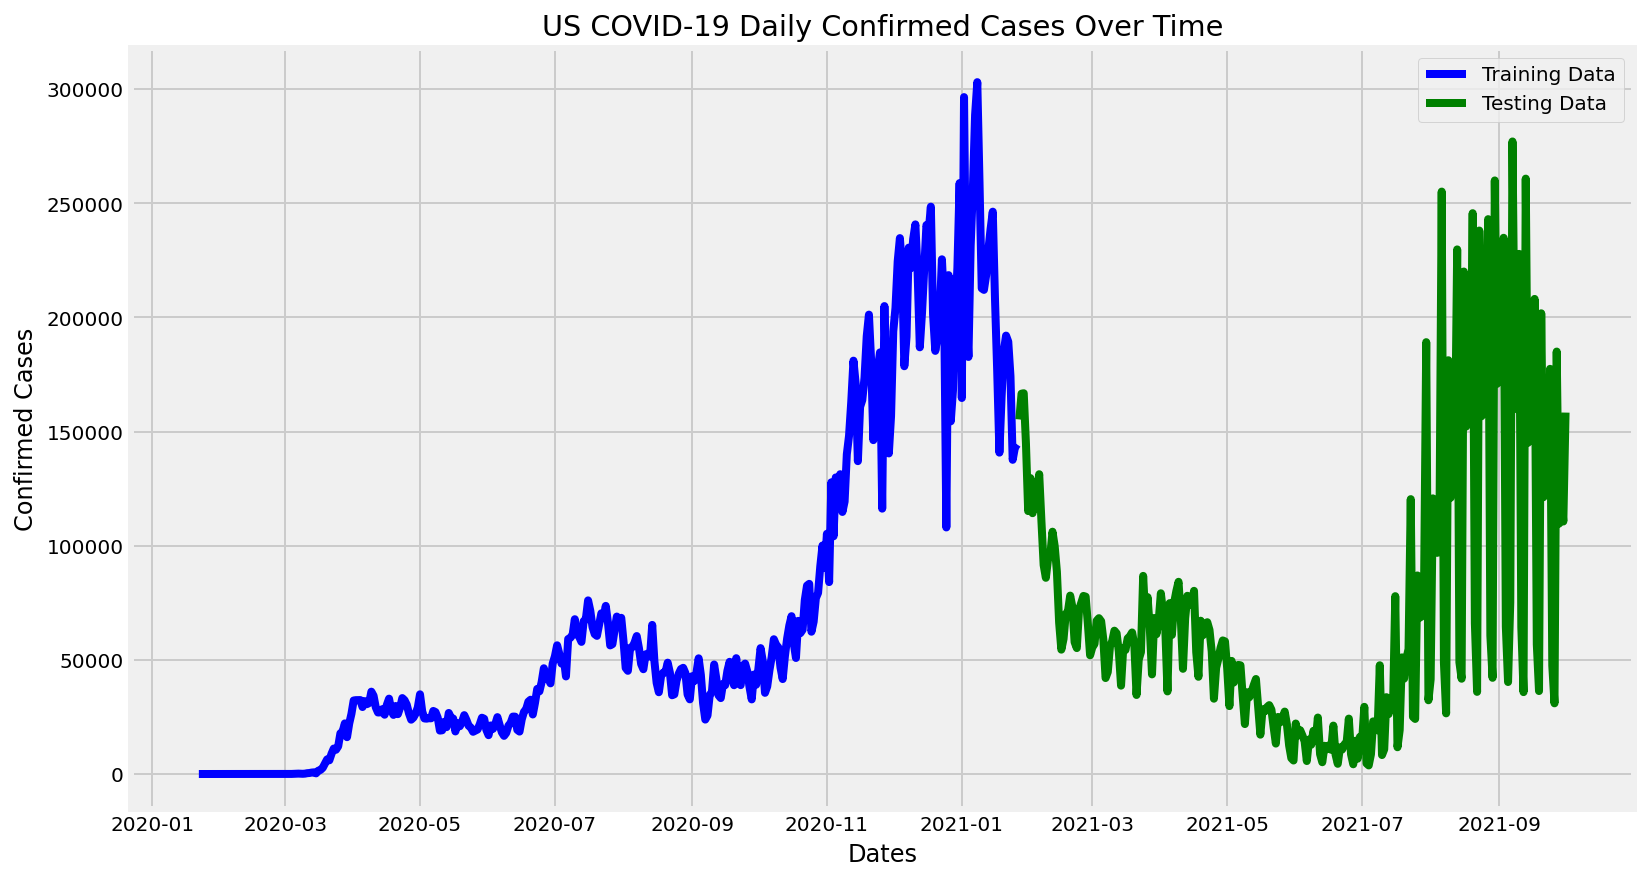

In [138]:
plt.figure(figsize=(12,7))
plt.title('US COVID-19 Daily Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(train_data['Daily'], 'blue', label='Training Data')
plt.plot(test_data['Daily'], 'green', label='Testing Data')
plt.legend();

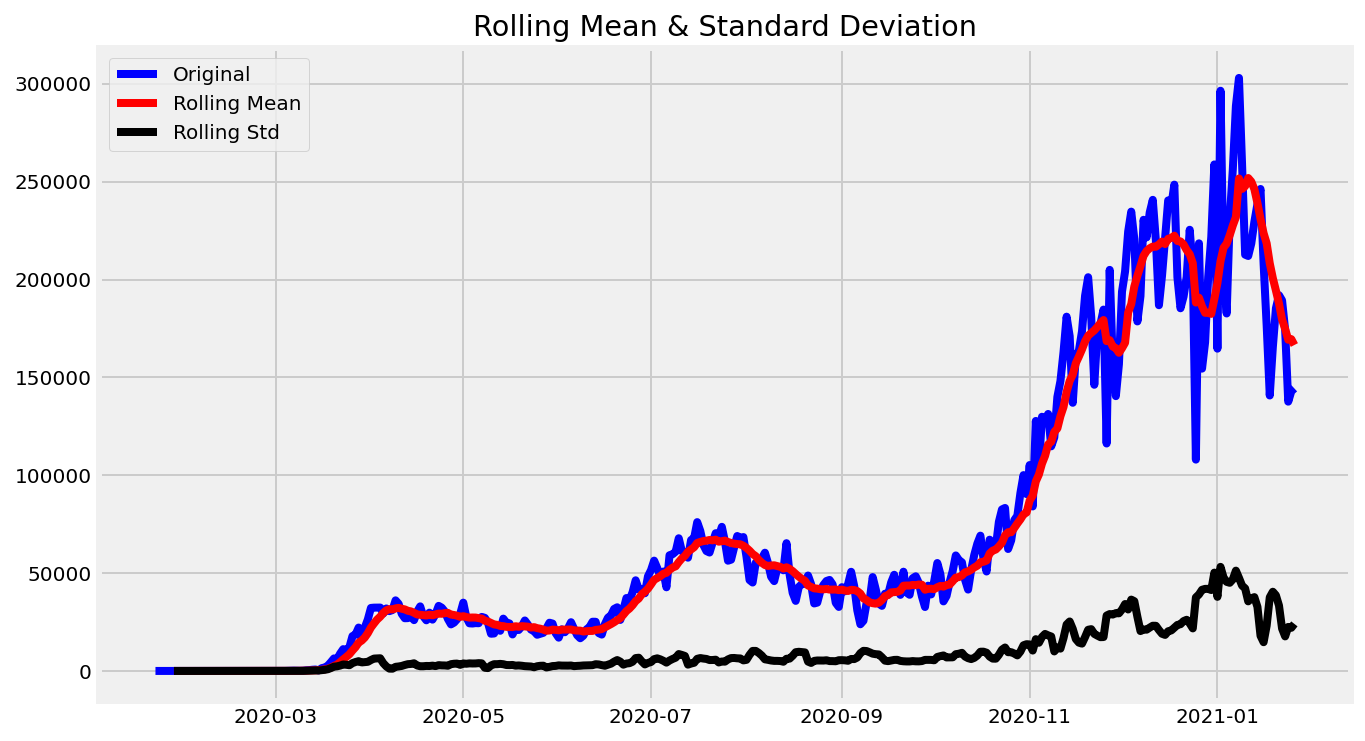

In [139]:
window = 7
train_series = train_data['Daily']

#Determing rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

In [140]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(train_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -0.319575
p-value                          0.922686
#Lags Used                      14.000000
Number of Observations Used    356.000000
Critical Value (1%)             -3.448853
Critical Value (5%)             -2.869693
Critical Value (10%)            -2.571114
dtype: float64

# Apply a first order differencing on the training data

In [141]:
train_diff = train_series.diff()
train_diff = train_diff.dropna(inplace = False)

In [142]:
train_diff

Date
2020-01-23        0.0
2020-01-24        1.0
2020-01-25       -1.0
2020-01-26        3.0
2020-01-27       -3.0
               ...   
2021-01-22    -2648.0
2021-01-23   -15122.0
2021-01-24   -36637.0
2021-01-25     5308.0
2021-01-26     1450.0
Name: Daily, Length: 370, dtype: float64

# Visualize Rolling statistics for differenced train data

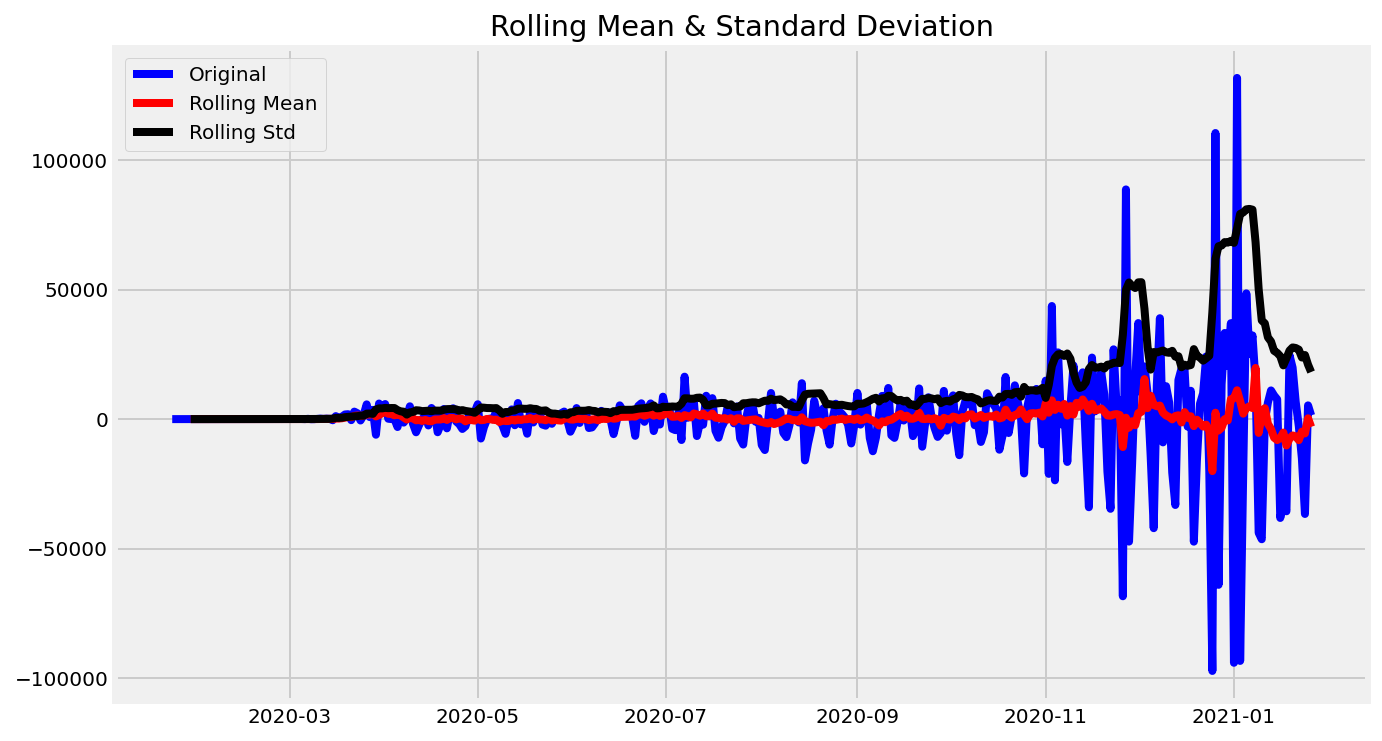

In [143]:
#Determing rolling statistics
rolmean = train_diff.rolling(window).mean()
rolstd = train_diff.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_diff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

# Compute AD-Fuller Stats for differenced train data

In [144]:
dftest = adfuller(train_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                -6.283490e+00
p-value                        3.746704e-08
#Lags Used                     1.300000e+01
Number of Observations Used    3.560000e+02
Critical Value (1%)           -3.448853e+00
Critical Value (5%)           -2.869693e+00
Critical Value (10%)          -2.571114e+00
dtype: float64

# Plot ACF and PACF on the original train series

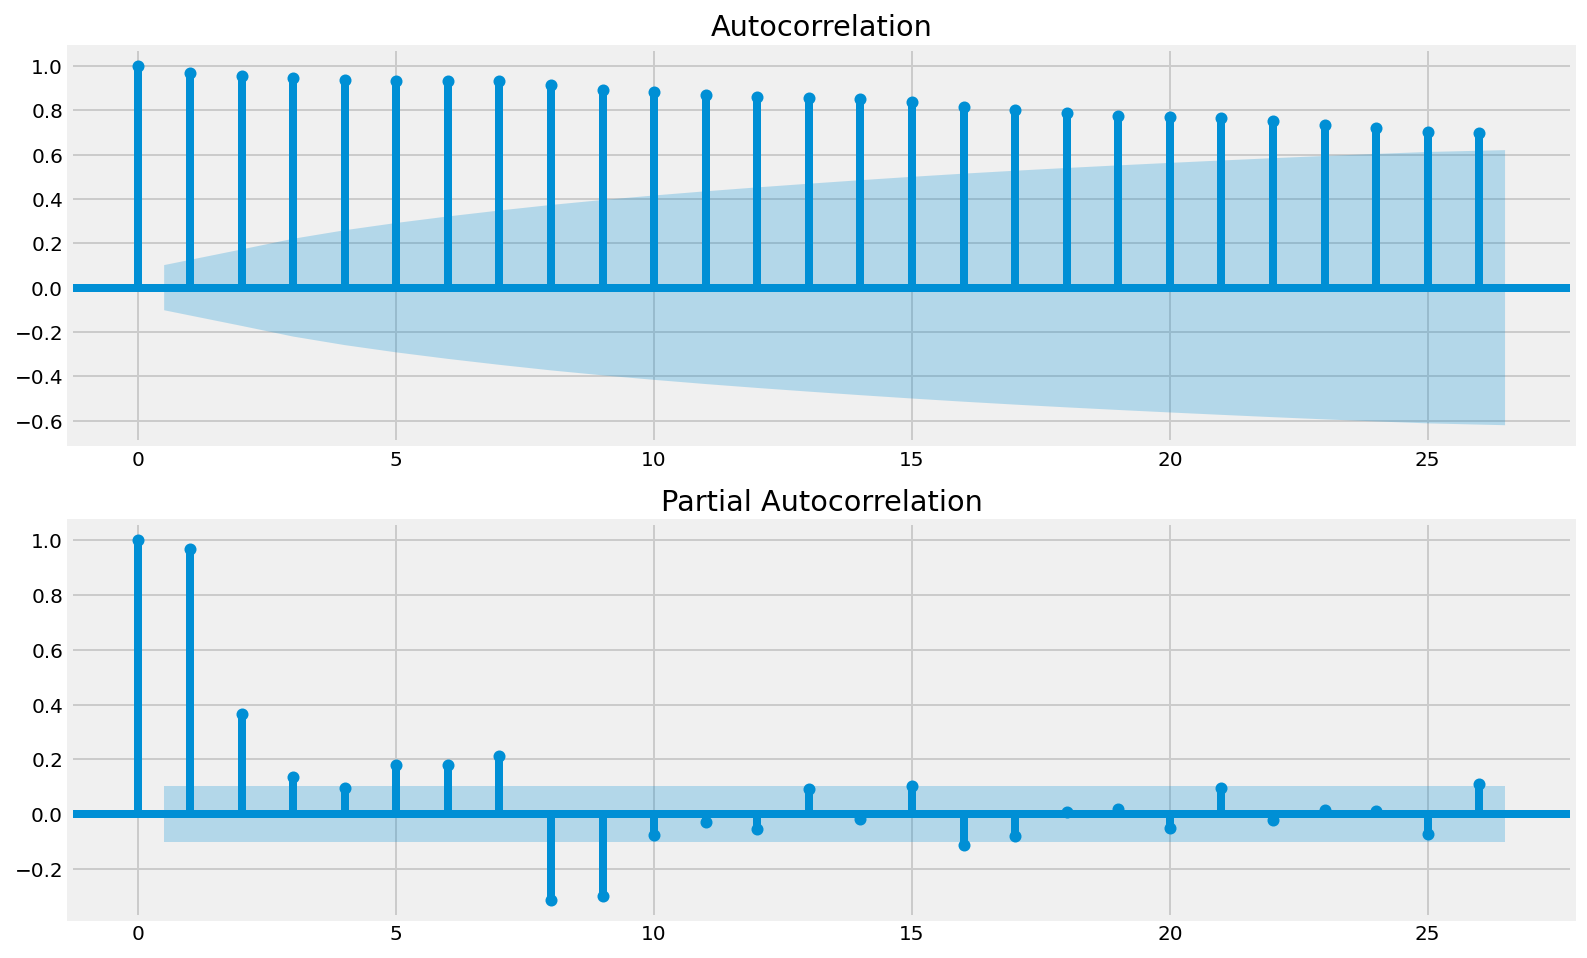

In [145]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_series, ax=ax[0]); # 
plot_pacf(train_series, ax=ax[1]);

# Plot ACF and PACF on the differenced train series

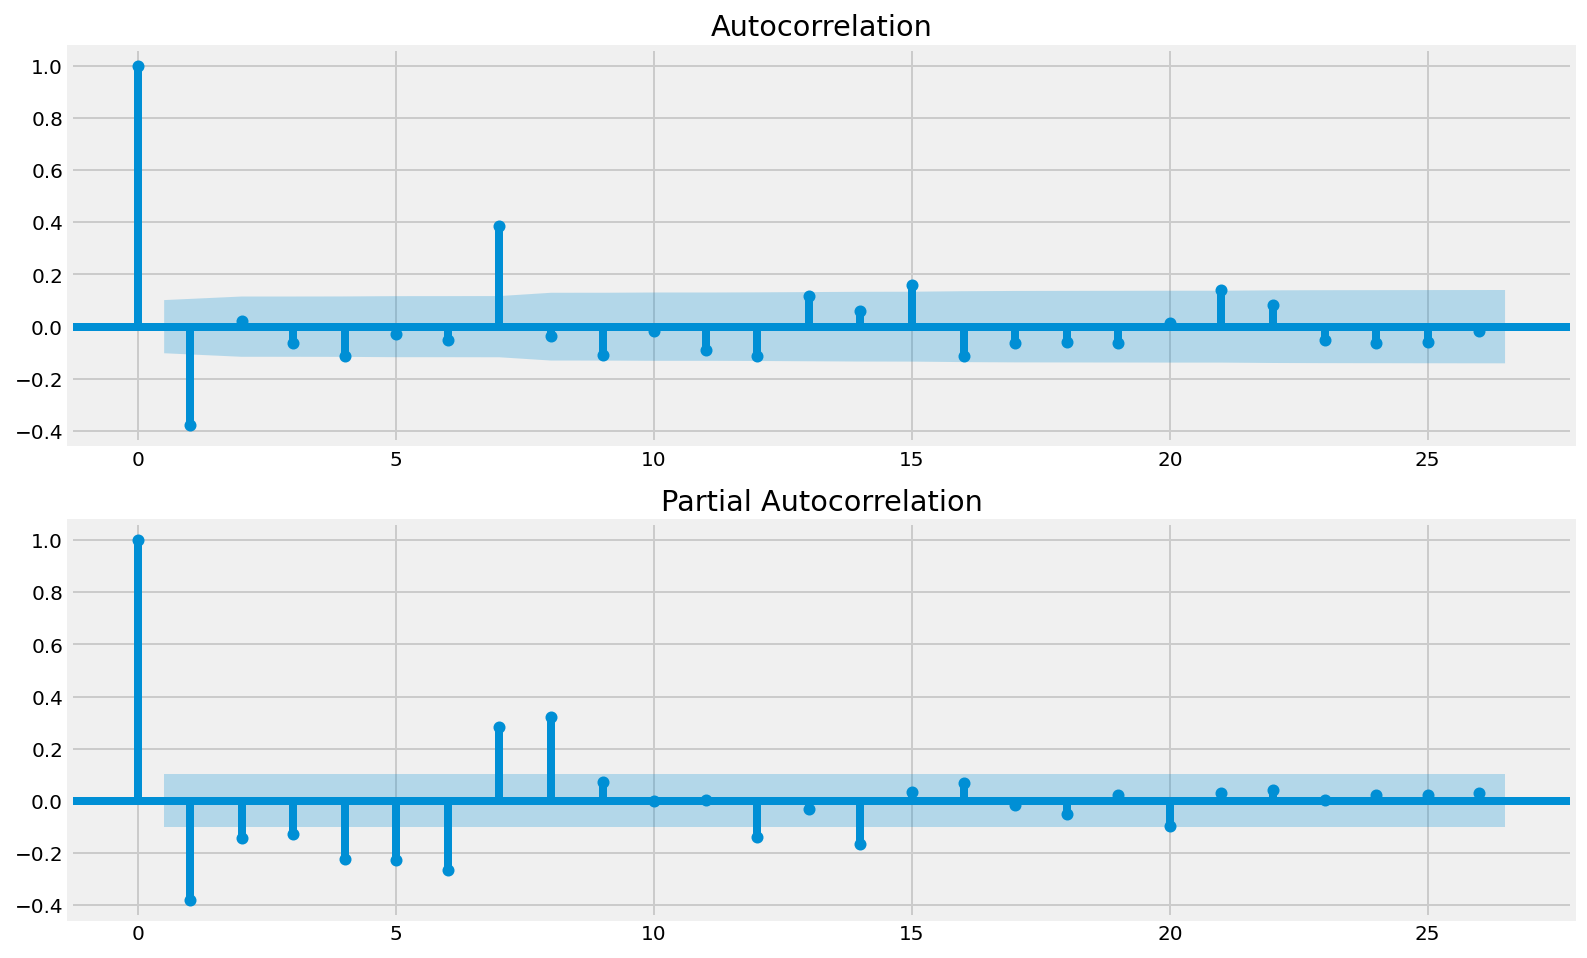

In [146]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_diff, ax=ax[0]); # 
plot_pacf(train_diff, ax=ax[1]);

# Evaluation of ARIMA Model

In [147]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Difference the Test Series

In [148]:
test_series = test_data['Daily']
test_diff = test_series.diff()
test_diff = test_diff.dropna(inplace = False)
test_diff

Date
2021-01-28     11279.0
2021-01-29       188.0
2021-01-30    -22049.0
2021-01-31    -29559.0
2021-02-01     14452.0
                ...   
2021-09-27    154058.0
2021-09-28    -75411.0
2021-09-29     13662.0
2021-09-30    -12673.0
2021-10-01     47690.0
Name: Daily, Length: 247, dtype: float64

# Train and Forecast using ARIMA Model by filling in the necessary blocks

In [149]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [150]:
%%time 

history = [x for x in train_diff]

predictions = list()
for t in range(len(test_diff)):

    model = ARIMA(history, order=(1,1,0))  # initialize the model with history and right order of parameters
    model_fit = model.fit(disp=0)  # fit the model
   
    output = model_fit.forecast()  # use forecast on the fitted model
    yhat = output[0][0]
    predictions.append(yhat)

    obs = test_diff[t]
    history.append(obs)

    if t % 100 == 0:
      print('Test Series Point: {}\tPredicted={}, Expected={}'.format(t, yhat, obs))

Test Series Point: 0	Predicted=3937.635512422442, Expected=11279.0
Test Series Point: 100	Predicted=1553.7362532841112, Expected=-13371.0
Test Series Point: 200	Predicted=-113403.76395166149, Expected=178338.0
CPU times: user 5.78 s, sys: 0 ns, total: 5.78 s
Wall time: 5.77 s


# Reverse Transform the forecasted values

In [151]:
reverse_test_diff = np.r_[test_series.iloc[0], test_diff].cumsum()
reverse_predictions = np.r_[test_series.iloc[0], predictions].cumsum()
reverse_test_diff.shape, reverse_predictions.shape

((248,), (248,))

# Evaluate model performance

In [152]:
error = mean_squared_error(reverse_test_diff, reverse_predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(reverse_test_diff, reverse_predictions)
print('Symmetric Mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 3488857077.107
Symmetric Mean absolute percentage error: 38.470


In [153]:
reverse_test_diff_series = pd.Series(reverse_test_diff)
reverse_test_diff_series.index = test_series.index

reverse_predictions_series = pd.Series(reverse_predictions)
reverse_predictions_series.index = test_series.index

# Visualize the forecast results

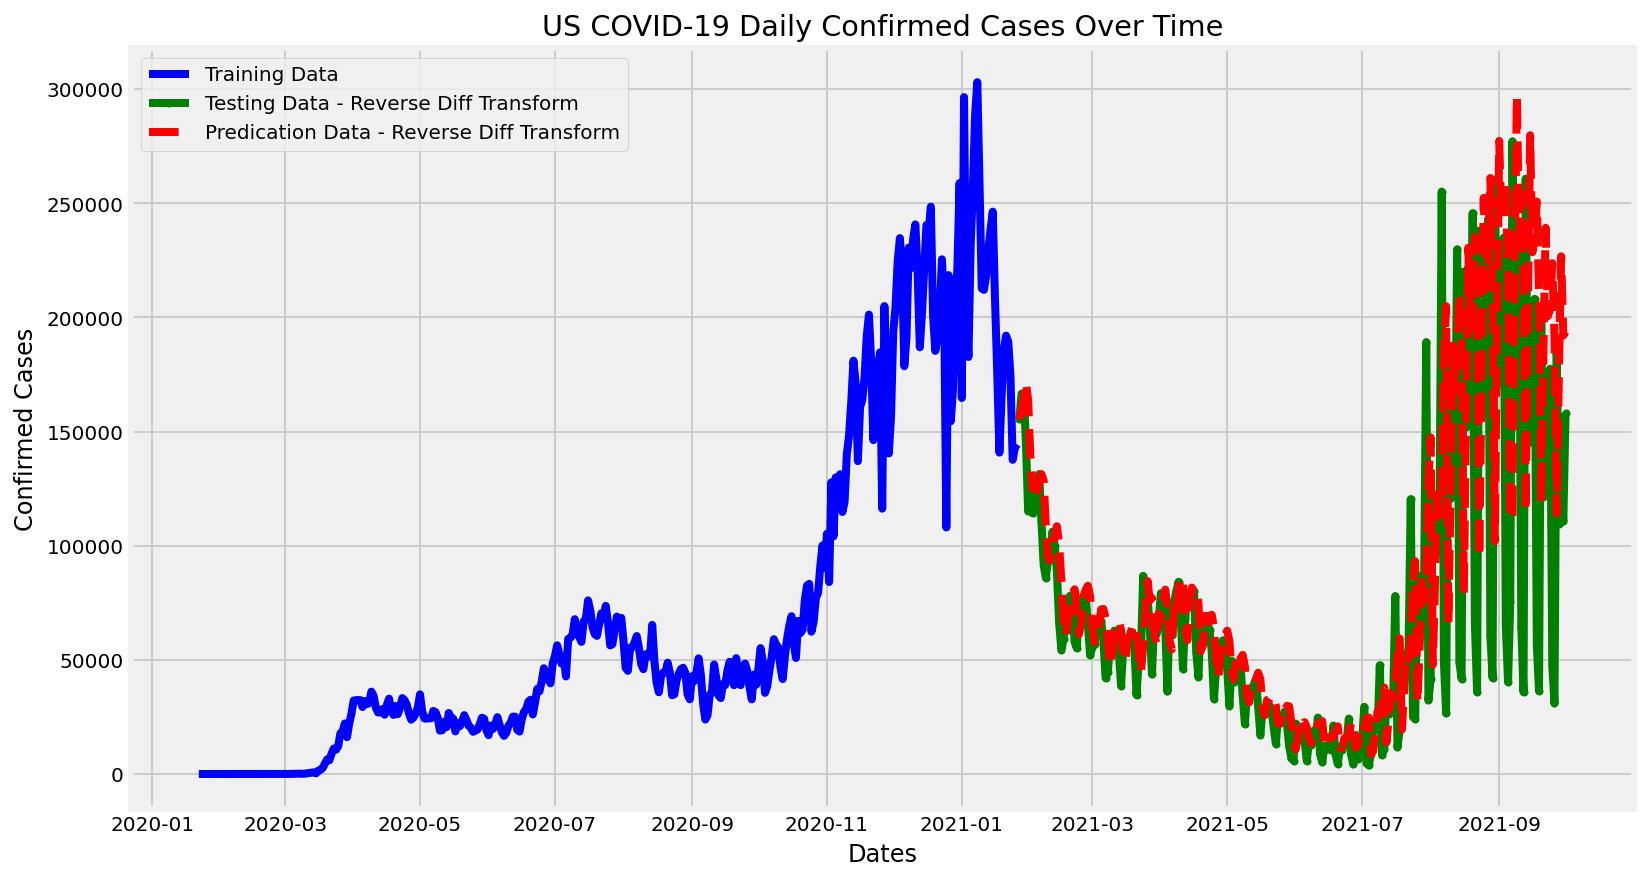

In [154]:
plt.figure(figsize=(12,7))
plt.title('US COVID-19 Daily Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(train_series, color='blue', label='Training Data')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Data - Reverse Diff Transform')
plt.plot(reverse_predictions_series, color='red', linestyle='--', label='Predication Data - Reverse Diff Transform')
plt.legend();

# Visualize only test and prediction results

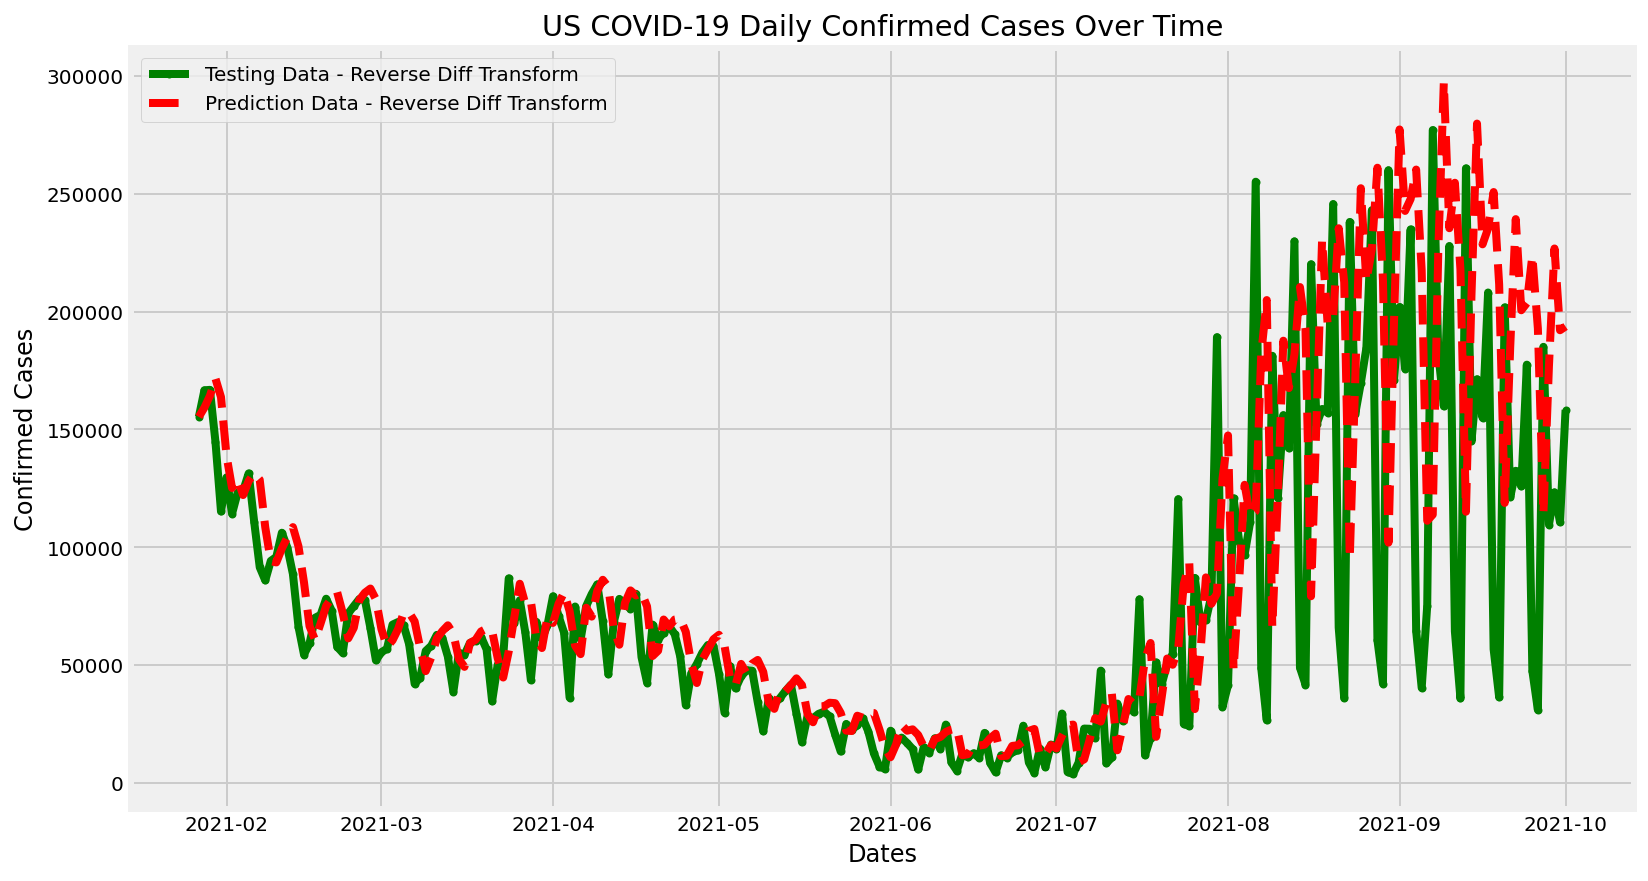

In [155]:
plt.figure(figsize=(12,7))
plt.title('US COVID-19 Daily Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Data - Reverse Diff Transform')
plt.plot(reverse_predictions_series, color='red', linestyle='--', label='Prediction Data - Reverse Diff Transform')
plt.legend();

# Generate forecasts

In [156]:
# Future predictions using ARIMA 
ARIMA_df = pd.DataFrame({'Future Date': future_forcast_dates[-10:], 'ARIMA Predicted # of US Daily Confirmed Cases': np.round(reverse_predictions_series[-10:])})
ARIMA_df.style.background_gradient(cmap='Reds')

In [157]:
ARIMA_df.reset_index(drop=True)

Future Date  ARIMA Predicted # of US Daily Confirmed Cases
0  10/01/2021                                       239219.0
1  10/02/2021                                       200534.0
2  10/03/2021                                       203577.0
3  10/04/2021                                       223718.0
4  10/05/2021                                       192753.0
5  10/06/2021                                       114016.0
6  10/07/2021                                       176921.0
7  10/08/2021                                       226753.0
8  10/09/2021                                       192072.0
9  10/10/2021                                       193648.0

# (4) Total Confirmed Cases Prediction- US

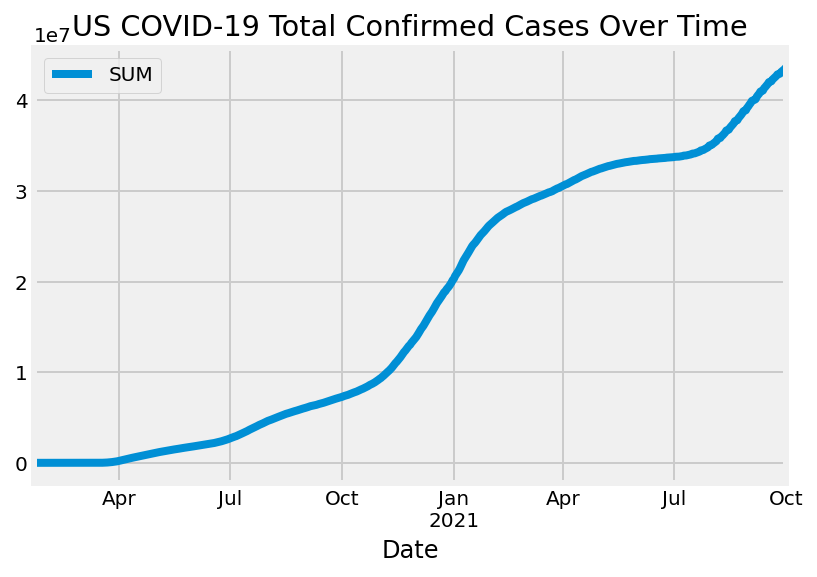

In [158]:
dr = confirmed_df[['SUM']]
dr.plot()
plt.title('US COVID-19 Total Confirmed Cases Over Time');

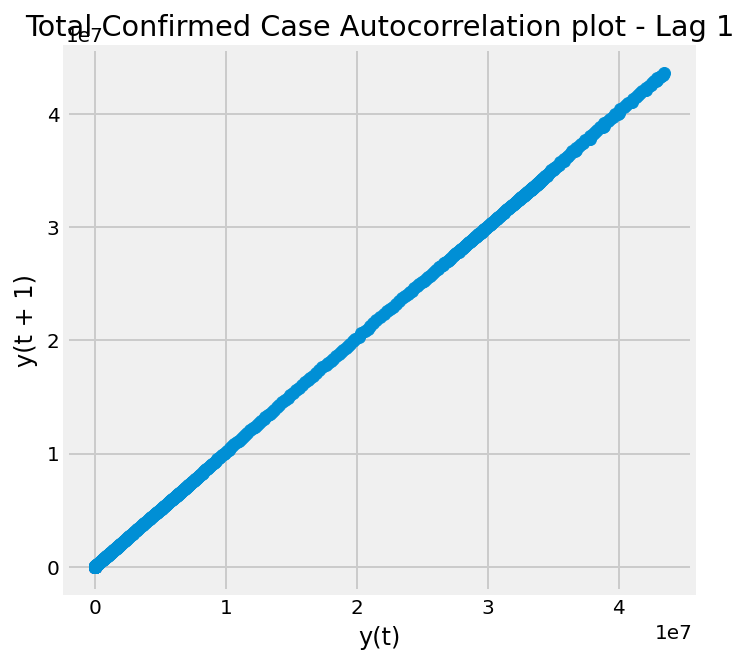

In [159]:
from pandas.plotting import lag_plot

plt.figure(figsize=(5,5))
lag_plot(confirmed_df['SUM'], lag=1)
plt.title('Total Confirmed Case Autocorrelation plot - Lag 1');


# Build Train-Test Datasets

In [160]:
train_data, test_data = confirmed_df.iloc[0:int(len(confirmed_df)*0.6), :], confirmed_df.iloc[int(len(confirmed_df)*0.6):, :]

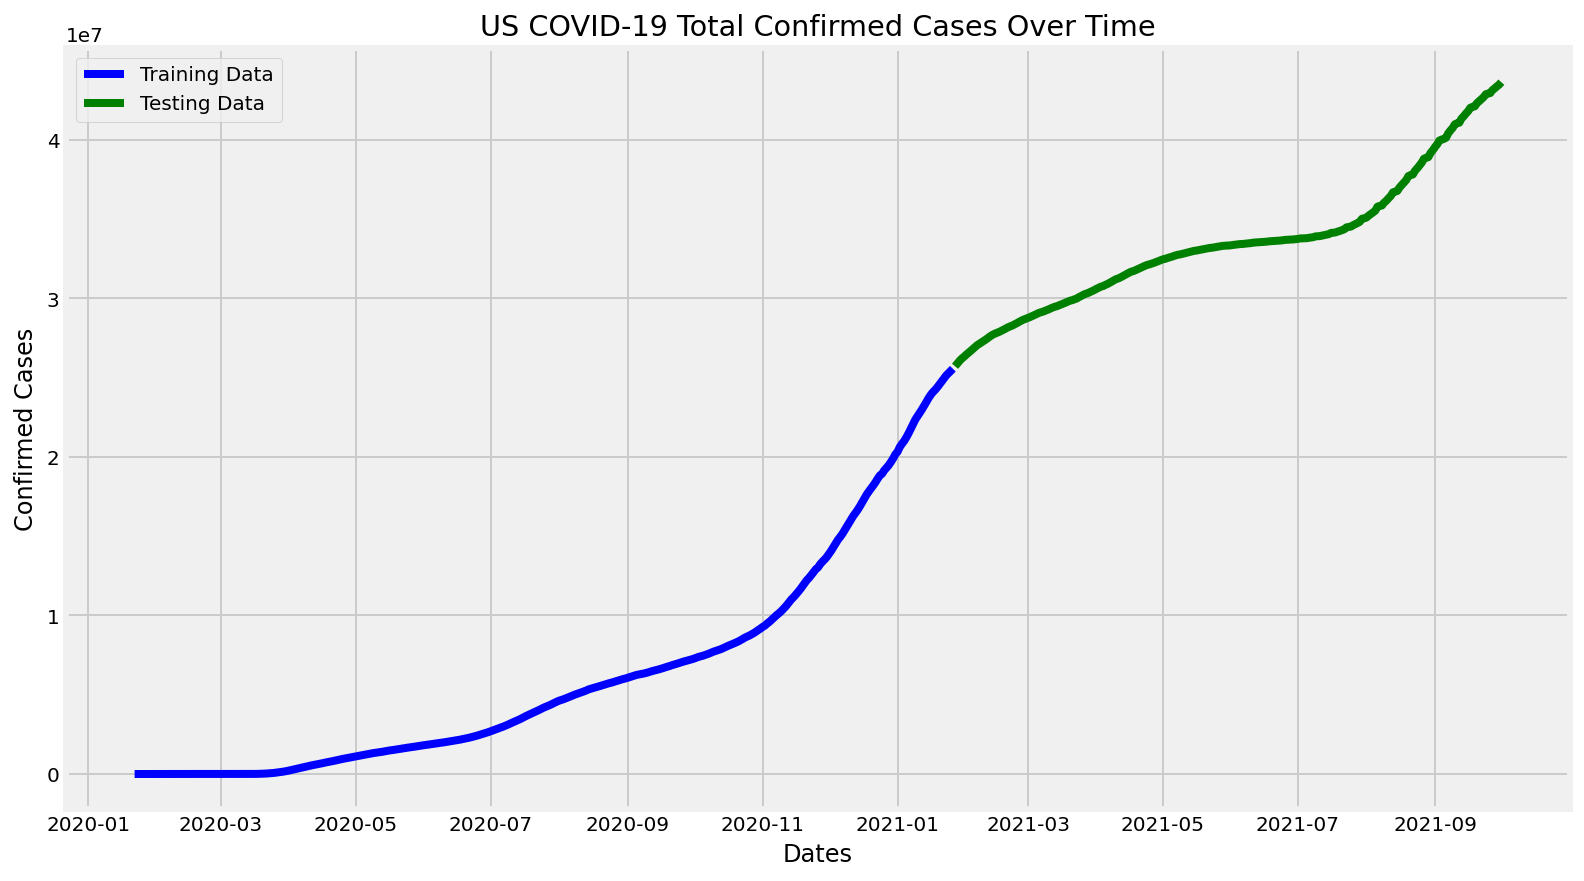

In [161]:
plt.figure(figsize=(12,7))
plt.title('US COVID-19 Total Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(train_data['SUM'], 'blue', label='Training Data')
plt.plot(test_data['SUM'], 'green', label='Testing Data')
plt.legend();

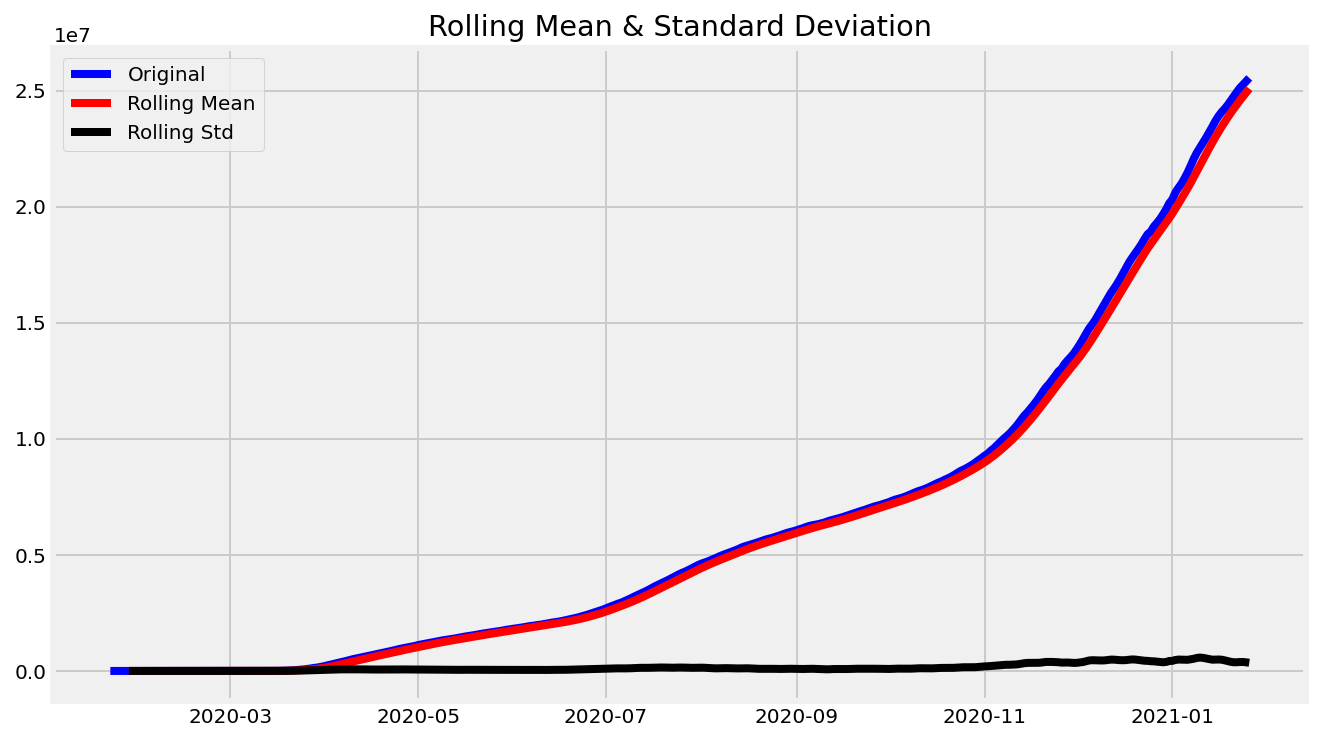

In [162]:
window = 7
train_series = train_data['SUM']

#Determing rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_series, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

In [163]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(train_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                   0.184074
p-value                          0.971354
#Lags Used                      15.000000
Number of Observations Used    355.000000
Critical Value (1%)             -3.448906
Critical Value (5%)             -2.869716
Critical Value (10%)            -2.571126
dtype: float64

# Apply a first order differencing on the training data

In [164]:
train_diff = train_series.diff()
train_diff = train_diff.dropna(inplace = False)

In [165]:
train_diff

Date
2020-01-23         0.0
2020-01-24         1.0
2020-01-25         0.0
2020-01-26         3.0
2020-01-27         0.0
                ...   
2021-01-22    189353.0
2021-01-23    174231.0
2021-01-24    137594.0
2021-01-25    142902.0
2021-01-26    144352.0
Name: SUM, Length: 370, dtype: float64

# Visualize Rolling statistics for differenced train data

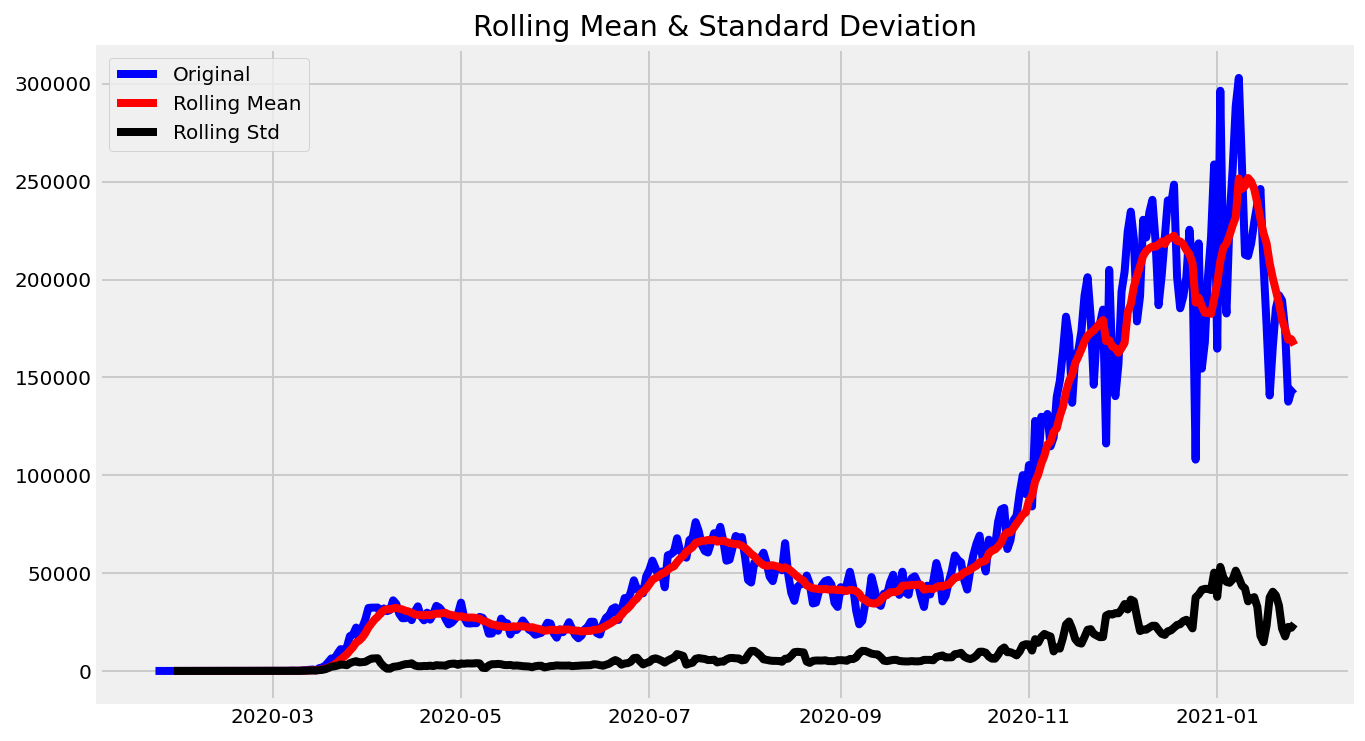

In [166]:
#Determing rolling statistics
rolmean = train_diff.rolling(window).mean()
rolstd = train_diff.rolling(window).std()

#Plot rolling statistics:
fig = plt.figure(figsize=(10, 6))
orig = plt.plot(train_diff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

# Compute AD-Fuller Stats for differenced train data

In [167]:
dftest = adfuller(train_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -0.323876
p-value                          0.922054
#Lags Used                      14.000000
Number of Observations Used    355.000000
Critical Value (1%)             -3.448906
Critical Value (5%)             -2.869716
Critical Value (10%)            -2.571126
dtype: float64

# Plot ACF and PACF on the original train series

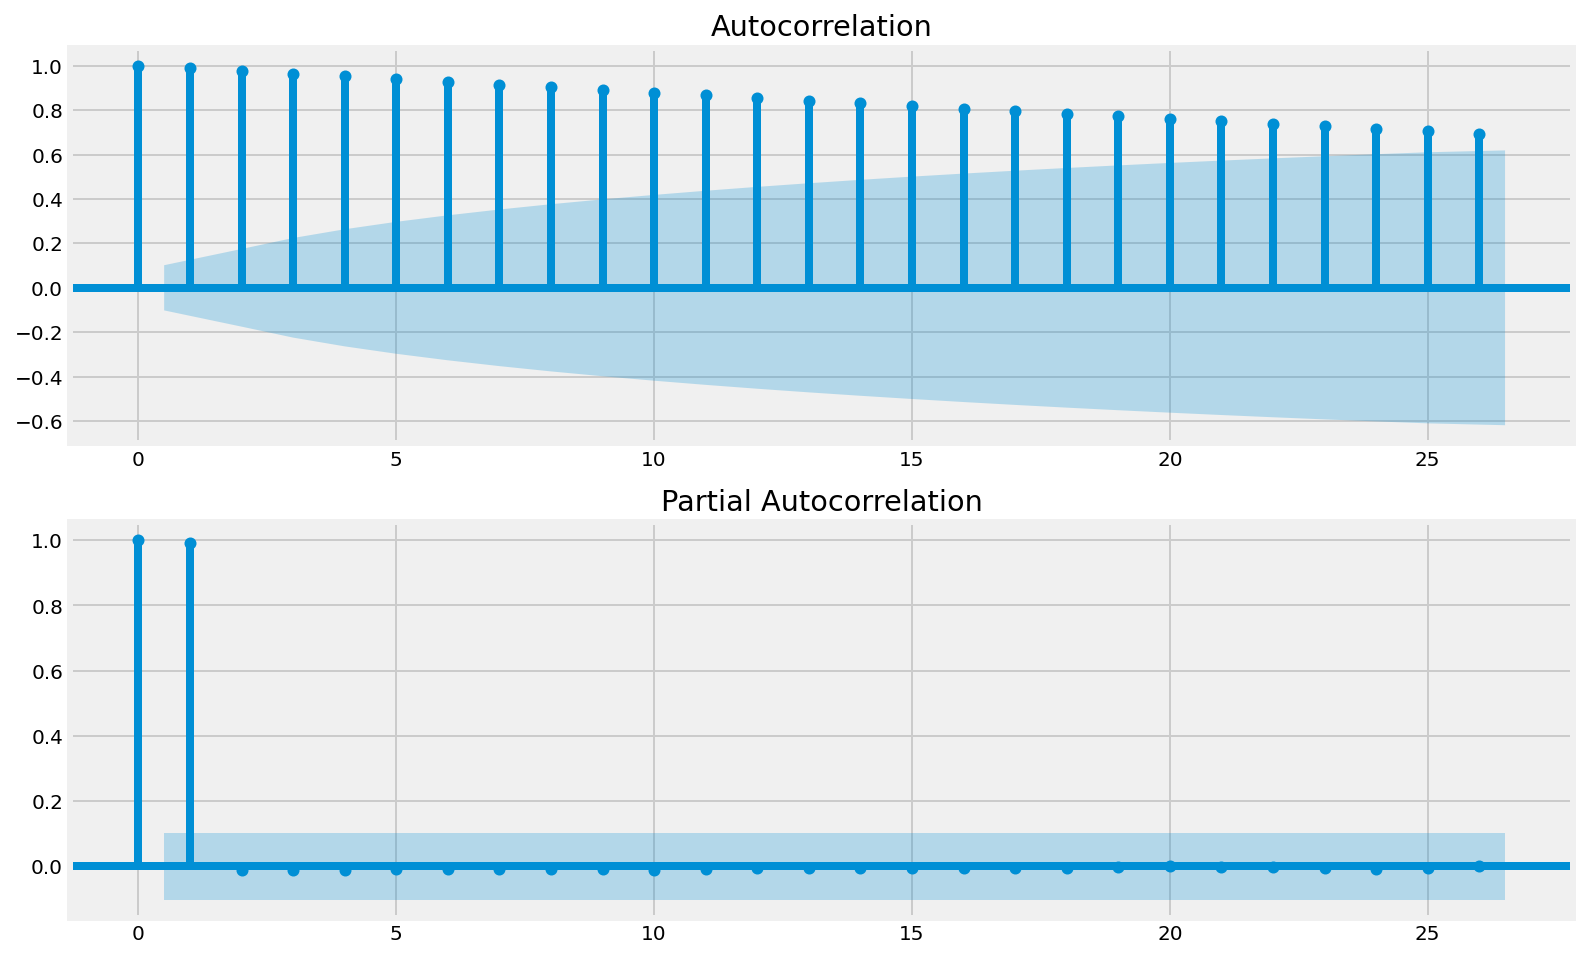

In [168]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_series, ax=ax[0]); # 
plot_pacf(train_series, ax=ax[1]);

# Plot ACF and PACF on the differenced train series

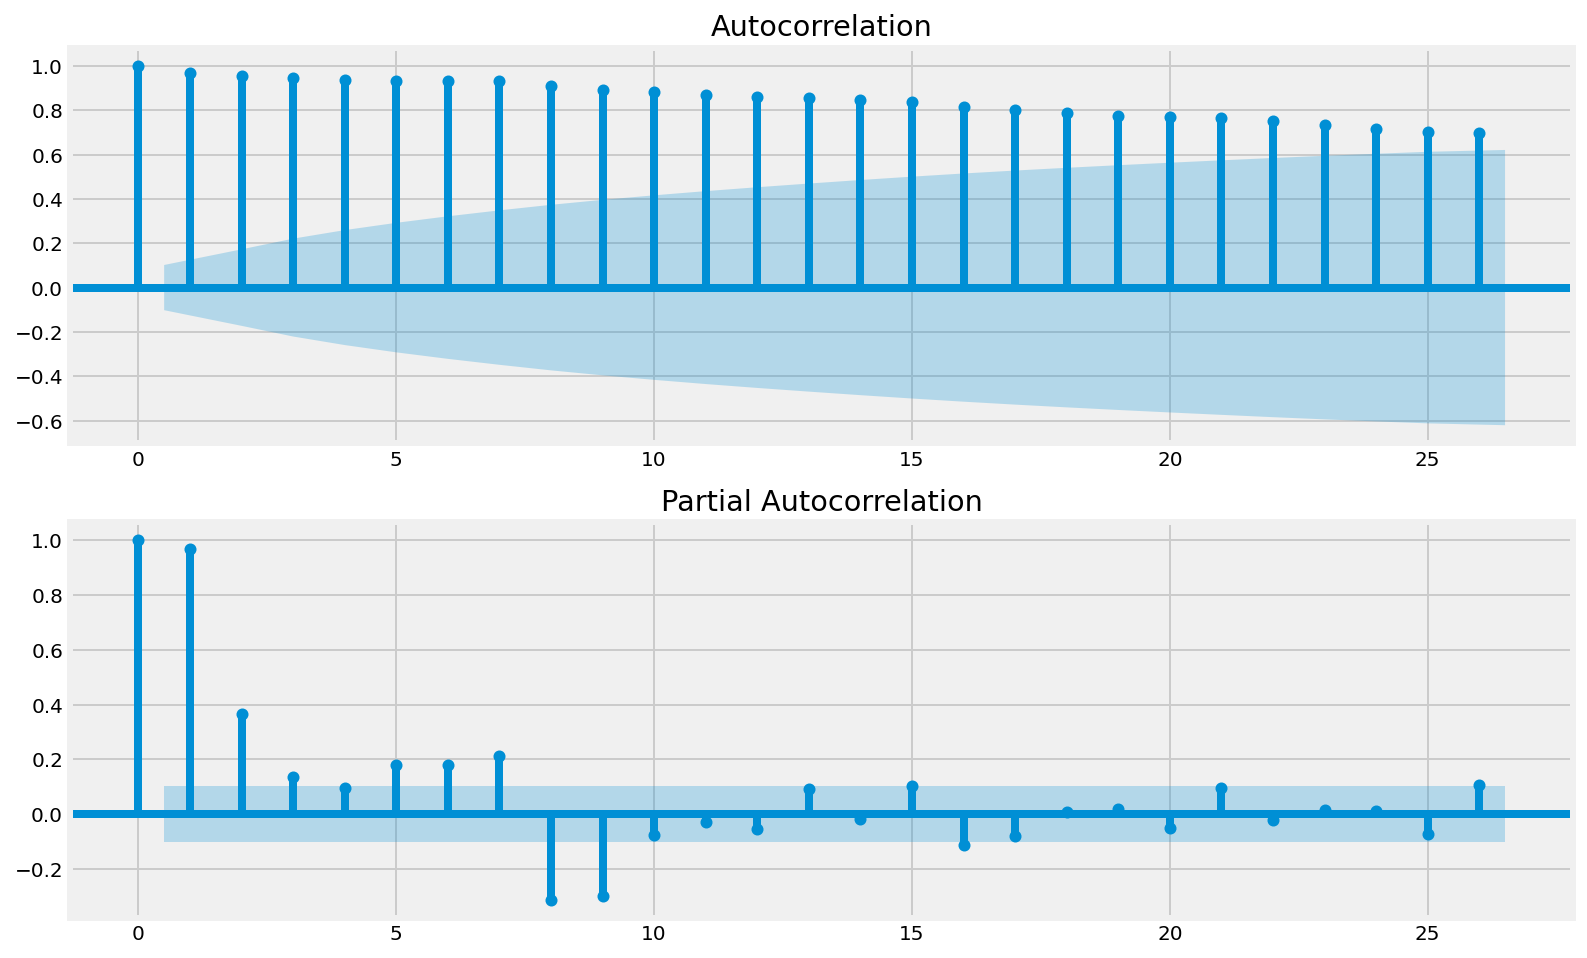

In [169]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_diff, ax=ax[0]); # 
plot_pacf(train_diff, ax=ax[1]);

# Evaluation of ARIMA Model

In [170]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Difference the Test Series

In [171]:
test_series = test_data['SUM']
test_diff = test_series.diff()
test_diff = test_diff.dropna(inplace = False)
test_diff

Date
2021-01-28    166576.0
2021-01-29    166764.0
2021-01-30    144715.0
2021-01-31    115156.0
2021-02-01    129608.0
                ...   
2021-09-27    185016.0
2021-09-28    109605.0
2021-09-29    123267.0
2021-09-30    110594.0
2021-10-01    158284.0
Name: SUM, Length: 247, dtype: float64

# Train and Forecast using ARIMA Model by filling in the necessary blocks

In [172]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [173]:
%%time 

history = [x for x in train_diff]

predictions = list()
for t in range(len(test_diff)):

    model = ARIMA(history, order=(5,1,0))  # initialize the model with history and right order of parameters
    model_fit = model.fit(disp=0)  # fit the model
   
    output = model_fit.forecast()  # use forecast on the fitted model
    yhat = output[0][0]
    predictions.append(yhat)

    obs = test_diff[t]
    history.append(obs)

    if t % 100 == 0:
      print('Test Series Point: {}\tPredicted={}, Expected={}'.format(t, yhat, obs))

Test Series Point: 0	Predicted=159336.95678458907, Expected=166576.0
Test Series Point: 100	Predicted=44315.647743155314, Expected=34242.0
Test Series Point: 200	Predicted=110140.34958161318, Expected=220065.0
CPU times: user 1min 5s, sys: 16.1 s, total: 1min 21s
Wall time: 53 s


# Reverse Transform the forecasted values

In [174]:
reverse_test_diff = np.r_[test_series.iloc[0], test_diff].cumsum()
reverse_predictions = np.r_[test_series.iloc[0], predictions].cumsum()
reverse_test_diff.shape, reverse_predictions.shape

((248,), (248,))

# Evaluate model performance

In [175]:
error = mean_squared_error(reverse_test_diff, reverse_predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(reverse_test_diff, reverse_predictions)
print('Symmetric Mean absolute percentage error: %.3f' % error2)

Testing Mean Squared Error: 88886483548.201
Symmetric Mean absolute percentage error: 0.825


In [176]:
reverse_test_diff_series = pd.Series(reverse_test_diff)
reverse_test_diff_series.index = test_series.index

reverse_predictions_series = pd.Series(reverse_predictions)
reverse_predictions_series.index = test_series.index

# Visualize the forecast results

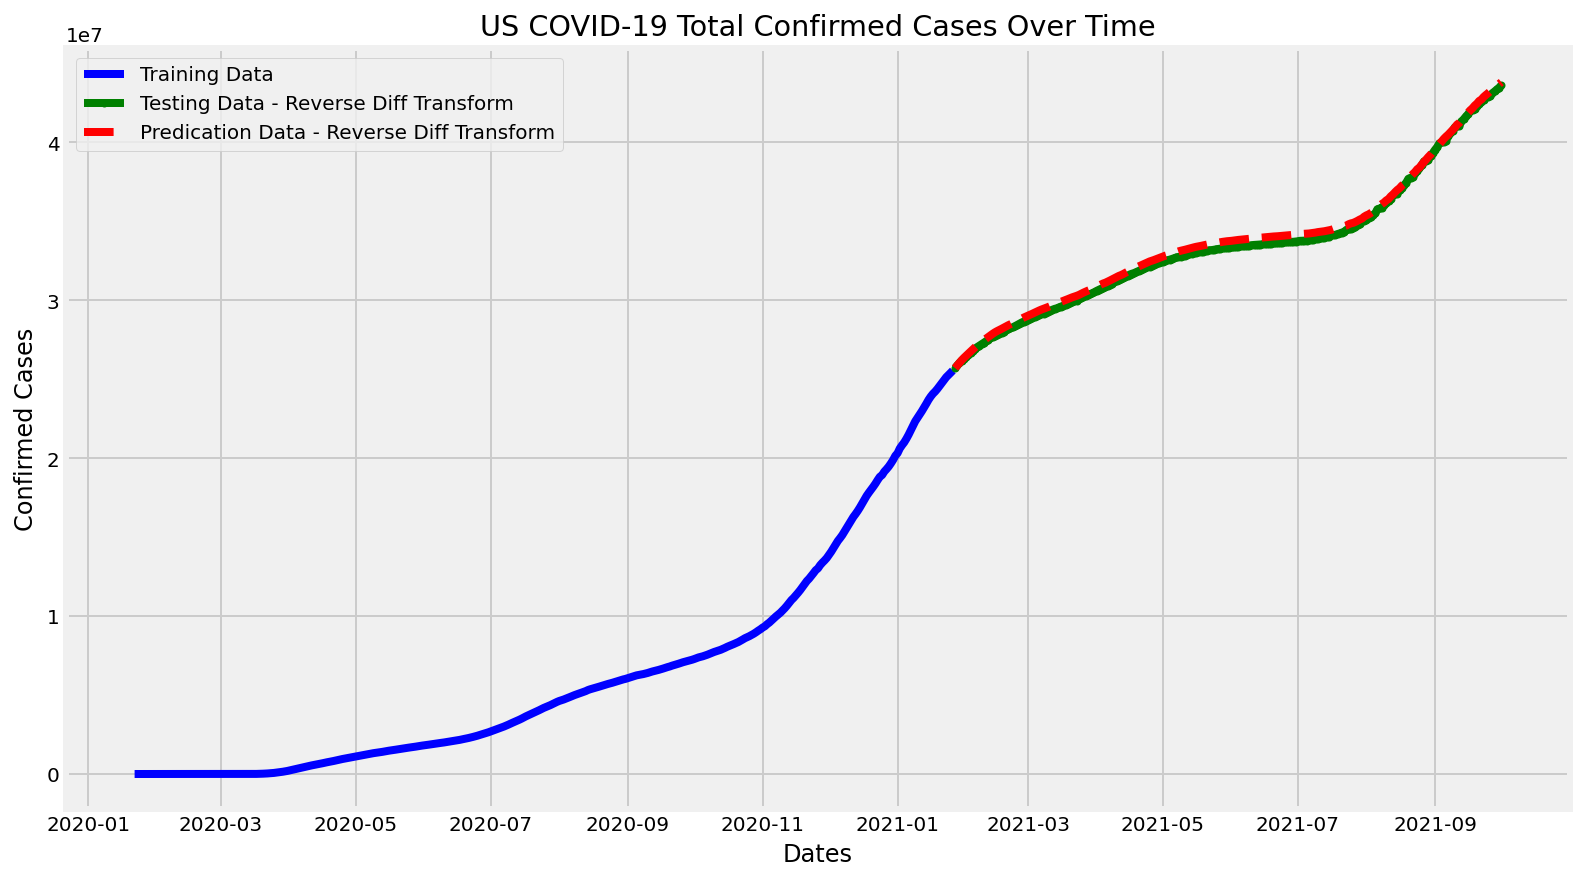

In [177]:
plt.figure(figsize=(12,7))
plt.title('US COVID-19 Total Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(train_series, color='blue', label='Training Data')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Data - Reverse Diff Transform')
plt.plot(reverse_predictions_series, color='red', linestyle='--', label='Predication Data - Reverse Diff Transform')
plt.legend();

# Visualize only test and forecast prices

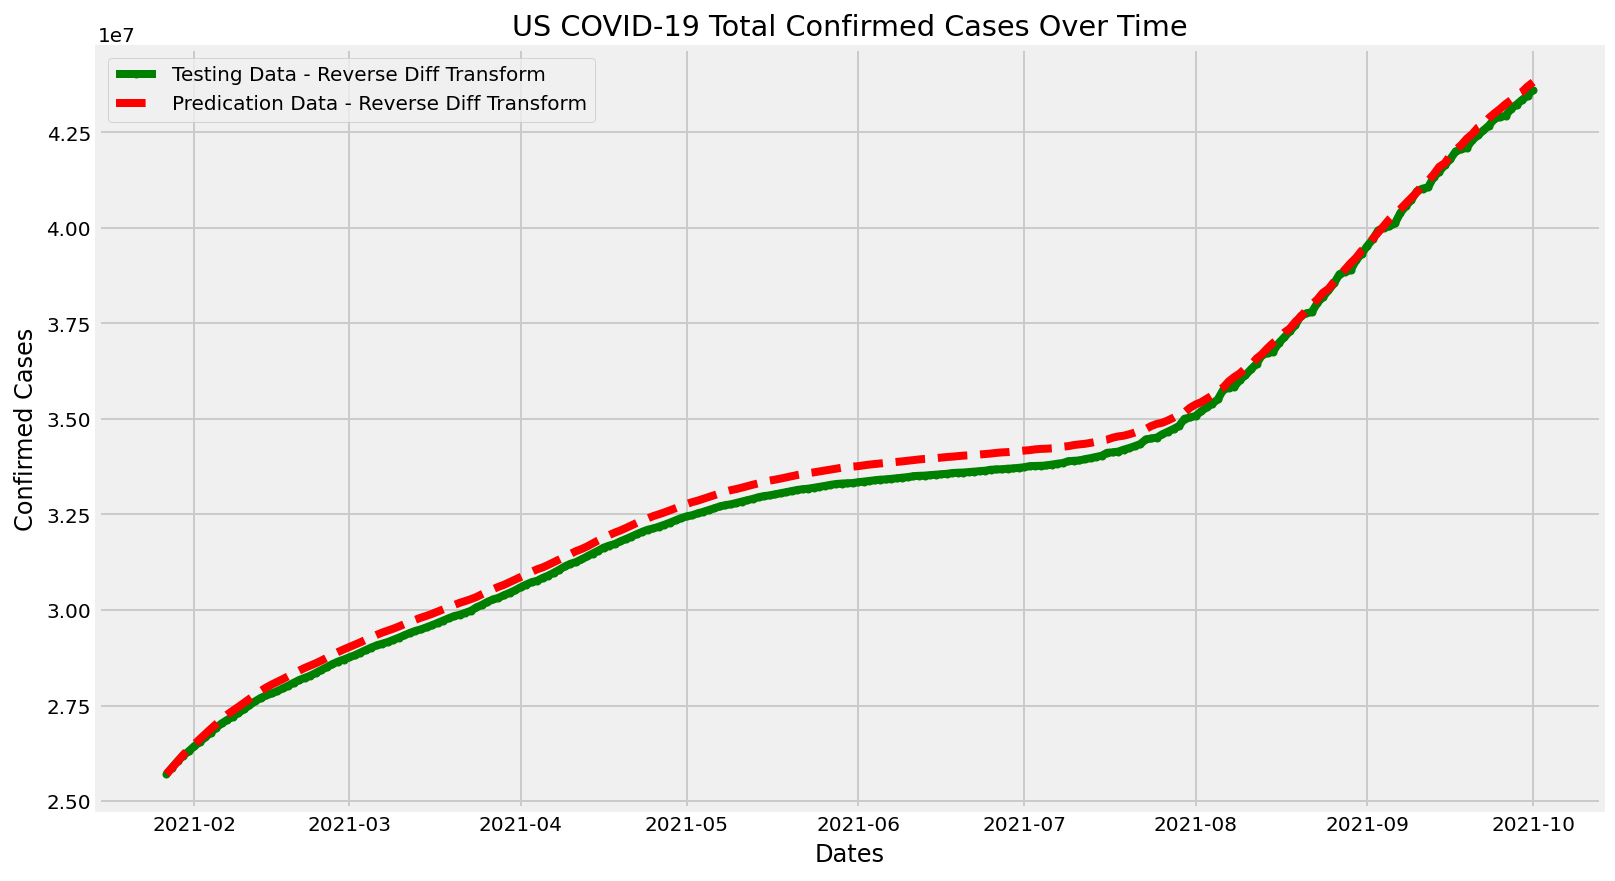

In [178]:
plt.figure(figsize=(12,7))
plt.title('US COVID-19 Total Confirmed Cases Over Time')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Data - Reverse Diff Transform')
plt.plot(reverse_predictions_series, color='red', linestyle='--', label='Predication Data - Reverse Diff Transform')
plt.legend();

# Generate forecasts

In [179]:
# Future predictions using ARIMA 
ARIMA_df = pd.DataFrame({'Future Date': future_forcast_dates[-10:], 'ARIMA Predicted # of US Total Confirmed Cases': np.round(reverse_predictions_series[-10:])})
ARIMA_df.style.background_gradient(cmap='Reds')

In [180]:
ARIMA_df.reset_index(drop=True)

Future Date  ARIMA Predicted # of US Total Confirmed Cases
0  10/01/2021                                     42712818.0
1  10/02/2021                                     42872489.0
2  10/03/2021                                     42996575.0
3  10/04/2021                                     43109946.0
4  10/05/2021                                     43236023.0
5  10/06/2021                                     43341971.0
6  10/07/2021                                     43482937.0
7  10/08/2021                                     43559134.0
8  10/09/2021                                     43700641.0
9  10/10/2021                                     43812487.0

# IV. Conclusion

Deep Learnig Time Series-ARIMA model produces most accurate predication results compared to traditional Machine Learning models in both Daily new confirmed cases and total accumulated cases.

Using 1st year data to train and 2nd year data to test generates best prediction results. Continously train LSTM model can reduce the gap between Forecast and Test curve. Training parameters are optimized to best performance. Same predication model and feature parameters could be scaled up to US data sets from CA.

Total 3 major peaks occurred in 2020-8, 2021-1,2021-9. Winter peak is higher than summer time. Similar pattern was shown in CA and US data sets. CA showed much lower 3rd peak than US which was probably due to Vaccination effect. Virus strain, lockdown, vaccination, season, Holiday gathering and regional corelation could be deeply investigated in the future. 